In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ2500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

418654
209226
426326


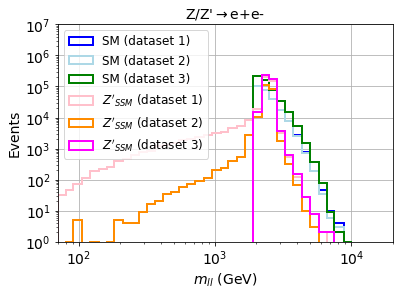

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ2500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ2500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-2500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-2500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-2500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-2500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-2500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-2500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3






# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.40439
0.852584
(1000426,)
(1000426,)
(1000426,)
(1000426,)
(1000426,)
(1000426,)
(1000426,)
(1000426,)
(1000426,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.469
2.469
-2.469
2.469


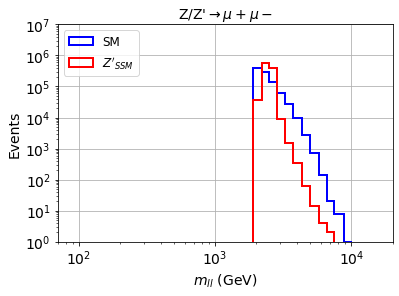

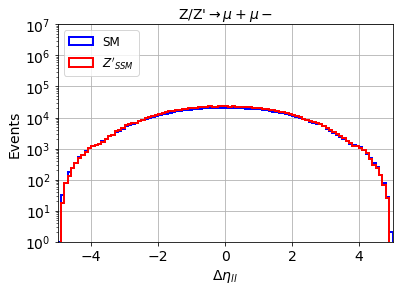

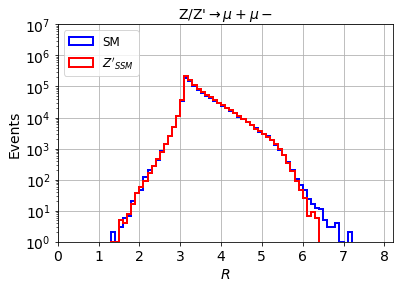

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.221286  0.458097  0.458625  0.243893  0.617409  0.964036  0.011698   
1        0.125807  0.242713  0.782623  0.153451  0.738462  0.299013  0.046466   
2        0.282472  0.516397  0.277371  0.307116  0.470648  0.789306  0.055798   
3        0.176605  0.424089  0.408498  0.202652  0.895951  0.924570  0.120553   
4        0.248743  0.415182  0.181254  0.265839  0.386235  0.636219  0.013300   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.295487  0.466194  0.045672  0.316688  0.408097  0.556015  0.068822   
1499996  0.285852  0.598178  0.319223  0.285744  0.596964  0.819383  0.044381   
1499997  0.278891  0.671255  0.209739  0.302056  0.550202  0.709580  0.064437   
1499998  0.257568  0.733198  0.435391  0.285353  0.536437  0.937938  0.067740   
1499999  0.300435  0.437449  0.903724  0.324798  0.441700  0.403405  0.072117   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68259	validation_1-logloss:0.68279
[1]	validation_0-logloss:0.67352	validation_1-logloss:0.67387
[2]	validation_0-logloss:0.66587	validation_1-logloss:0.66639
[3]	validation_0-logloss:0.65954	validation_1-logloss:0.66023
[4]	validation_0-logloss:0.65350	validation_1-logloss:0.65437
[5]	validation_0-logloss:0.64757	validation_1-logloss:0.64860
[6]	validation_0-logloss:0.64246	validation_1-logloss:0.64361
[7]	validation_0-logloss:0.63769	validation_1-logloss:0.63897
[8]	validation_0-logloss:0.63385	validation_1-logloss:0.63528
[9]	validation_0-logloss:0.63054	validation_1-logloss:0.63201
[10]	validation_0-logloss:0.62692	validation_1-logloss:0.62854
[11]	validation_0-logloss:0.62414	validation_1-logloss:0.62583
[12]	validation_0-logloss:0.62197	validation_1-logloss:0.62376
[13]	validation_0-logloss:0.61994	validation_1-logloss:0.62177
[14]	validation_0-logloss:0.61812	validation_1-logloss:0.62004
[15]	validation_0-logloss:0.61608	validation_1-logloss:0.61808
[1

[130]	validation_0-logloss:0.54465	validation_1-logloss:0.55017
[131]	validation_0-logloss:0.54438	validation_1-logloss:0.54990
[132]	validation_0-logloss:0.54423	validation_1-logloss:0.54977
[133]	validation_0-logloss:0.54344	validation_1-logloss:0.54899
[134]	validation_0-logloss:0.54290	validation_1-logloss:0.54848
[135]	validation_0-logloss:0.54252	validation_1-logloss:0.54811
[136]	validation_0-logloss:0.54165	validation_1-logloss:0.54725
[137]	validation_0-logloss:0.54151	validation_1-logloss:0.54712
[138]	validation_0-logloss:0.54138	validation_1-logloss:0.54702
[139]	validation_0-logloss:0.54107	validation_1-logloss:0.54672
[140]	validation_0-logloss:0.54059	validation_1-logloss:0.54625
[141]	validation_0-logloss:0.54038	validation_1-logloss:0.54606
[142]	validation_0-logloss:0.54020	validation_1-logloss:0.54591
[143]	validation_0-logloss:0.54002	validation_1-logloss:0.54574
[144]	validation_0-logloss:0.53979	validation_1-logloss:0.54554
[145]	validation_0-logloss:0.53893	valid

[259]	validation_0-logloss:0.51312	validation_1-logloss:0.52060
[260]	validation_0-logloss:0.51307	validation_1-logloss:0.52056
[261]	validation_0-logloss:0.51301	validation_1-logloss:0.52052
[262]	validation_0-logloss:0.51246	validation_1-logloss:0.52001
[263]	validation_0-logloss:0.51238	validation_1-logloss:0.51994
[264]	validation_0-logloss:0.51231	validation_1-logloss:0.51989
[265]	validation_0-logloss:0.51219	validation_1-logloss:0.51979
[266]	validation_0-logloss:0.51208	validation_1-logloss:0.51968
[267]	validation_0-logloss:0.51201	validation_1-logloss:0.51963
[268]	validation_0-logloss:0.51160	validation_1-logloss:0.51923
[269]	validation_0-logloss:0.51155	validation_1-logloss:0.51919
[270]	validation_0-logloss:0.51151	validation_1-logloss:0.51918
[271]	validation_0-logloss:0.51145	validation_1-logloss:0.51913
[272]	validation_0-logloss:0.51124	validation_1-logloss:0.51894
[273]	validation_0-logloss:0.51116	validation_1-logloss:0.51887
[274]	validation_0-logloss:0.51107	valid

[388]	validation_0-logloss:0.49946	validation_1-logloss:0.50868
[389]	validation_0-logloss:0.49939	validation_1-logloss:0.50864
[390]	validation_0-logloss:0.49933	validation_1-logloss:0.50860
[391]	validation_0-logloss:0.49930	validation_1-logloss:0.50858
[392]	validation_0-logloss:0.49925	validation_1-logloss:0.50855
[393]	validation_0-logloss:0.49921	validation_1-logloss:0.50852
[394]	validation_0-logloss:0.49919	validation_1-logloss:0.50851
[395]	validation_0-logloss:0.49918	validation_1-logloss:0.50850
[396]	validation_0-logloss:0.49884	validation_1-logloss:0.50821
[397]	validation_0-logloss:0.49878	validation_1-logloss:0.50815
[398]	validation_0-logloss:0.49871	validation_1-logloss:0.50809
[399]	validation_0-logloss:0.49865	validation_1-logloss:0.50804
[400]	validation_0-logloss:0.49862	validation_1-logloss:0.50802
[401]	validation_0-logloss:0.49860	validation_1-logloss:0.50802
[402]	validation_0-logloss:0.49857	validation_1-logloss:0.50800
[403]	validation_0-logloss:0.49853	valid

[517]	validation_0-logloss:0.49144	validation_1-logloss:0.50232
[518]	validation_0-logloss:0.49141	validation_1-logloss:0.50230
[519]	validation_0-logloss:0.49140	validation_1-logloss:0.50230
[520]	validation_0-logloss:0.49118	validation_1-logloss:0.50211
[521]	validation_0-logloss:0.49110	validation_1-logloss:0.50203
[522]	validation_0-logloss:0.49107	validation_1-logloss:0.50202
[523]	validation_0-logloss:0.49081	validation_1-logloss:0.50177
[524]	validation_0-logloss:0.49073	validation_1-logloss:0.50170
[525]	validation_0-logloss:0.49071	validation_1-logloss:0.50169
[526]	validation_0-logloss:0.49050	validation_1-logloss:0.50148
[527]	validation_0-logloss:0.49047	validation_1-logloss:0.50147
[528]	validation_0-logloss:0.49044	validation_1-logloss:0.50145
[529]	validation_0-logloss:0.49038	validation_1-logloss:0.50139
[530]	validation_0-logloss:0.49031	validation_1-logloss:0.50133
[531]	validation_0-logloss:0.49023	validation_1-logloss:0.50126
[532]	validation_0-logloss:0.49018	valid

[646]	validation_0-logloss:0.48360	validation_1-logloss:0.49612
[647]	validation_0-logloss:0.48359	validation_1-logloss:0.49612
[648]	validation_0-logloss:0.48351	validation_1-logloss:0.49606
[649]	validation_0-logloss:0.48349	validation_1-logloss:0.49605
[650]	validation_0-logloss:0.48338	validation_1-logloss:0.49595
[651]	validation_0-logloss:0.48333	validation_1-logloss:0.49592
[652]	validation_0-logloss:0.48327	validation_1-logloss:0.49588
[653]	validation_0-logloss:0.48324	validation_1-logloss:0.49586
[654]	validation_0-logloss:0.48323	validation_1-logloss:0.49585
[655]	validation_0-logloss:0.48322	validation_1-logloss:0.49585
[656]	validation_0-logloss:0.48321	validation_1-logloss:0.49585
[657]	validation_0-logloss:0.48319	validation_1-logloss:0.49584
[658]	validation_0-logloss:0.48317	validation_1-logloss:0.49583
[659]	validation_0-logloss:0.48315	validation_1-logloss:0.49582
[660]	validation_0-logloss:0.48315	validation_1-logloss:0.49583
[661]	validation_0-logloss:0.48314	valid

[775]	validation_0-logloss:0.47722	validation_1-logloss:0.49133
[776]	validation_0-logloss:0.47720	validation_1-logloss:0.49133
[777]	validation_0-logloss:0.47718	validation_1-logloss:0.49131
[778]	validation_0-logloss:0.47718	validation_1-logloss:0.49132
[779]	validation_0-logloss:0.47716	validation_1-logloss:0.49132
[780]	validation_0-logloss:0.47710	validation_1-logloss:0.49127
[781]	validation_0-logloss:0.47707	validation_1-logloss:0.49125
[782]	validation_0-logloss:0.47704	validation_1-logloss:0.49125
[783]	validation_0-logloss:0.47701	validation_1-logloss:0.49123
[784]	validation_0-logloss:0.47699	validation_1-logloss:0.49121
[785]	validation_0-logloss:0.47698	validation_1-logloss:0.49121
[786]	validation_0-logloss:0.47691	validation_1-logloss:0.49117
[787]	validation_0-logloss:0.47688	validation_1-logloss:0.49114
[788]	validation_0-logloss:0.47685	validation_1-logloss:0.49113
[789]	validation_0-logloss:0.47679	validation_1-logloss:0.49108
[790]	validation_0-logloss:0.47673	valid

[904]	validation_0-logloss:0.47045	validation_1-logloss:0.48631
[905]	validation_0-logloss:0.47042	validation_1-logloss:0.48629
[906]	validation_0-logloss:0.47040	validation_1-logloss:0.48628
[907]	validation_0-logloss:0.47039	validation_1-logloss:0.48628
[908]	validation_0-logloss:0.47039	validation_1-logloss:0.48629
[909]	validation_0-logloss:0.47038	validation_1-logloss:0.48628
[910]	validation_0-logloss:0.47034	validation_1-logloss:0.48626
[911]	validation_0-logloss:0.47033	validation_1-logloss:0.48626
[912]	validation_0-logloss:0.47032	validation_1-logloss:0.48626
[913]	validation_0-logloss:0.47032	validation_1-logloss:0.48626
[914]	validation_0-logloss:0.47030	validation_1-logloss:0.48626
[915]	validation_0-logloss:0.47028	validation_1-logloss:0.48626
[916]	validation_0-logloss:0.47026	validation_1-logloss:0.48627
[917]	validation_0-logloss:0.47026	validation_1-logloss:0.48627
[918]	validation_0-logloss:0.47023	validation_1-logloss:0.48624
[919]	validation_0-logloss:0.47021	valid

[1032]	validation_0-logloss:0.46693	validation_1-logloss:0.48442
[1033]	validation_0-logloss:0.46689	validation_1-logloss:0.48440
[1034]	validation_0-logloss:0.46688	validation_1-logloss:0.48440
[1035]	validation_0-logloss:0.46685	validation_1-logloss:0.48439
[1036]	validation_0-logloss:0.46684	validation_1-logloss:0.48439
[1037]	validation_0-logloss:0.46679	validation_1-logloss:0.48435
[1038]	validation_0-logloss:0.46676	validation_1-logloss:0.48434
[1039]	validation_0-logloss:0.46675	validation_1-logloss:0.48434
[1040]	validation_0-logloss:0.46673	validation_1-logloss:0.48434
[1041]	validation_0-logloss:0.46673	validation_1-logloss:0.48434
[1042]	validation_0-logloss:0.46672	validation_1-logloss:0.48434
[1043]	validation_0-logloss:0.46659	validation_1-logloss:0.48423
[1044]	validation_0-logloss:0.46658	validation_1-logloss:0.48423
[1045]	validation_0-logloss:0.46653	validation_1-logloss:0.48419
[1046]	validation_0-logloss:0.46652	validation_1-logloss:0.48419
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.46309	validation_1-logloss:0.48224
[1160]	validation_0-logloss:0.46301	validation_1-logloss:0.48217
[1161]	validation_0-logloss:0.46296	validation_1-logloss:0.48213
[1162]	validation_0-logloss:0.46293	validation_1-logloss:0.48211
[1163]	validation_0-logloss:0.46292	validation_1-logloss:0.48211
[1164]	validation_0-logloss:0.46291	validation_1-logloss:0.48211
[1165]	validation_0-logloss:0.46289	validation_1-logloss:0.48211
[1166]	validation_0-logloss:0.46284	validation_1-logloss:0.48208
[1167]	validation_0-logloss:0.46283	validation_1-logloss:0.48207
[1168]	validation_0-logloss:0.46281	validation_1-logloss:0.48207
[1169]	validation_0-logloss:0.46280	validation_1-logloss:0.48207
[1170]	validation_0-logloss:0.46277	validation_1-logloss:0.48205
[1171]	validation_0-logloss:0.46275	validation_1-logloss:0.48204
[1172]	validation_0-logloss:0.46271	validation_1-logloss:0.48201
[1173]	validation_0-logloss:0.46269	validation_1-logloss:0.48200
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.46011	validation_1-logloss:0.48090
[1287]	validation_0-logloss:0.46009	validation_1-logloss:0.48089
[1288]	validation_0-logloss:0.46008	validation_1-logloss:0.48089
[1289]	validation_0-logloss:0.46004	validation_1-logloss:0.48085
[1290]	validation_0-logloss:0.46002	validation_1-logloss:0.48085
[1291]	validation_0-logloss:0.46001	validation_1-logloss:0.48085
[1292]	validation_0-logloss:0.45998	validation_1-logloss:0.48083
[1293]	validation_0-logloss:0.45990	validation_1-logloss:0.48076
[1294]	validation_0-logloss:0.45989	validation_1-logloss:0.48076
[1295]	validation_0-logloss:0.45988	validation_1-logloss:0.48076
[1296]	validation_0-logloss:0.45987	validation_1-logloss:0.48077
[1297]	validation_0-logloss:0.45986	validation_1-logloss:0.48077
[1298]	validation_0-logloss:0.45981	validation_1-logloss:0.48073
[1299]	validation_0-logloss:0.45981	validation_1-logloss:0.48073
[1300]	validation_0-logloss:0.45977	validation_1-logloss:0.48072
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.45752	validation_1-logloss:0.47991
[1414]	validation_0-logloss:0.45749	validation_1-logloss:0.47990
[1415]	validation_0-logloss:0.45746	validation_1-logloss:0.47988
[1416]	validation_0-logloss:0.45743	validation_1-logloss:0.47986
[1417]	validation_0-logloss:0.45742	validation_1-logloss:0.47987
[1418]	validation_0-logloss:0.45741	validation_1-logloss:0.47987
[1419]	validation_0-logloss:0.45738	validation_1-logloss:0.47985
[1420]	validation_0-logloss:0.45737	validation_1-logloss:0.47985
[1421]	validation_0-logloss:0.45733	validation_1-logloss:0.47982
[1422]	validation_0-logloss:0.45732	validation_1-logloss:0.47982
[1423]	validation_0-logloss:0.45724	validation_1-logloss:0.47975
[1424]	validation_0-logloss:0.45723	validation_1-logloss:0.47975
[1425]	validation_0-logloss:0.45721	validation_1-logloss:0.47975
[1426]	validation_0-logloss:0.45720	validation_1-logloss:0.47975
[1427]	validation_0-logloss:0.45719	validation_1-logloss:0.47974
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.45526	validation_1-logloss:0.47910
[1541]	validation_0-logloss:0.45525	validation_1-logloss:0.47910
[1542]	validation_0-logloss:0.45523	validation_1-logloss:0.47910
[1543]	validation_0-logloss:0.45521	validation_1-logloss:0.47910
[1544]	validation_0-logloss:0.45520	validation_1-logloss:0.47910
[1545]	validation_0-logloss:0.45518	validation_1-logloss:0.47909
[1546]	validation_0-logloss:0.45517	validation_1-logloss:0.47909
[1547]	validation_0-logloss:0.45515	validation_1-logloss:0.47908
[1548]	validation_0-logloss:0.45513	validation_1-logloss:0.47908
[1549]	validation_0-logloss:0.45510	validation_1-logloss:0.47907
[1550]	validation_0-logloss:0.45509	validation_1-logloss:0.47907
[1551]	validation_0-logloss:0.45509	validation_1-logloss:0.47907
[1552]	validation_0-logloss:0.45508	validation_1-logloss:0.47907
[1553]	validation_0-logloss:0.45506	validation_1-logloss:0.47907
[1554]	validation_0-logloss:0.45505	validation_1-logloss:0.47908
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.45274	validation_1-logloss:0.47841
[1668]	validation_0-logloss:0.45273	validation_1-logloss:0.47841
[1669]	validation_0-logloss:0.45271	validation_1-logloss:0.47841
[1670]	validation_0-logloss:0.45269	validation_1-logloss:0.47841
[1671]	validation_0-logloss:0.45267	validation_1-logloss:0.47842
[1672]	validation_0-logloss:0.45266	validation_1-logloss:0.47842
[1673]	validation_0-logloss:0.45265	validation_1-logloss:0.47842
[1674]	validation_0-logloss:0.45260	validation_1-logloss:0.47840
[1675]	validation_0-logloss:0.45258	validation_1-logloss:0.47840
[1676]	validation_0-logloss:0.45257	validation_1-logloss:0.47840
[1677]	validation_0-logloss:0.45256	validation_1-logloss:0.47840
[1678]	validation_0-logloss:0.45252	validation_1-logloss:0.47837
[1679]	validation_0-logloss:0.45251	validation_1-logloss:0.47838
[1680]	validation_0-logloss:0.45249	validation_1-logloss:0.47838
[1681]	validation_0-logloss:0.45247	validation_1-logloss:0.47838
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45042	validation_1-logloss:0.47768
[1795]	validation_0-logloss:0.45041	validation_1-logloss:0.47769
[1796]	validation_0-logloss:0.45040	validation_1-logloss:0.47769
[1797]	validation_0-logloss:0.45038	validation_1-logloss:0.47769
[1798]	validation_0-logloss:0.45038	validation_1-logloss:0.47769
[1799]	validation_0-logloss:0.45036	validation_1-logloss:0.47770
[1800]	validation_0-logloss:0.45032	validation_1-logloss:0.47766
[1801]	validation_0-logloss:0.45030	validation_1-logloss:0.47765
[1802]	validation_0-logloss:0.45030	validation_1-logloss:0.47766
[1803]	validation_0-logloss:0.45029	validation_1-logloss:0.47766
[1804]	validation_0-logloss:0.45028	validation_1-logloss:0.47766
[1805]	validation_0-logloss:0.45026	validation_1-logloss:0.47765
[1806]	validation_0-logloss:0.45025	validation_1-logloss:0.47766
[1807]	validation_0-logloss:0.45025	validation_1-logloss:0.47766
[1808]	validation_0-logloss:0.45023	validation_1-logloss:0.47766
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.44820	validation_1-logloss:0.47710
[1922]	validation_0-logloss:0.44818	validation_1-logloss:0.47710
[1923]	validation_0-logloss:0.44817	validation_1-logloss:0.47710
[1924]	validation_0-logloss:0.44816	validation_1-logloss:0.47710
[1925]	validation_0-logloss:0.44816	validation_1-logloss:0.47710
[1926]	validation_0-logloss:0.44813	validation_1-logloss:0.47708
[1927]	validation_0-logloss:0.44812	validation_1-logloss:0.47708
[1928]	validation_0-logloss:0.44809	validation_1-logloss:0.47707
[1929]	validation_0-logloss:0.44808	validation_1-logloss:0.47708
[1930]	validation_0-logloss:0.44807	validation_1-logloss:0.47708
[1931]	validation_0-logloss:0.44805	validation_1-logloss:0.47707
[1932]	validation_0-logloss:0.44803	validation_1-logloss:0.47707
[1933]	validation_0-logloss:0.44801	validation_1-logloss:0.47707
[1934]	validation_0-logloss:0.44800	validation_1-logloss:0.47707
[1935]	validation_0-logloss:0.44798	validation_1-logloss:0.47708
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.44605	validation_1-logloss:0.47658
[2049]	validation_0-logloss:0.44603	validation_1-logloss:0.47658
[2050]	validation_0-logloss:0.44602	validation_1-logloss:0.47658
[2051]	validation_0-logloss:0.44601	validation_1-logloss:0.47658
[2052]	validation_0-logloss:0.44592	validation_1-logloss:0.47651
[2053]	validation_0-logloss:0.44590	validation_1-logloss:0.47651
[2054]	validation_0-logloss:0.44589	validation_1-logloss:0.47650
[2055]	validation_0-logloss:0.44587	validation_1-logloss:0.47651
[2056]	validation_0-logloss:0.44586	validation_1-logloss:0.47651
[2057]	validation_0-logloss:0.44582	validation_1-logloss:0.47649
[2058]	validation_0-logloss:0.44580	validation_1-logloss:0.47649
[2059]	validation_0-logloss:0.44579	validation_1-logloss:0.47649
[2060]	validation_0-logloss:0.44577	validation_1-logloss:0.47648
[2061]	validation_0-logloss:0.44577	validation_1-logloss:0.47648
[2062]	validation_0-logloss:0.44575	validation_1-logloss:0.47648
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.44390	validation_1-logloss:0.47600
[2176]	validation_0-logloss:0.44388	validation_1-logloss:0.47600
[2177]	validation_0-logloss:0.44387	validation_1-logloss:0.47600
[2178]	validation_0-logloss:0.44385	validation_1-logloss:0.47600
[2179]	validation_0-logloss:0.44383	validation_1-logloss:0.47600
[2180]	validation_0-logloss:0.44381	validation_1-logloss:0.47599
[2181]	validation_0-logloss:0.44380	validation_1-logloss:0.47599
[2182]	validation_0-logloss:0.44379	validation_1-logloss:0.47600
[2183]	validation_0-logloss:0.44378	validation_1-logloss:0.47599
[2184]	validation_0-logloss:0.44377	validation_1-logloss:0.47599
[2185]	validation_0-logloss:0.44376	validation_1-logloss:0.47599
[2186]	validation_0-logloss:0.44374	validation_1-logloss:0.47599
[2187]	validation_0-logloss:0.44372	validation_1-logloss:0.47598
[2188]	validation_0-logloss:0.44371	validation_1-logloss:0.47598
[2189]	validation_0-logloss:0.44368	validation_1-logloss:0.47596
[2190]	validation_0-loglo

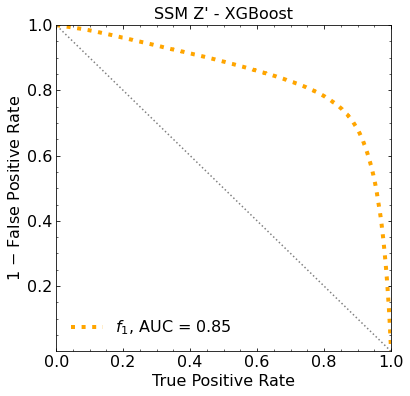

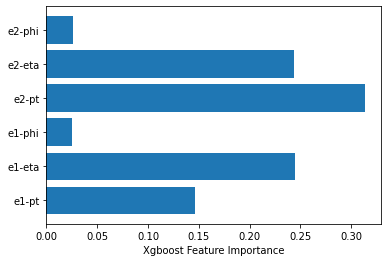

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68268	validation_1-logloss:0.68279
[1]	validation_0-logloss:0.67351	validation_1-logloss:0.67390
[2]	validation_0-logloss:0.66608	validation_1-logloss:0.66668
[3]	validation_0-logloss:0.65980	validation_1-logloss:0.66055
[4]	validation_0-logloss:0.65333	validation_1-logloss:0.65424
[5]	validation_0-logloss:0.64776	validation_1-logloss:0.64883
[6]	validation_0-logloss:0.64270	validation_1-logloss:0.64392
[7]	validation_0-logloss:0.63784	validation_1-logloss:0.63926
[8]	validation_0-logloss:0.63368	validation_1-logloss:0.63516
[9]	validation_0-logloss:0.63030	validation_1-logloss:0.63192
[10]	validation_0-logloss:0.62723	validation_1-logloss:0.62902
[11]	validation_0-logloss:0.62414	validation_1-logloss:0.62607
[12]	validation_0-logloss:0.62134	validation_1-logloss:0.62335
[13]	validation_0-logloss:0.61910	validation_1-logloss:0.62120
[14]	validation_0-logloss:0.61703	validation_1-logloss:0.61925
[15]	validation_0-logloss:0.61542	validation_1-logloss:0.61770
[1

[130]	validation_0-logloss:0.54178	validation_1-logloss:0.54917
[131]	validation_0-logloss:0.54141	validation_1-logloss:0.54882
[132]	validation_0-logloss:0.54115	validation_1-logloss:0.54860
[133]	validation_0-logloss:0.54103	validation_1-logloss:0.54850
[134]	validation_0-logloss:0.54080	validation_1-logloss:0.54833
[135]	validation_0-logloss:0.54053	validation_1-logloss:0.54810
[136]	validation_0-logloss:0.54023	validation_1-logloss:0.54784
[137]	validation_0-logloss:0.54010	validation_1-logloss:0.54774
[138]	validation_0-logloss:0.53959	validation_1-logloss:0.54727
[139]	validation_0-logloss:0.53910	validation_1-logloss:0.54682
[140]	validation_0-logloss:0.53870	validation_1-logloss:0.54645
[141]	validation_0-logloss:0.53813	validation_1-logloss:0.54592
[142]	validation_0-logloss:0.53790	validation_1-logloss:0.54571
[143]	validation_0-logloss:0.53767	validation_1-logloss:0.54552
[144]	validation_0-logloss:0.53752	validation_1-logloss:0.54540
[145]	validation_0-logloss:0.53734	valid

[259]	validation_0-logloss:0.51332	validation_1-logloss:0.52421
[260]	validation_0-logloss:0.51328	validation_1-logloss:0.52420
[261]	validation_0-logloss:0.51324	validation_1-logloss:0.52418
[262]	validation_0-logloss:0.51316	validation_1-logloss:0.52412
[263]	validation_0-logloss:0.51306	validation_1-logloss:0.52404
[264]	validation_0-logloss:0.51288	validation_1-logloss:0.52389
[265]	validation_0-logloss:0.51280	validation_1-logloss:0.52383
[266]	validation_0-logloss:0.51238	validation_1-logloss:0.52341
[267]	validation_0-logloss:0.51200	validation_1-logloss:0.52306
[268]	validation_0-logloss:0.51172	validation_1-logloss:0.52280
[269]	validation_0-logloss:0.51162	validation_1-logloss:0.52272
[270]	validation_0-logloss:0.51150	validation_1-logloss:0.52261
[271]	validation_0-logloss:0.51145	validation_1-logloss:0.52258
[272]	validation_0-logloss:0.51136	validation_1-logloss:0.52251
[273]	validation_0-logloss:0.51123	validation_1-logloss:0.52241
[274]	validation_0-logloss:0.51112	valid

[388]	validation_0-logloss:0.49938	validation_1-logloss:0.51319
[389]	validation_0-logloss:0.49934	validation_1-logloss:0.51319
[390]	validation_0-logloss:0.49907	validation_1-logloss:0.51293
[391]	validation_0-logloss:0.49902	validation_1-logloss:0.51291
[392]	validation_0-logloss:0.49882	validation_1-logloss:0.51272
[393]	validation_0-logloss:0.49876	validation_1-logloss:0.51267
[394]	validation_0-logloss:0.49874	validation_1-logloss:0.51267
[395]	validation_0-logloss:0.49860	validation_1-logloss:0.51256
[396]	validation_0-logloss:0.49857	validation_1-logloss:0.51254
[397]	validation_0-logloss:0.49853	validation_1-logloss:0.51253
[398]	validation_0-logloss:0.49833	validation_1-logloss:0.51234
[399]	validation_0-logloss:0.49829	validation_1-logloss:0.51233
[400]	validation_0-logloss:0.49823	validation_1-logloss:0.51229
[401]	validation_0-logloss:0.49821	validation_1-logloss:0.51228
[402]	validation_0-logloss:0.49811	validation_1-logloss:0.51221
[403]	validation_0-logloss:0.49803	valid

[517]	validation_0-logloss:0.48678	validation_1-logloss:0.50365
[518]	validation_0-logloss:0.48675	validation_1-logloss:0.50365
[519]	validation_0-logloss:0.48625	validation_1-logloss:0.50321
[520]	validation_0-logloss:0.48622	validation_1-logloss:0.50321
[521]	validation_0-logloss:0.48620	validation_1-logloss:0.50320
[522]	validation_0-logloss:0.48617	validation_1-logloss:0.50318
[523]	validation_0-logloss:0.48614	validation_1-logloss:0.50318
[524]	validation_0-logloss:0.48607	validation_1-logloss:0.50314
[525]	validation_0-logloss:0.48593	validation_1-logloss:0.50302
[526]	validation_0-logloss:0.48591	validation_1-logloss:0.50303
[527]	validation_0-logloss:0.48589	validation_1-logloss:0.50303
[528]	validation_0-logloss:0.48583	validation_1-logloss:0.50299
[529]	validation_0-logloss:0.48581	validation_1-logloss:0.50298
[530]	validation_0-logloss:0.48580	validation_1-logloss:0.50297
[531]	validation_0-logloss:0.48578	validation_1-logloss:0.50297
[532]	validation_0-logloss:0.48577	valid

[646]	validation_0-logloss:0.47959	validation_1-logloss:0.49946
[647]	validation_0-logloss:0.47958	validation_1-logloss:0.49946
[648]	validation_0-logloss:0.47955	validation_1-logloss:0.49946
[649]	validation_0-logloss:0.47951	validation_1-logloss:0.49943
[650]	validation_0-logloss:0.47950	validation_1-logloss:0.49943
[651]	validation_0-logloss:0.47943	validation_1-logloss:0.49939
[652]	validation_0-logloss:0.47941	validation_1-logloss:0.49939
[653]	validation_0-logloss:0.47939	validation_1-logloss:0.49939
[654]	validation_0-logloss:0.47934	validation_1-logloss:0.49939
[655]	validation_0-logloss:0.47932	validation_1-logloss:0.49938
[656]	validation_0-logloss:0.47928	validation_1-logloss:0.49936
[657]	validation_0-logloss:0.47918	validation_1-logloss:0.49927
[658]	validation_0-logloss:0.47911	validation_1-logloss:0.49923
[659]	validation_0-logloss:0.47909	validation_1-logloss:0.49923
[660]	validation_0-logloss:0.47904	validation_1-logloss:0.49921
[661]	validation_0-logloss:0.47901	valid

[775]	validation_0-logloss:0.47241	validation_1-logloss:0.49537
[776]	validation_0-logloss:0.47240	validation_1-logloss:0.49537
[777]	validation_0-logloss:0.47220	validation_1-logloss:0.49522
[778]	validation_0-logloss:0.47216	validation_1-logloss:0.49521
[779]	validation_0-logloss:0.47213	validation_1-logloss:0.49519
[780]	validation_0-logloss:0.47211	validation_1-logloss:0.49519
[781]	validation_0-logloss:0.47208	validation_1-logloss:0.49519
[782]	validation_0-logloss:0.47206	validation_1-logloss:0.49518
[783]	validation_0-logloss:0.47205	validation_1-logloss:0.49519
[784]	validation_0-logloss:0.47203	validation_1-logloss:0.49518
[785]	validation_0-logloss:0.47195	validation_1-logloss:0.49513
[786]	validation_0-logloss:0.47192	validation_1-logloss:0.49512
[787]	validation_0-logloss:0.47190	validation_1-logloss:0.49512
[788]	validation_0-logloss:0.47188	validation_1-logloss:0.49512
[789]	validation_0-logloss:0.47186	validation_1-logloss:0.49512
[790]	validation_0-logloss:0.47175	valid

[904]	validation_0-logloss:0.46698	validation_1-logloss:0.49268
[905]	validation_0-logloss:0.46688	validation_1-logloss:0.49260
[906]	validation_0-logloss:0.46687	validation_1-logloss:0.49261
[907]	validation_0-logloss:0.46684	validation_1-logloss:0.49261
[908]	validation_0-logloss:0.46682	validation_1-logloss:0.49260
[909]	validation_0-logloss:0.46674	validation_1-logloss:0.49253
[910]	validation_0-logloss:0.46673	validation_1-logloss:0.49253
[911]	validation_0-logloss:0.46670	validation_1-logloss:0.49254
[912]	validation_0-logloss:0.46669	validation_1-logloss:0.49254
[913]	validation_0-logloss:0.46661	validation_1-logloss:0.49246
[914]	validation_0-logloss:0.46653	validation_1-logloss:0.49240
[915]	validation_0-logloss:0.46646	validation_1-logloss:0.49238
[916]	validation_0-logloss:0.46644	validation_1-logloss:0.49238
[917]	validation_0-logloss:0.46643	validation_1-logloss:0.49238
[918]	validation_0-logloss:0.46641	validation_1-logloss:0.49239
[919]	validation_0-logloss:0.46635	valid

[1032]	validation_0-logloss:0.46157	validation_1-logloss:0.49008
[1033]	validation_0-logloss:0.46153	validation_1-logloss:0.49006
[1034]	validation_0-logloss:0.46151	validation_1-logloss:0.49005
[1035]	validation_0-logloss:0.46145	validation_1-logloss:0.49002
[1036]	validation_0-logloss:0.46145	validation_1-logloss:0.49003
[1037]	validation_0-logloss:0.46143	validation_1-logloss:0.49002
[1038]	validation_0-logloss:0.46137	validation_1-logloss:0.48999
[1039]	validation_0-logloss:0.46134	validation_1-logloss:0.48997
[1040]	validation_0-logloss:0.46132	validation_1-logloss:0.48997
[1041]	validation_0-logloss:0.46131	validation_1-logloss:0.48997
[1042]	validation_0-logloss:0.46129	validation_1-logloss:0.48996
[1043]	validation_0-logloss:0.46127	validation_1-logloss:0.48996
[1044]	validation_0-logloss:0.46125	validation_1-logloss:0.48997
[1045]	validation_0-logloss:0.46122	validation_1-logloss:0.48997
[1046]	validation_0-logloss:0.46119	validation_1-logloss:0.48997
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45732	validation_1-logloss:0.48867
[1160]	validation_0-logloss:0.45730	validation_1-logloss:0.48866
[1161]	validation_0-logloss:0.45727	validation_1-logloss:0.48867
[1162]	validation_0-logloss:0.45725	validation_1-logloss:0.48867
[1163]	validation_0-logloss:0.45719	validation_1-logloss:0.48864
[1164]	validation_0-logloss:0.45717	validation_1-logloss:0.48863
[1165]	validation_0-logloss:0.45715	validation_1-logloss:0.48863
[1166]	validation_0-logloss:0.45711	validation_1-logloss:0.48862
[1167]	validation_0-logloss:0.45708	validation_1-logloss:0.48861
[1168]	validation_0-logloss:0.45706	validation_1-logloss:0.48862
[1169]	validation_0-logloss:0.45703	validation_1-logloss:0.48862
[1170]	validation_0-logloss:0.45699	validation_1-logloss:0.48862
[1171]	validation_0-logloss:0.45694	validation_1-logloss:0.48860
[1172]	validation_0-logloss:0.45691	validation_1-logloss:0.48861
[1173]	validation_0-logloss:0.45688	validation_1-logloss:0.48859
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45325	validation_1-logloss:0.48759
[1287]	validation_0-logloss:0.45315	validation_1-logloss:0.48752
[1288]	validation_0-logloss:0.45311	validation_1-logloss:0.48752
[1289]	validation_0-logloss:0.45310	validation_1-logloss:0.48752
[1290]	validation_0-logloss:0.45303	validation_1-logloss:0.48750
[1291]	validation_0-logloss:0.45297	validation_1-logloss:0.48746
[1292]	validation_0-logloss:0.45296	validation_1-logloss:0.48746
[1293]	validation_0-logloss:0.45292	validation_1-logloss:0.48745
[1294]	validation_0-logloss:0.45287	validation_1-logloss:0.48741
[1295]	validation_0-logloss:0.45279	validation_1-logloss:0.48735
[1296]	validation_0-logloss:0.45270	validation_1-logloss:0.48729
[1297]	validation_0-logloss:0.45268	validation_1-logloss:0.48729
[1298]	validation_0-logloss:0.45266	validation_1-logloss:0.48729
[1299]	validation_0-logloss:0.45264	validation_1-logloss:0.48729
[1300]	validation_0-logloss:0.45259	validation_1-logloss:0.48727
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44937	validation_1-logloss:0.48657
[1414]	validation_0-logloss:0.44936	validation_1-logloss:0.48657
[1415]	validation_0-logloss:0.44928	validation_1-logloss:0.48652
[1416]	validation_0-logloss:0.44926	validation_1-logloss:0.48652
[1417]	validation_0-logloss:0.44923	validation_1-logloss:0.48652
[1418]	validation_0-logloss:0.44922	validation_1-logloss:0.48652
[1419]	validation_0-logloss:0.44921	validation_1-logloss:0.48652
[1420]	validation_0-logloss:0.44919	validation_1-logloss:0.48652
[1421]	validation_0-logloss:0.44917	validation_1-logloss:0.48652
[1422]	validation_0-logloss:0.44913	validation_1-logloss:0.48652
[1423]	validation_0-logloss:0.44910	validation_1-logloss:0.48652
[1424]	validation_0-logloss:0.44908	validation_1-logloss:0.48652
[1425]	validation_0-logloss:0.44905	validation_1-logloss:0.48653
[1426]	validation_0-logloss:0.44903	validation_1-logloss:0.48654
[1427]	validation_0-logloss:0.44902	validation_1-logloss:0.48654
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44594	validation_1-logloss:0.48590
[1541]	validation_0-logloss:0.44592	validation_1-logloss:0.48591
[1542]	validation_0-logloss:0.44591	validation_1-logloss:0.48591
[1543]	validation_0-logloss:0.44587	validation_1-logloss:0.48590
[1544]	validation_0-logloss:0.44585	validation_1-logloss:0.48591
[1545]	validation_0-logloss:0.44579	validation_1-logloss:0.48589
[1546]	validation_0-logloss:0.44577	validation_1-logloss:0.48589
[1547]	validation_0-logloss:0.44576	validation_1-logloss:0.48589
[1548]	validation_0-logloss:0.44574	validation_1-logloss:0.48588
[1549]	validation_0-logloss:0.44573	validation_1-logloss:0.48588
[1550]	validation_0-logloss:0.44570	validation_1-logloss:0.48588
[1551]	validation_0-logloss:0.44567	validation_1-logloss:0.48586
[1552]	validation_0-logloss:0.44564	validation_1-logloss:0.48586
[1553]	validation_0-logloss:0.44559	validation_1-logloss:0.48583
[1554]	validation_0-logloss:0.44557	validation_1-logloss:0.48583
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44264	validation_1-logloss:0.48536
[1668]	validation_0-logloss:0.44263	validation_1-logloss:0.48537
[1669]	validation_0-logloss:0.44260	validation_1-logloss:0.48537
[1670]	validation_0-logloss:0.44257	validation_1-logloss:0.48536
[1671]	validation_0-logloss:0.44255	validation_1-logloss:0.48536
[1672]	validation_0-logloss:0.44253	validation_1-logloss:0.48536
[1673]	validation_0-logloss:0.44249	validation_1-logloss:0.48536
[1674]	validation_0-logloss:0.44246	validation_1-logloss:0.48537
[1675]	validation_0-logloss:0.44243	validation_1-logloss:0.48536
[1676]	validation_0-logloss:0.44240	validation_1-logloss:0.48536
[1677]	validation_0-logloss:0.44237	validation_1-logloss:0.48536
[1678]	validation_0-logloss:0.44233	validation_1-logloss:0.48534
[1679]	validation_0-logloss:0.44230	validation_1-logloss:0.48534
[1680]	validation_0-logloss:0.44226	validation_1-logloss:0.48532
[1681]	validation_0-logloss:0.44222	validation_1-logloss:0.48532
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43878	validation_1-logloss:0.48470
[1795]	validation_0-logloss:0.43870	validation_1-logloss:0.48467
[1796]	validation_0-logloss:0.43868	validation_1-logloss:0.48467
[1797]	validation_0-logloss:0.43864	validation_1-logloss:0.48465
[1798]	validation_0-logloss:0.43861	validation_1-logloss:0.48465
[1799]	validation_0-logloss:0.43857	validation_1-logloss:0.48464
[1800]	validation_0-logloss:0.43854	validation_1-logloss:0.48463
[1801]	validation_0-logloss:0.43851	validation_1-logloss:0.48463
[1802]	validation_0-logloss:0.43849	validation_1-logloss:0.48462
[1803]	validation_0-logloss:0.43845	validation_1-logloss:0.48462
[1804]	validation_0-logloss:0.43842	validation_1-logloss:0.48462
[1805]	validation_0-logloss:0.43841	validation_1-logloss:0.48462
[1806]	validation_0-logloss:0.43839	validation_1-logloss:0.48462
[1807]	validation_0-logloss:0.43836	validation_1-logloss:0.48462
[1808]	validation_0-logloss:0.43833	validation_1-logloss:0.48462
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43531	validation_1-logloss:0.48404
[1922]	validation_0-logloss:0.43528	validation_1-logloss:0.48403
[1923]	validation_0-logloss:0.43524	validation_1-logloss:0.48402
[1924]	validation_0-logloss:0.43523	validation_1-logloss:0.48402
[1925]	validation_0-logloss:0.43522	validation_1-logloss:0.48402
[1926]	validation_0-logloss:0.43521	validation_1-logloss:0.48403
[1927]	validation_0-logloss:0.43519	validation_1-logloss:0.48403
[1928]	validation_0-logloss:0.43515	validation_1-logloss:0.48402
[1929]	validation_0-logloss:0.43512	validation_1-logloss:0.48402
[1930]	validation_0-logloss:0.43507	validation_1-logloss:0.48400
[1931]	validation_0-logloss:0.43505	validation_1-logloss:0.48401
[1932]	validation_0-logloss:0.43504	validation_1-logloss:0.48401
[1933]	validation_0-logloss:0.43501	validation_1-logloss:0.48401
[1934]	validation_0-logloss:0.43499	validation_1-logloss:0.48401
[1935]	validation_0-logloss:0.43494	validation_1-logloss:0.48399
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43209	validation_1-logloss:0.48346
[2049]	validation_0-logloss:0.43203	validation_1-logloss:0.48343
[2050]	validation_0-logloss:0.43201	validation_1-logloss:0.48343
[2051]	validation_0-logloss:0.43200	validation_1-logloss:0.48343
[2052]	validation_0-logloss:0.43196	validation_1-logloss:0.48342
[2053]	validation_0-logloss:0.43193	validation_1-logloss:0.48342
[2054]	validation_0-logloss:0.43187	validation_1-logloss:0.48338
[2055]	validation_0-logloss:0.43185	validation_1-logloss:0.48338
[2056]	validation_0-logloss:0.43183	validation_1-logloss:0.48338
[2057]	validation_0-logloss:0.43178	validation_1-logloss:0.48336
[2058]	validation_0-logloss:0.43174	validation_1-logloss:0.48335
[2059]	validation_0-logloss:0.43171	validation_1-logloss:0.48335
[2060]	validation_0-logloss:0.43165	validation_1-logloss:0.48331
[2061]	validation_0-logloss:0.43162	validation_1-logloss:0.48331
[2062]	validation_0-logloss:0.43160	validation_1-logloss:0.48331
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42892	validation_1-logloss:0.48300
[2176]	validation_0-logloss:0.42890	validation_1-logloss:0.48301
[2177]	validation_0-logloss:0.42886	validation_1-logloss:0.48301
[2178]	validation_0-logloss:0.42883	validation_1-logloss:0.48301
[2179]	validation_0-logloss:0.42879	validation_1-logloss:0.48297
[2180]	validation_0-logloss:0.42875	validation_1-logloss:0.48297
[2181]	validation_0-logloss:0.42872	validation_1-logloss:0.48298
[2182]	validation_0-logloss:0.42871	validation_1-logloss:0.48298
[2183]	validation_0-logloss:0.42870	validation_1-logloss:0.48298
[2184]	validation_0-logloss:0.42866	validation_1-logloss:0.48297
[2185]	validation_0-logloss:0.42864	validation_1-logloss:0.48297
[2186]	validation_0-logloss:0.42863	validation_1-logloss:0.48298
[2187]	validation_0-logloss:0.42861	validation_1-logloss:0.48298
[2188]	validation_0-logloss:0.42855	validation_1-logloss:0.48294
[2189]	validation_0-logloss:0.42853	validation_1-logloss:0.48294
[2190]	validation_0-loglo

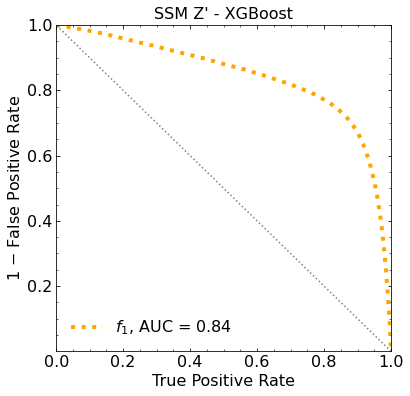


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68219	validation_1-logloss:0.68257
[1]	validation_0-logloss:0.67311	validation_1-logloss:0.67363
[2]	validation_0-logloss:0.66557	validation_1-logloss:0.66629
[3]	validation_0-logloss:0.65802	validation_1-logloss:0.65903
[4]	validation_0-logloss:0.65136	validation_1-logloss:0.65266
[5]	validation_0-logloss:0.64532	validation_1-logloss:0.64680
[6]	validation_0-logloss:0.63995	validation_1-logloss:0.64165
[7]	validation_0-logloss:0.63562	validation_1-logloss:0.63749
[8]	validation_0-logloss:0.63226	validation_1-logloss:0.63423
[9]	validation_0-logloss:0.62866	validation_1-logloss:0.63077
[10]	validation_0-logloss:0.62536	validation_1-logloss:0.62760
[11]	validation_0-logloss:0.62264	validation_1-logloss:0.62498
[12]	validation_0-logloss:0.62083	validation_1-logloss:0.62325
[13]	validation_0-logloss:0.61882	validation_1-logloss:0.62135
[14]	validation_0-logloss:0.61648	validation_1-logloss:0.61913
[15]	validation_0-logloss:0.61473	validation_1-logloss:0.61744
[1

[130]	validation_0-logloss:0.54216	validation_1-logloss:0.55046
[131]	validation_0-logloss:0.54182	validation_1-logloss:0.55014
[132]	validation_0-logloss:0.54151	validation_1-logloss:0.54985
[133]	validation_0-logloss:0.54085	validation_1-logloss:0.54923
[134]	validation_0-logloss:0.54049	validation_1-logloss:0.54890
[135]	validation_0-logloss:0.54008	validation_1-logloss:0.54851
[136]	validation_0-logloss:0.53992	validation_1-logloss:0.54837
[137]	validation_0-logloss:0.53980	validation_1-logloss:0.54829
[138]	validation_0-logloss:0.53904	validation_1-logloss:0.54754
[139]	validation_0-logloss:0.53875	validation_1-logloss:0.54726
[140]	validation_0-logloss:0.53841	validation_1-logloss:0.54697
[141]	validation_0-logloss:0.53793	validation_1-logloss:0.54650
[142]	validation_0-logloss:0.53692	validation_1-logloss:0.54553
[143]	validation_0-logloss:0.53662	validation_1-logloss:0.54526
[144]	validation_0-logloss:0.53651	validation_1-logloss:0.54519
[145]	validation_0-logloss:0.53585	valid

[259]	validation_0-logloss:0.51260	validation_1-logloss:0.52436
[260]	validation_0-logloss:0.51244	validation_1-logloss:0.52424
[261]	validation_0-logloss:0.51238	validation_1-logloss:0.52420
[262]	validation_0-logloss:0.51230	validation_1-logloss:0.52413
[263]	validation_0-logloss:0.51223	validation_1-logloss:0.52409
[264]	validation_0-logloss:0.51218	validation_1-logloss:0.52407
[265]	validation_0-logloss:0.51211	validation_1-logloss:0.52402
[266]	validation_0-logloss:0.51145	validation_1-logloss:0.52341
[267]	validation_0-logloss:0.51119	validation_1-logloss:0.52319
[268]	validation_0-logloss:0.51112	validation_1-logloss:0.52312
[269]	validation_0-logloss:0.51106	validation_1-logloss:0.52309
[270]	validation_0-logloss:0.51097	validation_1-logloss:0.52304
[271]	validation_0-logloss:0.51091	validation_1-logloss:0.52301
[272]	validation_0-logloss:0.51084	validation_1-logloss:0.52295
[273]	validation_0-logloss:0.51076	validation_1-logloss:0.52290
[274]	validation_0-logloss:0.51070	valid

[388]	validation_0-logloss:0.49758	validation_1-logloss:0.51263
[389]	validation_0-logloss:0.49730	validation_1-logloss:0.51240
[390]	validation_0-logloss:0.49721	validation_1-logloss:0.51235
[391]	validation_0-logloss:0.49713	validation_1-logloss:0.51229
[392]	validation_0-logloss:0.49710	validation_1-logloss:0.51228
[393]	validation_0-logloss:0.49707	validation_1-logloss:0.51227
[394]	validation_0-logloss:0.49704	validation_1-logloss:0.51226
[395]	validation_0-logloss:0.49698	validation_1-logloss:0.51223
[396]	validation_0-logloss:0.49641	validation_1-logloss:0.51170
[397]	validation_0-logloss:0.49635	validation_1-logloss:0.51168
[398]	validation_0-logloss:0.49631	validation_1-logloss:0.51165
[399]	validation_0-logloss:0.49626	validation_1-logloss:0.51163
[400]	validation_0-logloss:0.49623	validation_1-logloss:0.51161
[401]	validation_0-logloss:0.49587	validation_1-logloss:0.51130
[402]	validation_0-logloss:0.49584	validation_1-logloss:0.51129
[403]	validation_0-logloss:0.49579	valid

[517]	validation_0-logloss:0.48505	validation_1-logloss:0.50328
[518]	validation_0-logloss:0.48503	validation_1-logloss:0.50328
[519]	validation_0-logloss:0.48501	validation_1-logloss:0.50327
[520]	validation_0-logloss:0.48495	validation_1-logloss:0.50326
[521]	validation_0-logloss:0.48494	validation_1-logloss:0.50325
[522]	validation_0-logloss:0.48493	validation_1-logloss:0.50326
[523]	validation_0-logloss:0.48492	validation_1-logloss:0.50326
[524]	validation_0-logloss:0.48491	validation_1-logloss:0.50326
[525]	validation_0-logloss:0.48490	validation_1-logloss:0.50326
[526]	validation_0-logloss:0.48480	validation_1-logloss:0.50320
[527]	validation_0-logloss:0.48477	validation_1-logloss:0.50319
[528]	validation_0-logloss:0.48474	validation_1-logloss:0.50318
[529]	validation_0-logloss:0.48461	validation_1-logloss:0.50308
[530]	validation_0-logloss:0.48457	validation_1-logloss:0.50307
[531]	validation_0-logloss:0.48448	validation_1-logloss:0.50302
[532]	validation_0-logloss:0.48443	valid

[646]	validation_0-logloss:0.47911	validation_1-logloss:0.50028
[647]	validation_0-logloss:0.47908	validation_1-logloss:0.50028
[648]	validation_0-logloss:0.47906	validation_1-logloss:0.50027
[649]	validation_0-logloss:0.47905	validation_1-logloss:0.50027
[650]	validation_0-logloss:0.47903	validation_1-logloss:0.50027
[651]	validation_0-logloss:0.47895	validation_1-logloss:0.50023
[652]	validation_0-logloss:0.47849	validation_1-logloss:0.49982
[653]	validation_0-logloss:0.47809	validation_1-logloss:0.49947
[654]	validation_0-logloss:0.47800	validation_1-logloss:0.49941
[655]	validation_0-logloss:0.47763	validation_1-logloss:0.49909
[656]	validation_0-logloss:0.47756	validation_1-logloss:0.49905
[657]	validation_0-logloss:0.47754	validation_1-logloss:0.49905
[658]	validation_0-logloss:0.47750	validation_1-logloss:0.49903
[659]	validation_0-logloss:0.47748	validation_1-logloss:0.49903
[660]	validation_0-logloss:0.47746	validation_1-logloss:0.49902
[661]	validation_0-logloss:0.47742	valid

[775]	validation_0-logloss:0.47257	validation_1-logloss:0.49683
[776]	validation_0-logloss:0.47251	validation_1-logloss:0.49681
[777]	validation_0-logloss:0.47250	validation_1-logloss:0.49681
[778]	validation_0-logloss:0.47247	validation_1-logloss:0.49681
[779]	validation_0-logloss:0.47240	validation_1-logloss:0.49678
[780]	validation_0-logloss:0.47238	validation_1-logloss:0.49678
[781]	validation_0-logloss:0.47236	validation_1-logloss:0.49679
[782]	validation_0-logloss:0.47233	validation_1-logloss:0.49677
[783]	validation_0-logloss:0.47226	validation_1-logloss:0.49673
[784]	validation_0-logloss:0.47224	validation_1-logloss:0.49673
[785]	validation_0-logloss:0.47221	validation_1-logloss:0.49673
[786]	validation_0-logloss:0.47218	validation_1-logloss:0.49671
[787]	validation_0-logloss:0.47213	validation_1-logloss:0.49668
[788]	validation_0-logloss:0.47211	validation_1-logloss:0.49669
[789]	validation_0-logloss:0.47208	validation_1-logloss:0.49668
[790]	validation_0-logloss:0.47206	valid

[904]	validation_0-logloss:0.46594	validation_1-logloss:0.49316
[905]	validation_0-logloss:0.46587	validation_1-logloss:0.49311
[906]	validation_0-logloss:0.46584	validation_1-logloss:0.49311
[907]	validation_0-logloss:0.46582	validation_1-logloss:0.49311
[908]	validation_0-logloss:0.46578	validation_1-logloss:0.49312
[909]	validation_0-logloss:0.46575	validation_1-logloss:0.49312
[910]	validation_0-logloss:0.46568	validation_1-logloss:0.49307
[911]	validation_0-logloss:0.46565	validation_1-logloss:0.49305
[912]	validation_0-logloss:0.46559	validation_1-logloss:0.49301
[913]	validation_0-logloss:0.46557	validation_1-logloss:0.49301
[914]	validation_0-logloss:0.46555	validation_1-logloss:0.49301
[915]	validation_0-logloss:0.46534	validation_1-logloss:0.49283
[916]	validation_0-logloss:0.46527	validation_1-logloss:0.49281
[917]	validation_0-logloss:0.46522	validation_1-logloss:0.49278
[918]	validation_0-logloss:0.46503	validation_1-logloss:0.49263
[919]	validation_0-logloss:0.46498	valid

[1032]	validation_0-logloss:0.46037	validation_1-logloss:0.49077
[1033]	validation_0-logloss:0.46036	validation_1-logloss:0.49076
[1034]	validation_0-logloss:0.46032	validation_1-logloss:0.49076
[1035]	validation_0-logloss:0.46028	validation_1-logloss:0.49075
[1036]	validation_0-logloss:0.46027	validation_1-logloss:0.49075
[1037]	validation_0-logloss:0.46024	validation_1-logloss:0.49075
[1038]	validation_0-logloss:0.46016	validation_1-logloss:0.49069
[1039]	validation_0-logloss:0.46012	validation_1-logloss:0.49069
[1040]	validation_0-logloss:0.46012	validation_1-logloss:0.49069
[1041]	validation_0-logloss:0.46012	validation_1-logloss:0.49069
[1042]	validation_0-logloss:0.46009	validation_1-logloss:0.49068
[1043]	validation_0-logloss:0.46008	validation_1-logloss:0.49069
[1044]	validation_0-logloss:0.46005	validation_1-logloss:0.49069
[1045]	validation_0-logloss:0.46004	validation_1-logloss:0.49069
[1046]	validation_0-logloss:0.46003	validation_1-logloss:0.49069
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45530	validation_1-logloss:0.48859
[1160]	validation_0-logloss:0.45529	validation_1-logloss:0.48859
[1161]	validation_0-logloss:0.45526	validation_1-logloss:0.48858
[1162]	validation_0-logloss:0.45523	validation_1-logloss:0.48856
[1163]	validation_0-logloss:0.45522	validation_1-logloss:0.48856
[1164]	validation_0-logloss:0.45518	validation_1-logloss:0.48856
[1165]	validation_0-logloss:0.45515	validation_1-logloss:0.48855
[1166]	validation_0-logloss:0.45510	validation_1-logloss:0.48852
[1167]	validation_0-logloss:0.45507	validation_1-logloss:0.48853
[1168]	validation_0-logloss:0.45505	validation_1-logloss:0.48853
[1169]	validation_0-logloss:0.45496	validation_1-logloss:0.48847
[1170]	validation_0-logloss:0.45492	validation_1-logloss:0.48847
[1171]	validation_0-logloss:0.45488	validation_1-logloss:0.48846
[1172]	validation_0-logloss:0.45485	validation_1-logloss:0.48847
[1173]	validation_0-logloss:0.45468	validation_1-logloss:0.48833
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45105	validation_1-logloss:0.48711
[1287]	validation_0-logloss:0.45101	validation_1-logloss:0.48711
[1288]	validation_0-logloss:0.45100	validation_1-logloss:0.48711
[1289]	validation_0-logloss:0.45099	validation_1-logloss:0.48711
[1290]	validation_0-logloss:0.45096	validation_1-logloss:0.48710
[1291]	validation_0-logloss:0.45093	validation_1-logloss:0.48708
[1292]	validation_0-logloss:0.45091	validation_1-logloss:0.48707
[1293]	validation_0-logloss:0.45089	validation_1-logloss:0.48708
[1294]	validation_0-logloss:0.45083	validation_1-logloss:0.48705
[1295]	validation_0-logloss:0.45081	validation_1-logloss:0.48705
[1296]	validation_0-logloss:0.45075	validation_1-logloss:0.48701
[1297]	validation_0-logloss:0.45073	validation_1-logloss:0.48701
[1298]	validation_0-logloss:0.45068	validation_1-logloss:0.48700
[1299]	validation_0-logloss:0.45066	validation_1-logloss:0.48700
[1300]	validation_0-logloss:0.45065	validation_1-logloss:0.48700
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44738	validation_1-logloss:0.48623
[1414]	validation_0-logloss:0.44737	validation_1-logloss:0.48623
[1415]	validation_0-logloss:0.44733	validation_1-logloss:0.48621
[1416]	validation_0-logloss:0.44728	validation_1-logloss:0.48620
[1417]	validation_0-logloss:0.44719	validation_1-logloss:0.48613
[1418]	validation_0-logloss:0.44718	validation_1-logloss:0.48613
[1419]	validation_0-logloss:0.44715	validation_1-logloss:0.48613
[1420]	validation_0-logloss:0.44708	validation_1-logloss:0.48608
[1421]	validation_0-logloss:0.44705	validation_1-logloss:0.48609
[1422]	validation_0-logloss:0.44699	validation_1-logloss:0.48606
[1423]	validation_0-logloss:0.44697	validation_1-logloss:0.48606
[1424]	validation_0-logloss:0.44690	validation_1-logloss:0.48602
[1425]	validation_0-logloss:0.44688	validation_1-logloss:0.48602
[1426]	validation_0-logloss:0.44687	validation_1-logloss:0.48602
[1427]	validation_0-logloss:0.44686	validation_1-logloss:0.48602
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44346	validation_1-logloss:0.48523
[1541]	validation_0-logloss:0.44343	validation_1-logloss:0.48522
[1542]	validation_0-logloss:0.44340	validation_1-logloss:0.48522
[1543]	validation_0-logloss:0.44338	validation_1-logloss:0.48522
[1544]	validation_0-logloss:0.44335	validation_1-logloss:0.48522
[1545]	validation_0-logloss:0.44334	validation_1-logloss:0.48522
[1546]	validation_0-logloss:0.44331	validation_1-logloss:0.48522
[1547]	validation_0-logloss:0.44330	validation_1-logloss:0.48522
[1548]	validation_0-logloss:0.44328	validation_1-logloss:0.48522
[1549]	validation_0-logloss:0.44326	validation_1-logloss:0.48522
[1550]	validation_0-logloss:0.44325	validation_1-logloss:0.48522
[1551]	validation_0-logloss:0.44322	validation_1-logloss:0.48521
[1552]	validation_0-logloss:0.44321	validation_1-logloss:0.48522
[1553]	validation_0-logloss:0.44319	validation_1-logloss:0.48522
[1554]	validation_0-logloss:0.44315	validation_1-logloss:0.48522
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44021	validation_1-logloss:0.48468
[1668]	validation_0-logloss:0.44019	validation_1-logloss:0.48467
[1669]	validation_0-logloss:0.44017	validation_1-logloss:0.48468
[1670]	validation_0-logloss:0.44015	validation_1-logloss:0.48468
[1671]	validation_0-logloss:0.44011	validation_1-logloss:0.48466
[1672]	validation_0-logloss:0.44009	validation_1-logloss:0.48466
[1673]	validation_0-logloss:0.44008	validation_1-logloss:0.48466
[1674]	validation_0-logloss:0.44003	validation_1-logloss:0.48464
[1675]	validation_0-logloss:0.44001	validation_1-logloss:0.48463
[1676]	validation_0-logloss:0.44000	validation_1-logloss:0.48463
[1677]	validation_0-logloss:0.43997	validation_1-logloss:0.48463
[1678]	validation_0-logloss:0.43995	validation_1-logloss:0.48463
[1679]	validation_0-logloss:0.43986	validation_1-logloss:0.48456
[1680]	validation_0-logloss:0.43985	validation_1-logloss:0.48456
[1681]	validation_0-logloss:0.43984	validation_1-logloss:0.48457
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43683	validation_1-logloss:0.48401
[1795]	validation_0-logloss:0.43679	validation_1-logloss:0.48399
[1796]	validation_0-logloss:0.43676	validation_1-logloss:0.48400
[1797]	validation_0-logloss:0.43675	validation_1-logloss:0.48401
[1798]	validation_0-logloss:0.43672	validation_1-logloss:0.48401
[1799]	validation_0-logloss:0.43670	validation_1-logloss:0.48402
[1800]	validation_0-logloss:0.43668	validation_1-logloss:0.48402
[1801]	validation_0-logloss:0.43665	validation_1-logloss:0.48401
[1802]	validation_0-logloss:0.43662	validation_1-logloss:0.48400
[1803]	validation_0-logloss:0.43660	validation_1-logloss:0.48401
[1804]	validation_0-logloss:0.43659	validation_1-logloss:0.48400
[1805]	validation_0-logloss:0.43656	validation_1-logloss:0.48401
[1806]	validation_0-logloss:0.43654	validation_1-logloss:0.48401
[1807]	validation_0-logloss:0.43653	validation_1-logloss:0.48401
[1808]	validation_0-logloss:0.43651	validation_1-logloss:0.48401
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43362	validation_1-logloss:0.48368
[1922]	validation_0-logloss:0.43360	validation_1-logloss:0.48369
[1923]	validation_0-logloss:0.43357	validation_1-logloss:0.48369
[1924]	validation_0-logloss:0.43355	validation_1-logloss:0.48368
[1925]	validation_0-logloss:0.43353	validation_1-logloss:0.48368
[1926]	validation_0-logloss:0.43349	validation_1-logloss:0.48367
[1927]	validation_0-logloss:0.43347	validation_1-logloss:0.48368
[1928]	validation_0-logloss:0.43344	validation_1-logloss:0.48368
[1929]	validation_0-logloss:0.43343	validation_1-logloss:0.48368
[1930]	validation_0-logloss:0.43341	validation_1-logloss:0.48368
[1931]	validation_0-logloss:0.43339	validation_1-logloss:0.48369
[1932]	validation_0-logloss:0.43336	validation_1-logloss:0.48369
[1933]	validation_0-logloss:0.43334	validation_1-logloss:0.48369
[1934]	validation_0-logloss:0.43332	validation_1-logloss:0.48369
[1935]	validation_0-logloss:0.43330	validation_1-logloss:0.48369
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43021	validation_1-logloss:0.48309
[2049]	validation_0-logloss:0.43018	validation_1-logloss:0.48310
[2050]	validation_0-logloss:0.43014	validation_1-logloss:0.48309
[2051]	validation_0-logloss:0.43011	validation_1-logloss:0.48309
[2052]	validation_0-logloss:0.43008	validation_1-logloss:0.48309
[2053]	validation_0-logloss:0.43007	validation_1-logloss:0.48309
[2054]	validation_0-logloss:0.43006	validation_1-logloss:0.48309
[2055]	validation_0-logloss:0.43003	validation_1-logloss:0.48309
[2056]	validation_0-logloss:0.43001	validation_1-logloss:0.48309
[2057]	validation_0-logloss:0.43000	validation_1-logloss:0.48309
[2058]	validation_0-logloss:0.42995	validation_1-logloss:0.48309
[2059]	validation_0-logloss:0.42993	validation_1-logloss:0.48307
[2060]	validation_0-logloss:0.42989	validation_1-logloss:0.48306
[2061]	validation_0-logloss:0.42988	validation_1-logloss:0.48306
[2062]	validation_0-logloss:0.42986	validation_1-logloss:0.48306
[2063]	validation_0-loglo

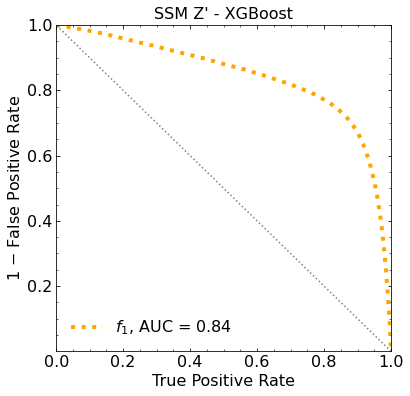


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68248	validation_1-logloss:0.68283
[1]	validation_0-logloss:0.67348	validation_1-logloss:0.67391
[2]	validation_0-logloss:0.66600	validation_1-logloss:0.66662
[3]	validation_0-logloss:0.65895	validation_1-logloss:0.65976
[4]	validation_0-logloss:0.65220	validation_1-logloss:0.65312
[5]	validation_0-logloss:0.64633	validation_1-logloss:0.64743
[6]	validation_0-logloss:0.64097	validation_1-logloss:0.64231
[7]	validation_0-logloss:0.63762	validation_1-logloss:0.63899
[8]	validation_0-logloss:0.63357	validation_1-logloss:0.63505
[9]	validation_0-logloss:0.62994	validation_1-logloss:0.63162
[10]	validation_0-logloss:0.62715	validation_1-logloss:0.62889
[11]	validation_0-logloss:0.62450	validation_1-logloss:0.62645
[12]	validation_0-logloss:0.62230	validation_1-logloss:0.62435
[13]	validation_0-logloss:0.62015	validation_1-logloss:0.62230
[14]	validation_0-logloss:0.61772	validation_1-logloss:0.61997
[15]	validation_0-logloss:0.61572	validation_1-logloss:0.61802
[1

[130]	validation_0-logloss:0.54275	validation_1-logloss:0.55037
[131]	validation_0-logloss:0.54241	validation_1-logloss:0.55008
[132]	validation_0-logloss:0.54193	validation_1-logloss:0.54961
[133]	validation_0-logloss:0.54167	validation_1-logloss:0.54938
[134]	validation_0-logloss:0.54135	validation_1-logloss:0.54907
[135]	validation_0-logloss:0.54101	validation_1-logloss:0.54876
[136]	validation_0-logloss:0.54047	validation_1-logloss:0.54824
[137]	validation_0-logloss:0.54030	validation_1-logloss:0.54811
[138]	validation_0-logloss:0.54002	validation_1-logloss:0.54786
[139]	validation_0-logloss:0.53989	validation_1-logloss:0.54777
[140]	validation_0-logloss:0.53948	validation_1-logloss:0.54739
[141]	validation_0-logloss:0.53911	validation_1-logloss:0.54704
[142]	validation_0-logloss:0.53893	validation_1-logloss:0.54688
[143]	validation_0-logloss:0.53873	validation_1-logloss:0.54670
[144]	validation_0-logloss:0.53829	validation_1-logloss:0.54627
[145]	validation_0-logloss:0.53795	valid

[259]	validation_0-logloss:0.51358	validation_1-logloss:0.52474
[260]	validation_0-logloss:0.51352	validation_1-logloss:0.52470
[261]	validation_0-logloss:0.51272	validation_1-logloss:0.52394
[262]	validation_0-logloss:0.51214	validation_1-logloss:0.52338
[263]	validation_0-logloss:0.51206	validation_1-logloss:0.52333
[264]	validation_0-logloss:0.51189	validation_1-logloss:0.52320
[265]	validation_0-logloss:0.51177	validation_1-logloss:0.52312
[266]	validation_0-logloss:0.51167	validation_1-logloss:0.52305
[267]	validation_0-logloss:0.51160	validation_1-logloss:0.52300
[268]	validation_0-logloss:0.51154	validation_1-logloss:0.52296
[269]	validation_0-logloss:0.51149	validation_1-logloss:0.52292
[270]	validation_0-logloss:0.51139	validation_1-logloss:0.52287
[271]	validation_0-logloss:0.51100	validation_1-logloss:0.52250
[272]	validation_0-logloss:0.51075	validation_1-logloss:0.52228
[273]	validation_0-logloss:0.51068	validation_1-logloss:0.52223
[274]	validation_0-logloss:0.51059	valid

[388]	validation_0-logloss:0.49650	validation_1-logloss:0.51075
[389]	validation_0-logloss:0.49614	validation_1-logloss:0.51044
[390]	validation_0-logloss:0.49606	validation_1-logloss:0.51039
[391]	validation_0-logloss:0.49604	validation_1-logloss:0.51038
[392]	validation_0-logloss:0.49574	validation_1-logloss:0.51012
[393]	validation_0-logloss:0.49562	validation_1-logloss:0.51003
[394]	validation_0-logloss:0.49544	validation_1-logloss:0.50989
[395]	validation_0-logloss:0.49542	validation_1-logloss:0.50988
[396]	validation_0-logloss:0.49539	validation_1-logloss:0.50986
[397]	validation_0-logloss:0.49535	validation_1-logloss:0.50984
[398]	validation_0-logloss:0.49531	validation_1-logloss:0.50981
[399]	validation_0-logloss:0.49528	validation_1-logloss:0.50981
[400]	validation_0-logloss:0.49526	validation_1-logloss:0.50980
[401]	validation_0-logloss:0.49516	validation_1-logloss:0.50972
[402]	validation_0-logloss:0.49510	validation_1-logloss:0.50969
[403]	validation_0-logloss:0.49508	valid

[517]	validation_0-logloss:0.48679	validation_1-logloss:0.50394
[518]	validation_0-logloss:0.48667	validation_1-logloss:0.50384
[519]	validation_0-logloss:0.48646	validation_1-logloss:0.50362
[520]	validation_0-logloss:0.48643	validation_1-logloss:0.50362
[521]	validation_0-logloss:0.48641	validation_1-logloss:0.50362
[522]	validation_0-logloss:0.48640	validation_1-logloss:0.50362
[523]	validation_0-logloss:0.48638	validation_1-logloss:0.50363
[524]	validation_0-logloss:0.48634	validation_1-logloss:0.50363
[525]	validation_0-logloss:0.48617	validation_1-logloss:0.50348
[526]	validation_0-logloss:0.48613	validation_1-logloss:0.50347
[527]	validation_0-logloss:0.48611	validation_1-logloss:0.50348
[528]	validation_0-logloss:0.48608	validation_1-logloss:0.50346
[529]	validation_0-logloss:0.48595	validation_1-logloss:0.50334
[530]	validation_0-logloss:0.48590	validation_1-logloss:0.50331
[531]	validation_0-logloss:0.48589	validation_1-logloss:0.50331
[532]	validation_0-logloss:0.48586	valid

[646]	validation_0-logloss:0.47691	validation_1-logloss:0.49706
[647]	validation_0-logloss:0.47689	validation_1-logloss:0.49705
[648]	validation_0-logloss:0.47686	validation_1-logloss:0.49704
[649]	validation_0-logloss:0.47684	validation_1-logloss:0.49704
[650]	validation_0-logloss:0.47678	validation_1-logloss:0.49701
[651]	validation_0-logloss:0.47649	validation_1-logloss:0.49678
[652]	validation_0-logloss:0.47641	validation_1-logloss:0.49673
[653]	validation_0-logloss:0.47638	validation_1-logloss:0.49673
[654]	validation_0-logloss:0.47632	validation_1-logloss:0.49669
[655]	validation_0-logloss:0.47624	validation_1-logloss:0.49665
[656]	validation_0-logloss:0.47622	validation_1-logloss:0.49663
[657]	validation_0-logloss:0.47620	validation_1-logloss:0.49663
[658]	validation_0-logloss:0.47619	validation_1-logloss:0.49663
[659]	validation_0-logloss:0.47616	validation_1-logloss:0.49663
[660]	validation_0-logloss:0.47615	validation_1-logloss:0.49663
[661]	validation_0-logloss:0.47612	valid

[775]	validation_0-logloss:0.47100	validation_1-logloss:0.49403
[776]	validation_0-logloss:0.47097	validation_1-logloss:0.49404
[777]	validation_0-logloss:0.47095	validation_1-logloss:0.49404
[778]	validation_0-logloss:0.47090	validation_1-logloss:0.49402
[779]	validation_0-logloss:0.47087	validation_1-logloss:0.49402
[780]	validation_0-logloss:0.47084	validation_1-logloss:0.49402
[781]	validation_0-logloss:0.47083	validation_1-logloss:0.49402
[782]	validation_0-logloss:0.47080	validation_1-logloss:0.49400
[783]	validation_0-logloss:0.47075	validation_1-logloss:0.49402
[784]	validation_0-logloss:0.47071	validation_1-logloss:0.49402
[785]	validation_0-logloss:0.47068	validation_1-logloss:0.49402
[786]	validation_0-logloss:0.47066	validation_1-logloss:0.49402
[787]	validation_0-logloss:0.47061	validation_1-logloss:0.49399
[788]	validation_0-logloss:0.47058	validation_1-logloss:0.49400
[789]	validation_0-logloss:0.47030	validation_1-logloss:0.49373
[790]	validation_0-logloss:0.47022	valid

[904]	validation_0-logloss:0.46498	validation_1-logloss:0.49112
[905]	validation_0-logloss:0.46497	validation_1-logloss:0.49112
[906]	validation_0-logloss:0.46492	validation_1-logloss:0.49112
[907]	validation_0-logloss:0.46488	validation_1-logloss:0.49111
[908]	validation_0-logloss:0.46480	validation_1-logloss:0.49106
[909]	validation_0-logloss:0.46476	validation_1-logloss:0.49104
[910]	validation_0-logloss:0.46475	validation_1-logloss:0.49104
[911]	validation_0-logloss:0.46472	validation_1-logloss:0.49103
[912]	validation_0-logloss:0.46469	validation_1-logloss:0.49103
[913]	validation_0-logloss:0.46463	validation_1-logloss:0.49099
[914]	validation_0-logloss:0.46461	validation_1-logloss:0.49099
[915]	validation_0-logloss:0.46459	validation_1-logloss:0.49099
[916]	validation_0-logloss:0.46444	validation_1-logloss:0.49089
[917]	validation_0-logloss:0.46443	validation_1-logloss:0.49089
[918]	validation_0-logloss:0.46440	validation_1-logloss:0.49088
[919]	validation_0-logloss:0.46436	valid

[1032]	validation_0-logloss:0.46088	validation_1-logloss:0.49008
[1033]	validation_0-logloss:0.46084	validation_1-logloss:0.49008
[1034]	validation_0-logloss:0.46081	validation_1-logloss:0.49008
[1035]	validation_0-logloss:0.46074	validation_1-logloss:0.49004
[1036]	validation_0-logloss:0.46064	validation_1-logloss:0.48997
[1037]	validation_0-logloss:0.46062	validation_1-logloss:0.48998
[1038]	validation_0-logloss:0.46059	validation_1-logloss:0.48997
[1039]	validation_0-logloss:0.46055	validation_1-logloss:0.48995
[1040]	validation_0-logloss:0.46052	validation_1-logloss:0.48995
[1041]	validation_0-logloss:0.46051	validation_1-logloss:0.48994
[1042]	validation_0-logloss:0.46039	validation_1-logloss:0.48983
[1043]	validation_0-logloss:0.46033	validation_1-logloss:0.48983
[1044]	validation_0-logloss:0.46025	validation_1-logloss:0.48978
[1045]	validation_0-logloss:0.46022	validation_1-logloss:0.48978
[1046]	validation_0-logloss:0.46011	validation_1-logloss:0.48970
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45621	validation_1-logloss:0.48828
[1160]	validation_0-logloss:0.45620	validation_1-logloss:0.48828
[1161]	validation_0-logloss:0.45616	validation_1-logloss:0.48827
[1162]	validation_0-logloss:0.45613	validation_1-logloss:0.48828
[1163]	validation_0-logloss:0.45610	validation_1-logloss:0.48827
[1164]	validation_0-logloss:0.45609	validation_1-logloss:0.48827
[1165]	validation_0-logloss:0.45606	validation_1-logloss:0.48827
[1166]	validation_0-logloss:0.45602	validation_1-logloss:0.48826
[1167]	validation_0-logloss:0.45598	validation_1-logloss:0.48826
[1168]	validation_0-logloss:0.45590	validation_1-logloss:0.48821
[1169]	validation_0-logloss:0.45587	validation_1-logloss:0.48821
[1170]	validation_0-logloss:0.45577	validation_1-logloss:0.48813
[1171]	validation_0-logloss:0.45573	validation_1-logloss:0.48812
[1172]	validation_0-logloss:0.45572	validation_1-logloss:0.48812
[1173]	validation_0-logloss:0.45569	validation_1-logloss:0.48811
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45185	validation_1-logloss:0.48702
[1287]	validation_0-logloss:0.45183	validation_1-logloss:0.48702
[1288]	validation_0-logloss:0.45180	validation_1-logloss:0.48702
[1289]	validation_0-logloss:0.45176	validation_1-logloss:0.48702
[1290]	validation_0-logloss:0.45170	validation_1-logloss:0.48700
[1291]	validation_0-logloss:0.45166	validation_1-logloss:0.48700
[1292]	validation_0-logloss:0.45163	validation_1-logloss:0.48699
[1293]	validation_0-logloss:0.45160	validation_1-logloss:0.48698
[1294]	validation_0-logloss:0.45159	validation_1-logloss:0.48698
[1295]	validation_0-logloss:0.45158	validation_1-logloss:0.48698
[1296]	validation_0-logloss:0.45150	validation_1-logloss:0.48693
[1297]	validation_0-logloss:0.45147	validation_1-logloss:0.48693
[1298]	validation_0-logloss:0.45146	validation_1-logloss:0.48693
[1299]	validation_0-logloss:0.45142	validation_1-logloss:0.48693
[1300]	validation_0-logloss:0.45139	validation_1-logloss:0.48693
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44797	validation_1-logloss:0.48608
[1414]	validation_0-logloss:0.44792	validation_1-logloss:0.48606
[1415]	validation_0-logloss:0.44791	validation_1-logloss:0.48606
[1416]	validation_0-logloss:0.44788	validation_1-logloss:0.48606
[1417]	validation_0-logloss:0.44787	validation_1-logloss:0.48606
[1418]	validation_0-logloss:0.44780	validation_1-logloss:0.48601
[1419]	validation_0-logloss:0.44776	validation_1-logloss:0.48600
[1420]	validation_0-logloss:0.44773	validation_1-logloss:0.48599
[1421]	validation_0-logloss:0.44769	validation_1-logloss:0.48600
[1422]	validation_0-logloss:0.44762	validation_1-logloss:0.48595
[1423]	validation_0-logloss:0.44759	validation_1-logloss:0.48595
[1424]	validation_0-logloss:0.44758	validation_1-logloss:0.48595
[1425]	validation_0-logloss:0.44757	validation_1-logloss:0.48595
[1426]	validation_0-logloss:0.44753	validation_1-logloss:0.48593
[1427]	validation_0-logloss:0.44750	validation_1-logloss:0.48594
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44428	validation_1-logloss:0.48523
[1541]	validation_0-logloss:0.44421	validation_1-logloss:0.48518
[1542]	validation_0-logloss:0.44420	validation_1-logloss:0.48519
[1543]	validation_0-logloss:0.44419	validation_1-logloss:0.48519
[1544]	validation_0-logloss:0.44413	validation_1-logloss:0.48516
[1545]	validation_0-logloss:0.44410	validation_1-logloss:0.48515
[1546]	validation_0-logloss:0.44409	validation_1-logloss:0.48515
[1547]	validation_0-logloss:0.44408	validation_1-logloss:0.48515
[1548]	validation_0-logloss:0.44405	validation_1-logloss:0.48513
[1549]	validation_0-logloss:0.44402	validation_1-logloss:0.48513
[1550]	validation_0-logloss:0.44399	validation_1-logloss:0.48512
[1551]	validation_0-logloss:0.44395	validation_1-logloss:0.48512
[1552]	validation_0-logloss:0.44393	validation_1-logloss:0.48512
[1553]	validation_0-logloss:0.44392	validation_1-logloss:0.48511
[1554]	validation_0-logloss:0.44388	validation_1-logloss:0.48512
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44097	validation_1-logloss:0.48466
[1668]	validation_0-logloss:0.44096	validation_1-logloss:0.48465
[1669]	validation_0-logloss:0.44094	validation_1-logloss:0.48465
[1670]	validation_0-logloss:0.44091	validation_1-logloss:0.48465
[1671]	validation_0-logloss:0.44091	validation_1-logloss:0.48465
[1672]	validation_0-logloss:0.44090	validation_1-logloss:0.48465
[1673]	validation_0-logloss:0.44087	validation_1-logloss:0.48465
[1674]	validation_0-logloss:0.44085	validation_1-logloss:0.48466
[1675]	validation_0-logloss:0.44083	validation_1-logloss:0.48465
[1676]	validation_0-logloss:0.44080	validation_1-logloss:0.48466
[1677]	validation_0-logloss:0.44073	validation_1-logloss:0.48463
[1678]	validation_0-logloss:0.44071	validation_1-logloss:0.48462
[1679]	validation_0-logloss:0.44070	validation_1-logloss:0.48462
[1680]	validation_0-logloss:0.44069	validation_1-logloss:0.48463
[1681]	validation_0-logloss:0.44068	validation_1-logloss:0.48463
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43726	validation_1-logloss:0.48414
[1795]	validation_0-logloss:0.43723	validation_1-logloss:0.48414
[1796]	validation_0-logloss:0.43721	validation_1-logloss:0.48414
[1797]	validation_0-logloss:0.43718	validation_1-logloss:0.48414
[1798]	validation_0-logloss:0.43717	validation_1-logloss:0.48415
[1799]	validation_0-logloss:0.43715	validation_1-logloss:0.48415
[1800]	validation_0-logloss:0.43713	validation_1-logloss:0.48415
[1801]	validation_0-logloss:0.43710	validation_1-logloss:0.48415
[1802]	validation_0-logloss:0.43708	validation_1-logloss:0.48415
[1803]	validation_0-logloss:0.43707	validation_1-logloss:0.48415
[1804]	validation_0-logloss:0.43703	validation_1-logloss:0.48414
[1805]	validation_0-logloss:0.43699	validation_1-logloss:0.48412
[1806]	validation_0-logloss:0.43698	validation_1-logloss:0.48412
[1807]	validation_0-logloss:0.43694	validation_1-logloss:0.48410
[1808]	validation_0-logloss:0.43691	validation_1-logloss:0.48409
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43376	validation_1-logloss:0.48358
[1922]	validation_0-logloss:0.43372	validation_1-logloss:0.48358
[1923]	validation_0-logloss:0.43370	validation_1-logloss:0.48359
[1924]	validation_0-logloss:0.43367	validation_1-logloss:0.48358
[1925]	validation_0-logloss:0.43365	validation_1-logloss:0.48358
[1926]	validation_0-logloss:0.43362	validation_1-logloss:0.48359
[1927]	validation_0-logloss:0.43359	validation_1-logloss:0.48359
[1928]	validation_0-logloss:0.43356	validation_1-logloss:0.48359
[1929]	validation_0-logloss:0.43352	validation_1-logloss:0.48357
[1930]	validation_0-logloss:0.43350	validation_1-logloss:0.48356
[1931]	validation_0-logloss:0.43347	validation_1-logloss:0.48357
[1932]	validation_0-logloss:0.43342	validation_1-logloss:0.48356
[1933]	validation_0-logloss:0.43337	validation_1-logloss:0.48353
[1934]	validation_0-logloss:0.43333	validation_1-logloss:0.48352
[1935]	validation_0-logloss:0.43329	validation_1-logloss:0.48352
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43058	validation_1-logloss:0.48307
[2049]	validation_0-logloss:0.43055	validation_1-logloss:0.48307
[2050]	validation_0-logloss:0.43053	validation_1-logloss:0.48307
[2051]	validation_0-logloss:0.43050	validation_1-logloss:0.48308
[2052]	validation_0-logloss:0.43048	validation_1-logloss:0.48308
[2053]	validation_0-logloss:0.43043	validation_1-logloss:0.48305
[2054]	validation_0-logloss:0.43041	validation_1-logloss:0.48305
[2055]	validation_0-logloss:0.43040	validation_1-logloss:0.48305
[2056]	validation_0-logloss:0.43040	validation_1-logloss:0.48305
[2057]	validation_0-logloss:0.43039	validation_1-logloss:0.48305
[2058]	validation_0-logloss:0.43037	validation_1-logloss:0.48306
[2059]	validation_0-logloss:0.43035	validation_1-logloss:0.48306
[2060]	validation_0-logloss:0.43034	validation_1-logloss:0.48306
[2061]	validation_0-logloss:0.43029	validation_1-logloss:0.48303
[2062]	validation_0-logloss:0.43028	validation_1-logloss:0.48303
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42717	validation_1-logloss:0.48253
[2176]	validation_0-logloss:0.42713	validation_1-logloss:0.48251
[2177]	validation_0-logloss:0.42704	validation_1-logloss:0.48245
[2178]	validation_0-logloss:0.42700	validation_1-logloss:0.48244
[2179]	validation_0-logloss:0.42697	validation_1-logloss:0.48242
[2180]	validation_0-logloss:0.42695	validation_1-logloss:0.48242
[2181]	validation_0-logloss:0.42689	validation_1-logloss:0.48240
[2182]	validation_0-logloss:0.42688	validation_1-logloss:0.48240
[2183]	validation_0-logloss:0.42685	validation_1-logloss:0.48241
[2184]	validation_0-logloss:0.42682	validation_1-logloss:0.48242
[2185]	validation_0-logloss:0.42679	validation_1-logloss:0.48240
[2186]	validation_0-logloss:0.42677	validation_1-logloss:0.48241
[2187]	validation_0-logloss:0.42675	validation_1-logloss:0.48241
[2188]	validation_0-logloss:0.42672	validation_1-logloss:0.48241
[2189]	validation_0-logloss:0.42670	validation_1-logloss:0.48242
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.42426	validation_1-logloss:0.48230
[2303]	validation_0-logloss:0.42423	validation_1-logloss:0.48231
[2304]	validation_0-logloss:0.42422	validation_1-logloss:0.48231
[2305]	validation_0-logloss:0.42421	validation_1-logloss:0.48231
[2306]	validation_0-logloss:0.42418	validation_1-logloss:0.48230
[2307]	validation_0-logloss:0.42414	validation_1-logloss:0.48229
[2308]	validation_0-logloss:0.42410	validation_1-logloss:0.48229
[2309]	validation_0-logloss:0.42406	validation_1-logloss:0.48226
[2310]	validation_0-logloss:0.42402	validation_1-logloss:0.48225
[2311]	validation_0-logloss:0.42400	validation_1-logloss:0.48226
[2312]	validation_0-logloss:0.42397	validation_1-logloss:0.48225
[2313]	validation_0-logloss:0.42395	validation_1-logloss:0.48226
[2314]	validation_0-logloss:0.42392	validation_1-logloss:0.48226
[2315]	validation_0-logloss:0.42389	validation_1-logloss:0.48226
[2316]	validation_0-logloss:0.42386	validation_1-logloss:0.48227
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.42106	validation_1-logloss:0.48194
[2430]	validation_0-logloss:0.42103	validation_1-logloss:0.48195
[2431]	validation_0-logloss:0.42098	validation_1-logloss:0.48193
[2432]	validation_0-logloss:0.42095	validation_1-logloss:0.48191
[2433]	validation_0-logloss:0.42093	validation_1-logloss:0.48191
[2434]	validation_0-logloss:0.42091	validation_1-logloss:0.48192
[2435]	validation_0-logloss:0.42088	validation_1-logloss:0.48191
[2436]	validation_0-logloss:0.42086	validation_1-logloss:0.48191
[2437]	validation_0-logloss:0.42082	validation_1-logloss:0.48189
[2438]	validation_0-logloss:0.42079	validation_1-logloss:0.48188
[2439]	validation_0-logloss:0.42078	validation_1-logloss:0.48189
[2440]	validation_0-logloss:0.42076	validation_1-logloss:0.48189
[2441]	validation_0-logloss:0.42074	validation_1-logloss:0.48189
[2442]	validation_0-logloss:0.42071	validation_1-logloss:0.48189
[2443]	validation_0-logloss:0.42067	validation_1-logloss:0.48189
[2444]	validation_0-loglo

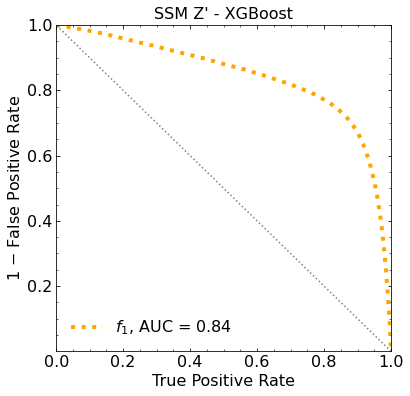


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68224	validation_1-logloss:0.68245
[1]	validation_0-logloss:0.67334	validation_1-logloss:0.67372
[2]	validation_0-logloss:0.66581	validation_1-logloss:0.66642
[3]	validation_0-logloss:0.65938	validation_1-logloss:0.66009
[4]	validation_0-logloss:0.65257	validation_1-logloss:0.65349
[5]	validation_0-logloss:0.64726	validation_1-logloss:0.64841
[6]	validation_0-logloss:0.64181	validation_1-logloss:0.64318
[7]	validation_0-logloss:0.63745	validation_1-logloss:0.63895
[8]	validation_0-logloss:0.63302	validation_1-logloss:0.63459
[9]	validation_0-logloss:0.62949	validation_1-logloss:0.63125
[10]	validation_0-logloss:0.62603	validation_1-logloss:0.62792
[11]	validation_0-logloss:0.62345	validation_1-logloss:0.62544
[12]	validation_0-logloss:0.62095	validation_1-logloss:0.62307
[13]	validation_0-logloss:0.61886	validation_1-logloss:0.62109
[14]	validation_0-logloss:0.61730	validation_1-logloss:0.61962
[15]	validation_0-logloss:0.61553	validation_1-logloss:0.61795
[1

[130]	validation_0-logloss:0.54164	validation_1-logloss:0.54941
[131]	validation_0-logloss:0.54138	validation_1-logloss:0.54918
[132]	validation_0-logloss:0.54119	validation_1-logloss:0.54901
[133]	validation_0-logloss:0.54097	validation_1-logloss:0.54883
[134]	validation_0-logloss:0.54073	validation_1-logloss:0.54862
[135]	validation_0-logloss:0.54031	validation_1-logloss:0.54821
[136]	validation_0-logloss:0.54012	validation_1-logloss:0.54803
[137]	validation_0-logloss:0.53995	validation_1-logloss:0.54789
[138]	validation_0-logloss:0.53971	validation_1-logloss:0.54768
[139]	validation_0-logloss:0.53941	validation_1-logloss:0.54741
[140]	validation_0-logloss:0.53925	validation_1-logloss:0.54727
[141]	validation_0-logloss:0.53909	validation_1-logloss:0.54712
[142]	validation_0-logloss:0.53788	validation_1-logloss:0.54597
[143]	validation_0-logloss:0.53741	validation_1-logloss:0.54553
[144]	validation_0-logloss:0.53644	validation_1-logloss:0.54462
[145]	validation_0-logloss:0.53612	valid

[259]	validation_0-logloss:0.51198	validation_1-logloss:0.52317
[260]	validation_0-logloss:0.51185	validation_1-logloss:0.52307
[261]	validation_0-logloss:0.51174	validation_1-logloss:0.52299
[262]	validation_0-logloss:0.51162	validation_1-logloss:0.52290
[263]	validation_0-logloss:0.51151	validation_1-logloss:0.52281
[264]	validation_0-logloss:0.51145	validation_1-logloss:0.52278
[265]	validation_0-logloss:0.51127	validation_1-logloss:0.52262
[266]	validation_0-logloss:0.51113	validation_1-logloss:0.52248
[267]	validation_0-logloss:0.51100	validation_1-logloss:0.52238
[268]	validation_0-logloss:0.51092	validation_1-logloss:0.52232
[269]	validation_0-logloss:0.51085	validation_1-logloss:0.52228
[270]	validation_0-logloss:0.51076	validation_1-logloss:0.52220
[271]	validation_0-logloss:0.51069	validation_1-logloss:0.52216
[272]	validation_0-logloss:0.51057	validation_1-logloss:0.52207
[273]	validation_0-logloss:0.51050	validation_1-logloss:0.52200
[274]	validation_0-logloss:0.51043	valid

[388]	validation_0-logloss:0.49962	validation_1-logloss:0.51392
[389]	validation_0-logloss:0.49959	validation_1-logloss:0.51391
[390]	validation_0-logloss:0.49955	validation_1-logloss:0.51387
[391]	validation_0-logloss:0.49952	validation_1-logloss:0.51387
[392]	validation_0-logloss:0.49932	validation_1-logloss:0.51371
[393]	validation_0-logloss:0.49926	validation_1-logloss:0.51367
[394]	validation_0-logloss:0.49923	validation_1-logloss:0.51365
[395]	validation_0-logloss:0.49913	validation_1-logloss:0.51359
[396]	validation_0-logloss:0.49894	validation_1-logloss:0.51341
[397]	validation_0-logloss:0.49889	validation_1-logloss:0.51338
[398]	validation_0-logloss:0.49886	validation_1-logloss:0.51336
[399]	validation_0-logloss:0.49884	validation_1-logloss:0.51335
[400]	validation_0-logloss:0.49875	validation_1-logloss:0.51329
[401]	validation_0-logloss:0.49871	validation_1-logloss:0.51327
[402]	validation_0-logloss:0.49860	validation_1-logloss:0.51318
[403]	validation_0-logloss:0.49857	valid

[517]	validation_0-logloss:0.49022	validation_1-logloss:0.50749
[518]	validation_0-logloss:0.49004	validation_1-logloss:0.50735
[519]	validation_0-logloss:0.49003	validation_1-logloss:0.50735
[520]	validation_0-logloss:0.48997	validation_1-logloss:0.50731
[521]	validation_0-logloss:0.48995	validation_1-logloss:0.50731
[522]	validation_0-logloss:0.48993	validation_1-logloss:0.50731
[523]	validation_0-logloss:0.48993	validation_1-logloss:0.50731
[524]	validation_0-logloss:0.48989	validation_1-logloss:0.50729
[525]	validation_0-logloss:0.48985	validation_1-logloss:0.50728
[526]	validation_0-logloss:0.48945	validation_1-logloss:0.50690
[527]	validation_0-logloss:0.48939	validation_1-logloss:0.50688
[528]	validation_0-logloss:0.48933	validation_1-logloss:0.50683
[529]	validation_0-logloss:0.48928	validation_1-logloss:0.50680
[530]	validation_0-logloss:0.48914	validation_1-logloss:0.50669
[531]	validation_0-logloss:0.48910	validation_1-logloss:0.50666
[532]	validation_0-logloss:0.48907	valid

[646]	validation_0-logloss:0.48171	validation_1-logloss:0.50193
[647]	validation_0-logloss:0.48169	validation_1-logloss:0.50193
[648]	validation_0-logloss:0.48166	validation_1-logloss:0.50193
[649]	validation_0-logloss:0.48163	validation_1-logloss:0.50193
[650]	validation_0-logloss:0.48163	validation_1-logloss:0.50193
[651]	validation_0-logloss:0.48156	validation_1-logloss:0.50190
[652]	validation_0-logloss:0.48153	validation_1-logloss:0.50190
[653]	validation_0-logloss:0.48152	validation_1-logloss:0.50190
[654]	validation_0-logloss:0.48126	validation_1-logloss:0.50169
[655]	validation_0-logloss:0.48120	validation_1-logloss:0.50165
[656]	validation_0-logloss:0.48116	validation_1-logloss:0.50163
[657]	validation_0-logloss:0.48063	validation_1-logloss:0.50113
[658]	validation_0-logloss:0.48049	validation_1-logloss:0.50101
[659]	validation_0-logloss:0.48046	validation_1-logloss:0.50101
[660]	validation_0-logloss:0.48042	validation_1-logloss:0.50099
[661]	validation_0-logloss:0.48039	valid

[775]	validation_0-logloss:0.47143	validation_1-logloss:0.49512
[776]	validation_0-logloss:0.47113	validation_1-logloss:0.49488
[777]	validation_0-logloss:0.47110	validation_1-logloss:0.49486
[778]	validation_0-logloss:0.47108	validation_1-logloss:0.49487
[779]	validation_0-logloss:0.47107	validation_1-logloss:0.49486
[780]	validation_0-logloss:0.47104	validation_1-logloss:0.49486
[781]	validation_0-logloss:0.47102	validation_1-logloss:0.49486
[782]	validation_0-logloss:0.47099	validation_1-logloss:0.49486
[783]	validation_0-logloss:0.47096	validation_1-logloss:0.49486
[784]	validation_0-logloss:0.47091	validation_1-logloss:0.49483
[785]	validation_0-logloss:0.47086	validation_1-logloss:0.49482
[786]	validation_0-logloss:0.47083	validation_1-logloss:0.49481
[787]	validation_0-logloss:0.47080	validation_1-logloss:0.49480
[788]	validation_0-logloss:0.47077	validation_1-logloss:0.49480
[789]	validation_0-logloss:0.47075	validation_1-logloss:0.49479
[790]	validation_0-logloss:0.47071	valid

[904]	validation_0-logloss:0.46600	validation_1-logloss:0.49245
[905]	validation_0-logloss:0.46598	validation_1-logloss:0.49245
[906]	validation_0-logloss:0.46596	validation_1-logloss:0.49244
[907]	validation_0-logloss:0.46594	validation_1-logloss:0.49244
[908]	validation_0-logloss:0.46592	validation_1-logloss:0.49244
[909]	validation_0-logloss:0.46589	validation_1-logloss:0.49245
[910]	validation_0-logloss:0.46587	validation_1-logloss:0.49245
[911]	validation_0-logloss:0.46584	validation_1-logloss:0.49245
[912]	validation_0-logloss:0.46582	validation_1-logloss:0.49243
[913]	validation_0-logloss:0.46581	validation_1-logloss:0.49244
[914]	validation_0-logloss:0.46577	validation_1-logloss:0.49244
[915]	validation_0-logloss:0.46574	validation_1-logloss:0.49244
[916]	validation_0-logloss:0.46570	validation_1-logloss:0.49243
[917]	validation_0-logloss:0.46565	validation_1-logloss:0.49242
[918]	validation_0-logloss:0.46563	validation_1-logloss:0.49243
[919]	validation_0-logloss:0.46559	valid

[1032]	validation_0-logloss:0.46065	validation_1-logloss:0.48988
[1033]	validation_0-logloss:0.46062	validation_1-logloss:0.48986
[1034]	validation_0-logloss:0.46060	validation_1-logloss:0.48987
[1035]	validation_0-logloss:0.46053	validation_1-logloss:0.48980
[1036]	validation_0-logloss:0.46051	validation_1-logloss:0.48979
[1037]	validation_0-logloss:0.46039	validation_1-logloss:0.48969
[1038]	validation_0-logloss:0.46037	validation_1-logloss:0.48970
[1039]	validation_0-logloss:0.46035	validation_1-logloss:0.48970
[1040]	validation_0-logloss:0.46033	validation_1-logloss:0.48969
[1041]	validation_0-logloss:0.46030	validation_1-logloss:0.48968
[1042]	validation_0-logloss:0.46028	validation_1-logloss:0.48967
[1043]	validation_0-logloss:0.46027	validation_1-logloss:0.48967
[1044]	validation_0-logloss:0.46024	validation_1-logloss:0.48968
[1045]	validation_0-logloss:0.46022	validation_1-logloss:0.48968
[1046]	validation_0-logloss:0.46019	validation_1-logloss:0.48967
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45604	validation_1-logloss:0.48802
[1160]	validation_0-logloss:0.45603	validation_1-logloss:0.48803
[1161]	validation_0-logloss:0.45601	validation_1-logloss:0.48802
[1162]	validation_0-logloss:0.45599	validation_1-logloss:0.48803
[1163]	validation_0-logloss:0.45597	validation_1-logloss:0.48803
[1164]	validation_0-logloss:0.45595	validation_1-logloss:0.48803
[1165]	validation_0-logloss:0.45594	validation_1-logloss:0.48803
[1166]	validation_0-logloss:0.45592	validation_1-logloss:0.48803
[1167]	validation_0-logloss:0.45590	validation_1-logloss:0.48803
[1168]	validation_0-logloss:0.45581	validation_1-logloss:0.48797
[1169]	validation_0-logloss:0.45576	validation_1-logloss:0.48794
[1170]	validation_0-logloss:0.45574	validation_1-logloss:0.48794
[1171]	validation_0-logloss:0.45573	validation_1-logloss:0.48794
[1172]	validation_0-logloss:0.45567	validation_1-logloss:0.48790
[1173]	validation_0-logloss:0.45562	validation_1-logloss:0.48787
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45282	validation_1-logloss:0.48747
[1287]	validation_0-logloss:0.45281	validation_1-logloss:0.48747
[1288]	validation_0-logloss:0.45277	validation_1-logloss:0.48747
[1289]	validation_0-logloss:0.45274	validation_1-logloss:0.48747
[1290]	validation_0-logloss:0.45273	validation_1-logloss:0.48747
[1291]	validation_0-logloss:0.45266	validation_1-logloss:0.48745
[1292]	validation_0-logloss:0.45265	validation_1-logloss:0.48745
[1293]	validation_0-logloss:0.45262	validation_1-logloss:0.48744
[1294]	validation_0-logloss:0.45261	validation_1-logloss:0.48743
[1295]	validation_0-logloss:0.45259	validation_1-logloss:0.48743
[1296]	validation_0-logloss:0.45256	validation_1-logloss:0.48744
[1297]	validation_0-logloss:0.45250	validation_1-logloss:0.48740
[1298]	validation_0-logloss:0.45249	validation_1-logloss:0.48740
[1299]	validation_0-logloss:0.45248	validation_1-logloss:0.48740
[1300]	validation_0-logloss:0.45244	validation_1-logloss:0.48739
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44892	validation_1-logloss:0.48639
[1414]	validation_0-logloss:0.44890	validation_1-logloss:0.48638
[1415]	validation_0-logloss:0.44887	validation_1-logloss:0.48638
[1416]	validation_0-logloss:0.44882	validation_1-logloss:0.48634
[1417]	validation_0-logloss:0.44880	validation_1-logloss:0.48634
[1418]	validation_0-logloss:0.44875	validation_1-logloss:0.48631
[1419]	validation_0-logloss:0.44872	validation_1-logloss:0.48631
[1420]	validation_0-logloss:0.44867	validation_1-logloss:0.48629
[1421]	validation_0-logloss:0.44866	validation_1-logloss:0.48629
[1422]	validation_0-logloss:0.44863	validation_1-logloss:0.48628
[1423]	validation_0-logloss:0.44858	validation_1-logloss:0.48627
[1424]	validation_0-logloss:0.44850	validation_1-logloss:0.48622
[1425]	validation_0-logloss:0.44846	validation_1-logloss:0.48623
[1426]	validation_0-logloss:0.44845	validation_1-logloss:0.48623
[1427]	validation_0-logloss:0.44843	validation_1-logloss:0.48623
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44456	validation_1-logloss:0.48492
[1541]	validation_0-logloss:0.44453	validation_1-logloss:0.48491
[1542]	validation_0-logloss:0.44452	validation_1-logloss:0.48491
[1543]	validation_0-logloss:0.44451	validation_1-logloss:0.48491
[1544]	validation_0-logloss:0.44449	validation_1-logloss:0.48491
[1545]	validation_0-logloss:0.44447	validation_1-logloss:0.48491
[1546]	validation_0-logloss:0.44446	validation_1-logloss:0.48491
[1547]	validation_0-logloss:0.44443	validation_1-logloss:0.48491
[1548]	validation_0-logloss:0.44439	validation_1-logloss:0.48490
[1549]	validation_0-logloss:0.44436	validation_1-logloss:0.48490
[1550]	validation_0-logloss:0.44430	validation_1-logloss:0.48486
[1551]	validation_0-logloss:0.44427	validation_1-logloss:0.48485
[1552]	validation_0-logloss:0.44420	validation_1-logloss:0.48481
[1553]	validation_0-logloss:0.44416	validation_1-logloss:0.48479
[1554]	validation_0-logloss:0.44413	validation_1-logloss:0.48477
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44105	validation_1-logloss:0.48418
[1668]	validation_0-logloss:0.44104	validation_1-logloss:0.48418
[1669]	validation_0-logloss:0.44103	validation_1-logloss:0.48418
[1670]	validation_0-logloss:0.44100	validation_1-logloss:0.48419
[1671]	validation_0-logloss:0.44096	validation_1-logloss:0.48419
[1672]	validation_0-logloss:0.44095	validation_1-logloss:0.48419
[1673]	validation_0-logloss:0.44091	validation_1-logloss:0.48419
[1674]	validation_0-logloss:0.44090	validation_1-logloss:0.48420
[1675]	validation_0-logloss:0.44084	validation_1-logloss:0.48416
[1676]	validation_0-logloss:0.44083	validation_1-logloss:0.48416
[1677]	validation_0-logloss:0.44079	validation_1-logloss:0.48416
[1678]	validation_0-logloss:0.44076	validation_1-logloss:0.48416
[1679]	validation_0-logloss:0.44074	validation_1-logloss:0.48416
[1680]	validation_0-logloss:0.44072	validation_1-logloss:0.48416
[1681]	validation_0-logloss:0.44068	validation_1-logloss:0.48415
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43728	validation_1-logloss:0.48331
[1795]	validation_0-logloss:0.43725	validation_1-logloss:0.48331
[1796]	validation_0-logloss:0.43724	validation_1-logloss:0.48331
[1797]	validation_0-logloss:0.43721	validation_1-logloss:0.48330
[1798]	validation_0-logloss:0.43718	validation_1-logloss:0.48330
[1799]	validation_0-logloss:0.43715	validation_1-logloss:0.48329
[1800]	validation_0-logloss:0.43714	validation_1-logloss:0.48329
[1801]	validation_0-logloss:0.43712	validation_1-logloss:0.48329
[1802]	validation_0-logloss:0.43710	validation_1-logloss:0.48329
[1803]	validation_0-logloss:0.43708	validation_1-logloss:0.48328
[1804]	validation_0-logloss:0.43706	validation_1-logloss:0.48328
[1805]	validation_0-logloss:0.43703	validation_1-logloss:0.48328
[1806]	validation_0-logloss:0.43702	validation_1-logloss:0.48328
[1807]	validation_0-logloss:0.43702	validation_1-logloss:0.48328
[1808]	validation_0-logloss:0.43699	validation_1-logloss:0.48327
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43463	validation_1-logloss:0.48315
[1922]	validation_0-logloss:0.43461	validation_1-logloss:0.48315
[1923]	validation_0-logloss:0.43458	validation_1-logloss:0.48315
[1924]	validation_0-logloss:0.43457	validation_1-logloss:0.48315
[1925]	validation_0-logloss:0.43454	validation_1-logloss:0.48314
[1926]	validation_0-logloss:0.43451	validation_1-logloss:0.48315
[1927]	validation_0-logloss:0.43449	validation_1-logloss:0.48315
[1928]	validation_0-logloss:0.43448	validation_1-logloss:0.48315


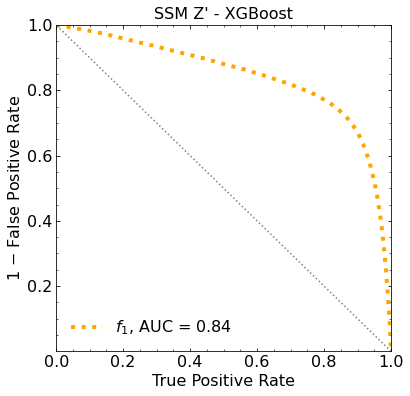


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68220	validation_1-logloss:0.68252
[1]	validation_0-logloss:0.67307	validation_1-logloss:0.67352
[2]	validation_0-logloss:0.66574	validation_1-logloss:0.66639
[3]	validation_0-logloss:0.65860	validation_1-logloss:0.65956
[4]	validation_0-logloss:0.65182	validation_1-logloss:0.65295
[5]	validation_0-logloss:0.64674	validation_1-logloss:0.64796
[6]	validation_0-logloss:0.64168	validation_1-logloss:0.64318
[7]	validation_0-logloss:0.63710	validation_1-logloss:0.63877
[8]	validation_0-logloss:0.63346	validation_1-logloss:0.63523
[9]	validation_0-logloss:0.62974	validation_1-logloss:0.63163
[10]	validation_0-logloss:0.62681	validation_1-logloss:0.62887
[11]	validation_0-logloss:0.62405	validation_1-logloss:0.62620
[12]	validation_0-logloss:0.62141	validation_1-logloss:0.62365
[13]	validation_0-logloss:0.61929	validation_1-logloss:0.62165
[14]	validation_0-logloss:0.61723	validation_1-logloss:0.61977
[15]	validation_0-logloss:0.61541	validation_1-logloss:0.61804
[1

[130]	validation_0-logloss:0.54245	validation_1-logloss:0.55080
[131]	validation_0-logloss:0.54182	validation_1-logloss:0.55019
[132]	validation_0-logloss:0.54152	validation_1-logloss:0.54994
[133]	validation_0-logloss:0.54128	validation_1-logloss:0.54974
[134]	validation_0-logloss:0.54115	validation_1-logloss:0.54963
[135]	validation_0-logloss:0.54078	validation_1-logloss:0.54931
[136]	validation_0-logloss:0.54048	validation_1-logloss:0.54906
[137]	validation_0-logloss:0.54022	validation_1-logloss:0.54881
[138]	validation_0-logloss:0.54000	validation_1-logloss:0.54863
[139]	validation_0-logloss:0.53979	validation_1-logloss:0.54844
[140]	validation_0-logloss:0.53961	validation_1-logloss:0.54831
[141]	validation_0-logloss:0.53951	validation_1-logloss:0.54821
[142]	validation_0-logloss:0.53936	validation_1-logloss:0.54809
[143]	validation_0-logloss:0.53887	validation_1-logloss:0.54763
[144]	validation_0-logloss:0.53854	validation_1-logloss:0.54732
[145]	validation_0-logloss:0.53842	valid

[259]	validation_0-logloss:0.51297	validation_1-logloss:0.52481
[260]	validation_0-logloss:0.51291	validation_1-logloss:0.52478
[261]	validation_0-logloss:0.51257	validation_1-logloss:0.52448
[262]	validation_0-logloss:0.51251	validation_1-logloss:0.52443
[263]	validation_0-logloss:0.51243	validation_1-logloss:0.52439
[264]	validation_0-logloss:0.51235	validation_1-logloss:0.52432
[265]	validation_0-logloss:0.51189	validation_1-logloss:0.52390
[266]	validation_0-logloss:0.51177	validation_1-logloss:0.52382
[267]	validation_0-logloss:0.51168	validation_1-logloss:0.52375
[268]	validation_0-logloss:0.51157	validation_1-logloss:0.52367
[269]	validation_0-logloss:0.51141	validation_1-logloss:0.52352
[270]	validation_0-logloss:0.51116	validation_1-logloss:0.52331
[271]	validation_0-logloss:0.51075	validation_1-logloss:0.52293
[272]	validation_0-logloss:0.51046	validation_1-logloss:0.52268
[273]	validation_0-logloss:0.50984	validation_1-logloss:0.52209
[274]	validation_0-logloss:0.50950	valid

[388]	validation_0-logloss:0.49614	validation_1-logloss:0.51115
[389]	validation_0-logloss:0.49609	validation_1-logloss:0.51112
[390]	validation_0-logloss:0.49607	validation_1-logloss:0.51112
[391]	validation_0-logloss:0.49601	validation_1-logloss:0.51107
[392]	validation_0-logloss:0.49577	validation_1-logloss:0.51086
[393]	validation_0-logloss:0.49561	validation_1-logloss:0.51074
[394]	validation_0-logloss:0.49553	validation_1-logloss:0.51067
[395]	validation_0-logloss:0.49550	validation_1-logloss:0.51067
[396]	validation_0-logloss:0.49547	validation_1-logloss:0.51066
[397]	validation_0-logloss:0.49539	validation_1-logloss:0.51059
[398]	validation_0-logloss:0.49535	validation_1-logloss:0.51059
[399]	validation_0-logloss:0.49522	validation_1-logloss:0.51049
[400]	validation_0-logloss:0.49519	validation_1-logloss:0.51047
[401]	validation_0-logloss:0.49513	validation_1-logloss:0.51043
[402]	validation_0-logloss:0.49507	validation_1-logloss:0.51040
[403]	validation_0-logloss:0.49505	valid

[517]	validation_0-logloss:0.48663	validation_1-logloss:0.50471
[518]	validation_0-logloss:0.48660	validation_1-logloss:0.50470
[519]	validation_0-logloss:0.48658	validation_1-logloss:0.50470
[520]	validation_0-logloss:0.48657	validation_1-logloss:0.50469
[521]	validation_0-logloss:0.48649	validation_1-logloss:0.50465
[522]	validation_0-logloss:0.48635	validation_1-logloss:0.50451
[523]	validation_0-logloss:0.48632	validation_1-logloss:0.50450
[524]	validation_0-logloss:0.48629	validation_1-logloss:0.50450
[525]	validation_0-logloss:0.48627	validation_1-logloss:0.50450
[526]	validation_0-logloss:0.48622	validation_1-logloss:0.50446
[527]	validation_0-logloss:0.48621	validation_1-logloss:0.50446
[528]	validation_0-logloss:0.48618	validation_1-logloss:0.50447
[529]	validation_0-logloss:0.48609	validation_1-logloss:0.50441
[530]	validation_0-logloss:0.48599	validation_1-logloss:0.50435
[531]	validation_0-logloss:0.48597	validation_1-logloss:0.50434
[532]	validation_0-logloss:0.48596	valid

[646]	validation_0-logloss:0.47951	validation_1-logloss:0.50040
[647]	validation_0-logloss:0.47948	validation_1-logloss:0.50040
[648]	validation_0-logloss:0.47943	validation_1-logloss:0.50038
[649]	validation_0-logloss:0.47937	validation_1-logloss:0.50034
[650]	validation_0-logloss:0.47934	validation_1-logloss:0.50033
[651]	validation_0-logloss:0.47925	validation_1-logloss:0.50026
[652]	validation_0-logloss:0.47919	validation_1-logloss:0.50022
[653]	validation_0-logloss:0.47915	validation_1-logloss:0.50021
[654]	validation_0-logloss:0.47911	validation_1-logloss:0.50020
[655]	validation_0-logloss:0.47907	validation_1-logloss:0.50021
[656]	validation_0-logloss:0.47903	validation_1-logloss:0.50018
[657]	validation_0-logloss:0.47897	validation_1-logloss:0.50015
[658]	validation_0-logloss:0.47895	validation_1-logloss:0.50014
[659]	validation_0-logloss:0.47889	validation_1-logloss:0.50010
[660]	validation_0-logloss:0.47883	validation_1-logloss:0.50008
[661]	validation_0-logloss:0.47881	valid

[775]	validation_0-logloss:0.47195	validation_1-logloss:0.49580
[776]	validation_0-logloss:0.47192	validation_1-logloss:0.49580
[777]	validation_0-logloss:0.47191	validation_1-logloss:0.49580
[778]	validation_0-logloss:0.47188	validation_1-logloss:0.49580
[779]	validation_0-logloss:0.47184	validation_1-logloss:0.49578
[780]	validation_0-logloss:0.47176	validation_1-logloss:0.49572
[781]	validation_0-logloss:0.47174	validation_1-logloss:0.49572
[782]	validation_0-logloss:0.47174	validation_1-logloss:0.49572
[783]	validation_0-logloss:0.47171	validation_1-logloss:0.49572
[784]	validation_0-logloss:0.47167	validation_1-logloss:0.49571
[785]	validation_0-logloss:0.47164	validation_1-logloss:0.49571
[786]	validation_0-logloss:0.47153	validation_1-logloss:0.49563
[787]	validation_0-logloss:0.47121	validation_1-logloss:0.49531
[788]	validation_0-logloss:0.47119	validation_1-logloss:0.49531
[789]	validation_0-logloss:0.47117	validation_1-logloss:0.49532
[790]	validation_0-logloss:0.47112	valid

[904]	validation_0-logloss:0.46584	validation_1-logloss:0.49275
[905]	validation_0-logloss:0.46560	validation_1-logloss:0.49254
[906]	validation_0-logloss:0.46556	validation_1-logloss:0.49253
[907]	validation_0-logloss:0.46554	validation_1-logloss:0.49253
[908]	validation_0-logloss:0.46547	validation_1-logloss:0.49250
[909]	validation_0-logloss:0.46529	validation_1-logloss:0.49235
[910]	validation_0-logloss:0.46506	validation_1-logloss:0.49216
[911]	validation_0-logloss:0.46503	validation_1-logloss:0.49214
[912]	validation_0-logloss:0.46500	validation_1-logloss:0.49214
[913]	validation_0-logloss:0.46498	validation_1-logloss:0.49214
[914]	validation_0-logloss:0.46496	validation_1-logloss:0.49215
[915]	validation_0-logloss:0.46495	validation_1-logloss:0.49215
[916]	validation_0-logloss:0.46487	validation_1-logloss:0.49210
[917]	validation_0-logloss:0.46474	validation_1-logloss:0.49201
[918]	validation_0-logloss:0.46465	validation_1-logloss:0.49195
[919]	validation_0-logloss:0.46464	valid

[1032]	validation_0-logloss:0.45975	validation_1-logloss:0.48956
[1033]	validation_0-logloss:0.45974	validation_1-logloss:0.48956
[1034]	validation_0-logloss:0.45974	validation_1-logloss:0.48956
[1035]	validation_0-logloss:0.45966	validation_1-logloss:0.48951
[1036]	validation_0-logloss:0.45963	validation_1-logloss:0.48950
[1037]	validation_0-logloss:0.45961	validation_1-logloss:0.48950
[1038]	validation_0-logloss:0.45959	validation_1-logloss:0.48951
[1039]	validation_0-logloss:0.45958	validation_1-logloss:0.48950
[1040]	validation_0-logloss:0.45954	validation_1-logloss:0.48951
[1041]	validation_0-logloss:0.45947	validation_1-logloss:0.48948
[1042]	validation_0-logloss:0.45945	validation_1-logloss:0.48947
[1043]	validation_0-logloss:0.45943	validation_1-logloss:0.48947
[1044]	validation_0-logloss:0.45941	validation_1-logloss:0.48947
[1045]	validation_0-logloss:0.45938	validation_1-logloss:0.48946
[1046]	validation_0-logloss:0.45935	validation_1-logloss:0.48947
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45575	validation_1-logloss:0.48835
[1160]	validation_0-logloss:0.45573	validation_1-logloss:0.48835
[1161]	validation_0-logloss:0.45570	validation_1-logloss:0.48833
[1162]	validation_0-logloss:0.45567	validation_1-logloss:0.48833
[1163]	validation_0-logloss:0.45565	validation_1-logloss:0.48833
[1164]	validation_0-logloss:0.45564	validation_1-logloss:0.48833
[1165]	validation_0-logloss:0.45563	validation_1-logloss:0.48833
[1166]	validation_0-logloss:0.45560	validation_1-logloss:0.48833
[1167]	validation_0-logloss:0.45553	validation_1-logloss:0.48829
[1168]	validation_0-logloss:0.45551	validation_1-logloss:0.48829
[1169]	validation_0-logloss:0.45543	validation_1-logloss:0.48823
[1170]	validation_0-logloss:0.45542	validation_1-logloss:0.48823
[1171]	validation_0-logloss:0.45541	validation_1-logloss:0.48823
[1172]	validation_0-logloss:0.45529	validation_1-logloss:0.48815
[1173]	validation_0-logloss:0.45527	validation_1-logloss:0.48815
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45136	validation_1-logloss:0.48700
[1287]	validation_0-logloss:0.45133	validation_1-logloss:0.48700
[1288]	validation_0-logloss:0.45132	validation_1-logloss:0.48700
[1289]	validation_0-logloss:0.45130	validation_1-logloss:0.48700
[1290]	validation_0-logloss:0.45127	validation_1-logloss:0.48699
[1291]	validation_0-logloss:0.45124	validation_1-logloss:0.48697
[1292]	validation_0-logloss:0.45117	validation_1-logloss:0.48694
[1293]	validation_0-logloss:0.45110	validation_1-logloss:0.48690
[1294]	validation_0-logloss:0.45107	validation_1-logloss:0.48689
[1295]	validation_0-logloss:0.45100	validation_1-logloss:0.48685
[1296]	validation_0-logloss:0.45092	validation_1-logloss:0.48679
[1297]	validation_0-logloss:0.45082	validation_1-logloss:0.48673
[1298]	validation_0-logloss:0.45078	validation_1-logloss:0.48673
[1299]	validation_0-logloss:0.45070	validation_1-logloss:0.48669
[1300]	validation_0-logloss:0.45067	validation_1-logloss:0.48670
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44747	validation_1-logloss:0.48598
[1414]	validation_0-logloss:0.44745	validation_1-logloss:0.48598
[1415]	validation_0-logloss:0.44743	validation_1-logloss:0.48598
[1416]	validation_0-logloss:0.44741	validation_1-logloss:0.48599
[1417]	validation_0-logloss:0.44740	validation_1-logloss:0.48598
[1418]	validation_0-logloss:0.44738	validation_1-logloss:0.48598
[1419]	validation_0-logloss:0.44736	validation_1-logloss:0.48599
[1420]	validation_0-logloss:0.44733	validation_1-logloss:0.48597
[1421]	validation_0-logloss:0.44732	validation_1-logloss:0.48597
[1422]	validation_0-logloss:0.44729	validation_1-logloss:0.48598
[1423]	validation_0-logloss:0.44727	validation_1-logloss:0.48598
[1424]	validation_0-logloss:0.44725	validation_1-logloss:0.48599
[1425]	validation_0-logloss:0.44724	validation_1-logloss:0.48599
[1426]	validation_0-logloss:0.44724	validation_1-logloss:0.48598
[1427]	validation_0-logloss:0.44722	validation_1-logloss:0.48599
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44406	validation_1-logloss:0.48528
[1541]	validation_0-logloss:0.44404	validation_1-logloss:0.48529
[1542]	validation_0-logloss:0.44400	validation_1-logloss:0.48529
[1543]	validation_0-logloss:0.44397	validation_1-logloss:0.48529
[1544]	validation_0-logloss:0.44395	validation_1-logloss:0.48529
[1545]	validation_0-logloss:0.44393	validation_1-logloss:0.48529
[1546]	validation_0-logloss:0.44392	validation_1-logloss:0.48529
[1547]	validation_0-logloss:0.44389	validation_1-logloss:0.48530
[1548]	validation_0-logloss:0.44386	validation_1-logloss:0.48530
[1549]	validation_0-logloss:0.44384	validation_1-logloss:0.48529
[1550]	validation_0-logloss:0.44383	validation_1-logloss:0.48530
[1551]	validation_0-logloss:0.44382	validation_1-logloss:0.48530
[1552]	validation_0-logloss:0.44379	validation_1-logloss:0.48530
[1553]	validation_0-logloss:0.44377	validation_1-logloss:0.48531
[1554]	validation_0-logloss:0.44375	validation_1-logloss:0.48531
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44083	validation_1-logloss:0.48493
[1668]	validation_0-logloss:0.44080	validation_1-logloss:0.48493
[1669]	validation_0-logloss:0.44077	validation_1-logloss:0.48491
[1670]	validation_0-logloss:0.44075	validation_1-logloss:0.48491
[1671]	validation_0-logloss:0.44073	validation_1-logloss:0.48492
[1672]	validation_0-logloss:0.44071	validation_1-logloss:0.48491
[1673]	validation_0-logloss:0.44068	validation_1-logloss:0.48492
[1674]	validation_0-logloss:0.44065	validation_1-logloss:0.48492
[1675]	validation_0-logloss:0.44061	validation_1-logloss:0.48491
[1676]	validation_0-logloss:0.44058	validation_1-logloss:0.48491
[1677]	validation_0-logloss:0.44054	validation_1-logloss:0.48491
[1678]	validation_0-logloss:0.44051	validation_1-logloss:0.48491
[1679]	validation_0-logloss:0.44048	validation_1-logloss:0.48491
[1680]	validation_0-logloss:0.44047	validation_1-logloss:0.48491
[1681]	validation_0-logloss:0.44046	validation_1-logloss:0.48491
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43736	validation_1-logloss:0.48447
[1795]	validation_0-logloss:0.43731	validation_1-logloss:0.48443
[1796]	validation_0-logloss:0.43728	validation_1-logloss:0.48443
[1797]	validation_0-logloss:0.43726	validation_1-logloss:0.48442
[1798]	validation_0-logloss:0.43725	validation_1-logloss:0.48442
[1799]	validation_0-logloss:0.43722	validation_1-logloss:0.48441
[1800]	validation_0-logloss:0.43720	validation_1-logloss:0.48441
[1801]	validation_0-logloss:0.43715	validation_1-logloss:0.48438
[1802]	validation_0-logloss:0.43713	validation_1-logloss:0.48437
[1803]	validation_0-logloss:0.43710	validation_1-logloss:0.48437
[1804]	validation_0-logloss:0.43706	validation_1-logloss:0.48436
[1805]	validation_0-logloss:0.43704	validation_1-logloss:0.48436
[1806]	validation_0-logloss:0.43700	validation_1-logloss:0.48435
[1807]	validation_0-logloss:0.43699	validation_1-logloss:0.48436
[1808]	validation_0-logloss:0.43695	validation_1-logloss:0.48435
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43417	validation_1-logloss:0.48396
[1922]	validation_0-logloss:0.43415	validation_1-logloss:0.48396
[1923]	validation_0-logloss:0.43414	validation_1-logloss:0.48397
[1924]	validation_0-logloss:0.43412	validation_1-logloss:0.48397
[1925]	validation_0-logloss:0.43411	validation_1-logloss:0.48397
[1926]	validation_0-logloss:0.43407	validation_1-logloss:0.48396
[1927]	validation_0-logloss:0.43404	validation_1-logloss:0.48393
[1928]	validation_0-logloss:0.43401	validation_1-logloss:0.48393
[1929]	validation_0-logloss:0.43399	validation_1-logloss:0.48393
[1930]	validation_0-logloss:0.43397	validation_1-logloss:0.48393
[1931]	validation_0-logloss:0.43394	validation_1-logloss:0.48393
[1932]	validation_0-logloss:0.43392	validation_1-logloss:0.48393
[1933]	validation_0-logloss:0.43390	validation_1-logloss:0.48393
[1934]	validation_0-logloss:0.43381	validation_1-logloss:0.48387
[1935]	validation_0-logloss:0.43379	validation_1-logloss:0.48387
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43083	validation_1-logloss:0.48347
[2049]	validation_0-logloss:0.43081	validation_1-logloss:0.48346
[2050]	validation_0-logloss:0.43077	validation_1-logloss:0.48345
[2051]	validation_0-logloss:0.43073	validation_1-logloss:0.48344
[2052]	validation_0-logloss:0.43072	validation_1-logloss:0.48345
[2053]	validation_0-logloss:0.43069	validation_1-logloss:0.48345
[2054]	validation_0-logloss:0.43066	validation_1-logloss:0.48345
[2055]	validation_0-logloss:0.43064	validation_1-logloss:0.48344
[2056]	validation_0-logloss:0.43062	validation_1-logloss:0.48344
[2057]	validation_0-logloss:0.43059	validation_1-logloss:0.48345
[2058]	validation_0-logloss:0.43058	validation_1-logloss:0.48345
[2059]	validation_0-logloss:0.43055	validation_1-logloss:0.48344
[2060]	validation_0-logloss:0.43053	validation_1-logloss:0.48344
[2061]	validation_0-logloss:0.43052	validation_1-logloss:0.48345
[2062]	validation_0-logloss:0.43050	validation_1-logloss:0.48344
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42748	validation_1-logloss:0.48302
[2176]	validation_0-logloss:0.42747	validation_1-logloss:0.48302
[2177]	validation_0-logloss:0.42744	validation_1-logloss:0.48301
[2178]	validation_0-logloss:0.42740	validation_1-logloss:0.48299
[2179]	validation_0-logloss:0.42739	validation_1-logloss:0.48299
[2180]	validation_0-logloss:0.42736	validation_1-logloss:0.48299
[2181]	validation_0-logloss:0.42734	validation_1-logloss:0.48300
[2182]	validation_0-logloss:0.42730	validation_1-logloss:0.48298
[2183]	validation_0-logloss:0.42728	validation_1-logloss:0.48299
[2184]	validation_0-logloss:0.42726	validation_1-logloss:0.48298
[2185]	validation_0-logloss:0.42725	validation_1-logloss:0.48299
[2186]	validation_0-logloss:0.42722	validation_1-logloss:0.48298
[2187]	validation_0-logloss:0.42718	validation_1-logloss:0.48298
[2188]	validation_0-logloss:0.42717	validation_1-logloss:0.48298
[2189]	validation_0-logloss:0.42717	validation_1-logloss:0.48298
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.42441	validation_1-logloss:0.48260
[2303]	validation_0-logloss:0.42438	validation_1-logloss:0.48261
[2304]	validation_0-logloss:0.42436	validation_1-logloss:0.48260
[2305]	validation_0-logloss:0.42433	validation_1-logloss:0.48260
[2306]	validation_0-logloss:0.42431	validation_1-logloss:0.48260
[2307]	validation_0-logloss:0.42429	validation_1-logloss:0.48261
[2308]	validation_0-logloss:0.42428	validation_1-logloss:0.48261
[2309]	validation_0-logloss:0.42427	validation_1-logloss:0.48261
[2310]	validation_0-logloss:0.42424	validation_1-logloss:0.48261
[2311]	validation_0-logloss:0.42421	validation_1-logloss:0.48260
[2312]	validation_0-logloss:0.42416	validation_1-logloss:0.48260
[2313]	validation_0-logloss:0.42413	validation_1-logloss:0.48259
[2314]	validation_0-logloss:0.42409	validation_1-logloss:0.48258
[2315]	validation_0-logloss:0.42408	validation_1-logloss:0.48258
[2316]	validation_0-logloss:0.42405	validation_1-logloss:0.48259
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.42133	validation_1-logloss:0.48224
[2430]	validation_0-logloss:0.42131	validation_1-logloss:0.48224
[2431]	validation_0-logloss:0.42130	validation_1-logloss:0.48224
[2432]	validation_0-logloss:0.42129	validation_1-logloss:0.48224
[2433]	validation_0-logloss:0.42127	validation_1-logloss:0.48225
[2434]	validation_0-logloss:0.42125	validation_1-logloss:0.48224
[2435]	validation_0-logloss:0.42124	validation_1-logloss:0.48225
[2436]	validation_0-logloss:0.42123	validation_1-logloss:0.48225
[2437]	validation_0-logloss:0.42123	validation_1-logloss:0.48225
[2438]	validation_0-logloss:0.42122	validation_1-logloss:0.48225
[2439]	validation_0-logloss:0.42122	validation_1-logloss:0.48225
[2440]	validation_0-logloss:0.42120	validation_1-logloss:0.48225
[2441]	validation_0-logloss:0.42118	validation_1-logloss:0.48225
[2442]	validation_0-logloss:0.42114	validation_1-logloss:0.48223
[2443]	validation_0-logloss:0.42112	validation_1-logloss:0.48224
[2444]	validation_0-loglo

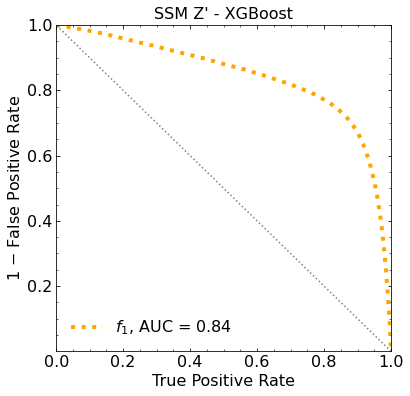


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68229	validation_1-logloss:0.68253
[1]	validation_0-logloss:0.67316	validation_1-logloss:0.67364
[2]	validation_0-logloss:0.66536	validation_1-logloss:0.66603
[3]	validation_0-logloss:0.65780	validation_1-logloss:0.65861
[4]	validation_0-logloss:0.65184	validation_1-logloss:0.65288
[5]	validation_0-logloss:0.64639	validation_1-logloss:0.64755
[6]	validation_0-logloss:0.64086	validation_1-logloss:0.64225
[7]	validation_0-logloss:0.63709	validation_1-logloss:0.63857
[8]	validation_0-logloss:0.63336	validation_1-logloss:0.63497
[9]	validation_0-logloss:0.62991	validation_1-logloss:0.63167
[10]	validation_0-logloss:0.62703	validation_1-logloss:0.62882
[11]	validation_0-logloss:0.62369	validation_1-logloss:0.62562
[12]	validation_0-logloss:0.62154	validation_1-logloss:0.62352
[13]	validation_0-logloss:0.61969	validation_1-logloss:0.62174
[14]	validation_0-logloss:0.61822	validation_1-logloss:0.62034
[15]	validation_0-logloss:0.61647	validation_1-logloss:0.61874
[1

[130]	validation_0-logloss:0.54151	validation_1-logloss:0.54911
[131]	validation_0-logloss:0.54089	validation_1-logloss:0.54854
[132]	validation_0-logloss:0.54058	validation_1-logloss:0.54825
[133]	validation_0-logloss:0.54027	validation_1-logloss:0.54798
[134]	validation_0-logloss:0.53929	validation_1-logloss:0.54702
[135]	validation_0-logloss:0.53888	validation_1-logloss:0.54664
[136]	validation_0-logloss:0.53863	validation_1-logloss:0.54642
[137]	validation_0-logloss:0.53852	validation_1-logloss:0.54634
[138]	validation_0-logloss:0.53821	validation_1-logloss:0.54607
[139]	validation_0-logloss:0.53724	validation_1-logloss:0.54513
[140]	validation_0-logloss:0.53639	validation_1-logloss:0.54436
[141]	validation_0-logloss:0.53587	validation_1-logloss:0.54385
[142]	validation_0-logloss:0.53561	validation_1-logloss:0.54359
[143]	validation_0-logloss:0.53544	validation_1-logloss:0.54347
[144]	validation_0-logloss:0.53532	validation_1-logloss:0.54338
[145]	validation_0-logloss:0.53514	valid

[259]	validation_0-logloss:0.50993	validation_1-logloss:0.52111
[260]	validation_0-logloss:0.50987	validation_1-logloss:0.52107
[261]	validation_0-logloss:0.50980	validation_1-logloss:0.52103
[262]	validation_0-logloss:0.50969	validation_1-logloss:0.52093
[263]	validation_0-logloss:0.50958	validation_1-logloss:0.52086
[264]	validation_0-logloss:0.50954	validation_1-logloss:0.52084
[265]	validation_0-logloss:0.50897	validation_1-logloss:0.52033
[266]	validation_0-logloss:0.50889	validation_1-logloss:0.52027
[267]	validation_0-logloss:0.50875	validation_1-logloss:0.52015
[268]	validation_0-logloss:0.50863	validation_1-logloss:0.52006
[269]	validation_0-logloss:0.50824	validation_1-logloss:0.51968
[270]	validation_0-logloss:0.50809	validation_1-logloss:0.51956
[271]	validation_0-logloss:0.50796	validation_1-logloss:0.51947
[272]	validation_0-logloss:0.50784	validation_1-logloss:0.51937
[273]	validation_0-logloss:0.50779	validation_1-logloss:0.51934
[274]	validation_0-logloss:0.50773	valid

[388]	validation_0-logloss:0.49641	validation_1-logloss:0.51066
[389]	validation_0-logloss:0.49638	validation_1-logloss:0.51066
[390]	validation_0-logloss:0.49594	validation_1-logloss:0.51026
[391]	validation_0-logloss:0.49589	validation_1-logloss:0.51022
[392]	validation_0-logloss:0.49584	validation_1-logloss:0.51020
[393]	validation_0-logloss:0.49580	validation_1-logloss:0.51018
[394]	validation_0-logloss:0.49577	validation_1-logloss:0.51017
[395]	validation_0-logloss:0.49571	validation_1-logloss:0.51014
[396]	validation_0-logloss:0.49565	validation_1-logloss:0.51011
[397]	validation_0-logloss:0.49560	validation_1-logloss:0.51007
[398]	validation_0-logloss:0.49554	validation_1-logloss:0.51004
[399]	validation_0-logloss:0.49546	validation_1-logloss:0.50998
[400]	validation_0-logloss:0.49543	validation_1-logloss:0.50997
[401]	validation_0-logloss:0.49539	validation_1-logloss:0.50997
[402]	validation_0-logloss:0.49536	validation_1-logloss:0.50995
[403]	validation_0-logloss:0.49500	valid

[517]	validation_0-logloss:0.48845	validation_1-logloss:0.50565
[518]	validation_0-logloss:0.48844	validation_1-logloss:0.50565
[519]	validation_0-logloss:0.48842	validation_1-logloss:0.50565
[520]	validation_0-logloss:0.48839	validation_1-logloss:0.50564
[521]	validation_0-logloss:0.48837	validation_1-logloss:0.50564
[522]	validation_0-logloss:0.48834	validation_1-logloss:0.50562
[523]	validation_0-logloss:0.48831	validation_1-logloss:0.50562
[524]	validation_0-logloss:0.48828	validation_1-logloss:0.50561
[525]	validation_0-logloss:0.48802	validation_1-logloss:0.50538
[526]	validation_0-logloss:0.48784	validation_1-logloss:0.50522
[527]	validation_0-logloss:0.48779	validation_1-logloss:0.50519
[528]	validation_0-logloss:0.48777	validation_1-logloss:0.50519
[529]	validation_0-logloss:0.48771	validation_1-logloss:0.50517
[530]	validation_0-logloss:0.48764	validation_1-logloss:0.50512
[531]	validation_0-logloss:0.48759	validation_1-logloss:0.50510
[532]	validation_0-logloss:0.48756	valid

[646]	validation_0-logloss:0.48105	validation_1-logloss:0.50104
[647]	validation_0-logloss:0.48104	validation_1-logloss:0.50104
[648]	validation_0-logloss:0.48094	validation_1-logloss:0.50097
[649]	validation_0-logloss:0.48093	validation_1-logloss:0.50097
[650]	validation_0-logloss:0.48087	validation_1-logloss:0.50093
[651]	validation_0-logloss:0.48085	validation_1-logloss:0.50093
[652]	validation_0-logloss:0.48073	validation_1-logloss:0.50082
[653]	validation_0-logloss:0.48070	validation_1-logloss:0.50080
[654]	validation_0-logloss:0.48068	validation_1-logloss:0.50080
[655]	validation_0-logloss:0.48066	validation_1-logloss:0.50079
[656]	validation_0-logloss:0.48064	validation_1-logloss:0.50079
[657]	validation_0-logloss:0.48063	validation_1-logloss:0.50079
[658]	validation_0-logloss:0.48052	validation_1-logloss:0.50071
[659]	validation_0-logloss:0.48049	validation_1-logloss:0.50071
[660]	validation_0-logloss:0.48045	validation_1-logloss:0.50070
[661]	validation_0-logloss:0.48044	valid

[775]	validation_0-logloss:0.47428	validation_1-logloss:0.49714
[776]	validation_0-logloss:0.47427	validation_1-logloss:0.49714
[777]	validation_0-logloss:0.47426	validation_1-logloss:0.49714
[778]	validation_0-logloss:0.47420	validation_1-logloss:0.49711
[779]	validation_0-logloss:0.47419	validation_1-logloss:0.49711
[780]	validation_0-logloss:0.47418	validation_1-logloss:0.49711
[781]	validation_0-logloss:0.47413	validation_1-logloss:0.49708
[782]	validation_0-logloss:0.47411	validation_1-logloss:0.49709
[783]	validation_0-logloss:0.47409	validation_1-logloss:0.49709
[784]	validation_0-logloss:0.47393	validation_1-logloss:0.49697
[785]	validation_0-logloss:0.47389	validation_1-logloss:0.49695
[786]	validation_0-logloss:0.47381	validation_1-logloss:0.49690
[787]	validation_0-logloss:0.47376	validation_1-logloss:0.49689
[788]	validation_0-logloss:0.47373	validation_1-logloss:0.49688
[789]	validation_0-logloss:0.47367	validation_1-logloss:0.49685
[790]	validation_0-logloss:0.47365	valid

[904]	validation_0-logloss:0.46713	validation_1-logloss:0.49301
[905]	validation_0-logloss:0.46710	validation_1-logloss:0.49301
[906]	validation_0-logloss:0.46709	validation_1-logloss:0.49301
[907]	validation_0-logloss:0.46707	validation_1-logloss:0.49301
[908]	validation_0-logloss:0.46703	validation_1-logloss:0.49301
[909]	validation_0-logloss:0.46697	validation_1-logloss:0.49299
[910]	validation_0-logloss:0.46688	validation_1-logloss:0.49295
[911]	validation_0-logloss:0.46686	validation_1-logloss:0.49294
[912]	validation_0-logloss:0.46682	validation_1-logloss:0.49293
[913]	validation_0-logloss:0.46678	validation_1-logloss:0.49291
[914]	validation_0-logloss:0.46676	validation_1-logloss:0.49291
[915]	validation_0-logloss:0.46671	validation_1-logloss:0.49289
[916]	validation_0-logloss:0.46666	validation_1-logloss:0.49287
[917]	validation_0-logloss:0.46661	validation_1-logloss:0.49284
[918]	validation_0-logloss:0.46659	validation_1-logloss:0.49283
[919]	validation_0-logloss:0.46647	valid

[1032]	validation_0-logloss:0.46095	validation_1-logloss:0.49018
[1033]	validation_0-logloss:0.46094	validation_1-logloss:0.49018
[1034]	validation_0-logloss:0.46090	validation_1-logloss:0.49016
[1035]	validation_0-logloss:0.46085	validation_1-logloss:0.49013
[1036]	validation_0-logloss:0.46082	validation_1-logloss:0.49013
[1037]	validation_0-logloss:0.46080	validation_1-logloss:0.49013
[1038]	validation_0-logloss:0.46074	validation_1-logloss:0.49010
[1039]	validation_0-logloss:0.46072	validation_1-logloss:0.49010
[1040]	validation_0-logloss:0.46070	validation_1-logloss:0.49010
[1041]	validation_0-logloss:0.46057	validation_1-logloss:0.48999
[1042]	validation_0-logloss:0.46054	validation_1-logloss:0.49000
[1043]	validation_0-logloss:0.46052	validation_1-logloss:0.49000
[1044]	validation_0-logloss:0.46049	validation_1-logloss:0.49000
[1045]	validation_0-logloss:0.46037	validation_1-logloss:0.48991
[1046]	validation_0-logloss:0.46029	validation_1-logloss:0.48984
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45655	validation_1-logloss:0.48864
[1160]	validation_0-logloss:0.45654	validation_1-logloss:0.48863
[1161]	validation_0-logloss:0.45649	validation_1-logloss:0.48860
[1162]	validation_0-logloss:0.45646	validation_1-logloss:0.48859
[1163]	validation_0-logloss:0.45642	validation_1-logloss:0.48857
[1164]	validation_0-logloss:0.45640	validation_1-logloss:0.48857
[1165]	validation_0-logloss:0.45637	validation_1-logloss:0.48856
[1166]	validation_0-logloss:0.45635	validation_1-logloss:0.48856
[1167]	validation_0-logloss:0.45632	validation_1-logloss:0.48856
[1168]	validation_0-logloss:0.45629	validation_1-logloss:0.48856
[1169]	validation_0-logloss:0.45626	validation_1-logloss:0.48857
[1170]	validation_0-logloss:0.45625	validation_1-logloss:0.48857
[1171]	validation_0-logloss:0.45623	validation_1-logloss:0.48857
[1172]	validation_0-logloss:0.45618	validation_1-logloss:0.48853
[1173]	validation_0-logloss:0.45614	validation_1-logloss:0.48851
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45214	validation_1-logloss:0.48715
[1287]	validation_0-logloss:0.45207	validation_1-logloss:0.48711
[1288]	validation_0-logloss:0.45203	validation_1-logloss:0.48710
[1289]	validation_0-logloss:0.45202	validation_1-logloss:0.48710
[1290]	validation_0-logloss:0.45199	validation_1-logloss:0.48710
[1291]	validation_0-logloss:0.45197	validation_1-logloss:0.48710
[1292]	validation_0-logloss:0.45194	validation_1-logloss:0.48709
[1293]	validation_0-logloss:0.45193	validation_1-logloss:0.48710
[1294]	validation_0-logloss:0.45191	validation_1-logloss:0.48709
[1295]	validation_0-logloss:0.45188	validation_1-logloss:0.48710
[1296]	validation_0-logloss:0.45182	validation_1-logloss:0.48705
[1297]	validation_0-logloss:0.45181	validation_1-logloss:0.48706
[1298]	validation_0-logloss:0.45180	validation_1-logloss:0.48706
[1299]	validation_0-logloss:0.45176	validation_1-logloss:0.48705
[1300]	validation_0-logloss:0.45174	validation_1-logloss:0.48705
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44760	validation_1-logloss:0.48554
[1414]	validation_0-logloss:0.44759	validation_1-logloss:0.48554
[1415]	validation_0-logloss:0.44758	validation_1-logloss:0.48554
[1416]	validation_0-logloss:0.44756	validation_1-logloss:0.48555
[1417]	validation_0-logloss:0.44754	validation_1-logloss:0.48555
[1418]	validation_0-logloss:0.44753	validation_1-logloss:0.48556
[1419]	validation_0-logloss:0.44750	validation_1-logloss:0.48556
[1420]	validation_0-logloss:0.44748	validation_1-logloss:0.48554
[1421]	validation_0-logloss:0.44747	validation_1-logloss:0.48554
[1422]	validation_0-logloss:0.44745	validation_1-logloss:0.48554
[1423]	validation_0-logloss:0.44742	validation_1-logloss:0.48554
[1424]	validation_0-logloss:0.44739	validation_1-logloss:0.48553
[1425]	validation_0-logloss:0.44738	validation_1-logloss:0.48553
[1426]	validation_0-logloss:0.44737	validation_1-logloss:0.48553
[1427]	validation_0-logloss:0.44734	validation_1-logloss:0.48553
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44465	validation_1-logloss:0.48506
[1541]	validation_0-logloss:0.44462	validation_1-logloss:0.48507
[1542]	validation_0-logloss:0.44461	validation_1-logloss:0.48507
[1543]	validation_0-logloss:0.44457	validation_1-logloss:0.48507
[1544]	validation_0-logloss:0.44450	validation_1-logloss:0.48502
[1545]	validation_0-logloss:0.44449	validation_1-logloss:0.48502
[1546]	validation_0-logloss:0.44447	validation_1-logloss:0.48501
[1547]	validation_0-logloss:0.44443	validation_1-logloss:0.48499
[1548]	validation_0-logloss:0.44440	validation_1-logloss:0.48498
[1549]	validation_0-logloss:0.44438	validation_1-logloss:0.48498
[1550]	validation_0-logloss:0.44433	validation_1-logloss:0.48495
[1551]	validation_0-logloss:0.44431	validation_1-logloss:0.48495
[1552]	validation_0-logloss:0.44428	validation_1-logloss:0.48496
[1553]	validation_0-logloss:0.44426	validation_1-logloss:0.48495
[1554]	validation_0-logloss:0.44424	validation_1-logloss:0.48495
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44087	validation_1-logloss:0.48410
[1668]	validation_0-logloss:0.44084	validation_1-logloss:0.48410
[1669]	validation_0-logloss:0.44083	validation_1-logloss:0.48411
[1670]	validation_0-logloss:0.44079	validation_1-logloss:0.48409
[1671]	validation_0-logloss:0.44074	validation_1-logloss:0.48405
[1672]	validation_0-logloss:0.44072	validation_1-logloss:0.48405
[1673]	validation_0-logloss:0.44069	validation_1-logloss:0.48405
[1674]	validation_0-logloss:0.44061	validation_1-logloss:0.48399
[1675]	validation_0-logloss:0.44059	validation_1-logloss:0.48399
[1676]	validation_0-logloss:0.44055	validation_1-logloss:0.48400
[1677]	validation_0-logloss:0.44053	validation_1-logloss:0.48401
[1678]	validation_0-logloss:0.44051	validation_1-logloss:0.48401
[1679]	validation_0-logloss:0.44048	validation_1-logloss:0.48401
[1680]	validation_0-logloss:0.44042	validation_1-logloss:0.48397
[1681]	validation_0-logloss:0.44042	validation_1-logloss:0.48398
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43725	validation_1-logloss:0.48339
[1795]	validation_0-logloss:0.43722	validation_1-logloss:0.48338
[1796]	validation_0-logloss:0.43719	validation_1-logloss:0.48338
[1797]	validation_0-logloss:0.43717	validation_1-logloss:0.48337
[1798]	validation_0-logloss:0.43716	validation_1-logloss:0.48337
[1799]	validation_0-logloss:0.43713	validation_1-logloss:0.48337
[1800]	validation_0-logloss:0.43710	validation_1-logloss:0.48337
[1801]	validation_0-logloss:0.43708	validation_1-logloss:0.48336
[1802]	validation_0-logloss:0.43706	validation_1-logloss:0.48336
[1803]	validation_0-logloss:0.43704	validation_1-logloss:0.48337
[1804]	validation_0-logloss:0.43702	validation_1-logloss:0.48337
[1805]	validation_0-logloss:0.43700	validation_1-logloss:0.48337
[1806]	validation_0-logloss:0.43695	validation_1-logloss:0.48334
[1807]	validation_0-logloss:0.43694	validation_1-logloss:0.48334
[1808]	validation_0-logloss:0.43692	validation_1-logloss:0.48334
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43412	validation_1-logloss:0.48295
[1922]	validation_0-logloss:0.43408	validation_1-logloss:0.48295
[1923]	validation_0-logloss:0.43406	validation_1-logloss:0.48294
[1924]	validation_0-logloss:0.43405	validation_1-logloss:0.48294
[1925]	validation_0-logloss:0.43403	validation_1-logloss:0.48294
[1926]	validation_0-logloss:0.43400	validation_1-logloss:0.48293
[1927]	validation_0-logloss:0.43399	validation_1-logloss:0.48293
[1928]	validation_0-logloss:0.43395	validation_1-logloss:0.48292
[1929]	validation_0-logloss:0.43394	validation_1-logloss:0.48293
[1930]	validation_0-logloss:0.43391	validation_1-logloss:0.48291
[1931]	validation_0-logloss:0.43391	validation_1-logloss:0.48291
[1932]	validation_0-logloss:0.43389	validation_1-logloss:0.48292
[1933]	validation_0-logloss:0.43388	validation_1-logloss:0.48291
[1934]	validation_0-logloss:0.43387	validation_1-logloss:0.48292
[1935]	validation_0-logloss:0.43384	validation_1-logloss:0.48292
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43107	validation_1-logloss:0.48251
[2049]	validation_0-logloss:0.43106	validation_1-logloss:0.48251
[2050]	validation_0-logloss:0.43103	validation_1-logloss:0.48250
[2051]	validation_0-logloss:0.43101	validation_1-logloss:0.48250
[2052]	validation_0-logloss:0.43099	validation_1-logloss:0.48251
[2053]	validation_0-logloss:0.43097	validation_1-logloss:0.48251
[2054]	validation_0-logloss:0.43091	validation_1-logloss:0.48249
[2055]	validation_0-logloss:0.43089	validation_1-logloss:0.48249
[2056]	validation_0-logloss:0.43087	validation_1-logloss:0.48249
[2057]	validation_0-logloss:0.43084	validation_1-logloss:0.48249
[2058]	validation_0-logloss:0.43082	validation_1-logloss:0.48249
[2059]	validation_0-logloss:0.43079	validation_1-logloss:0.48249
[2060]	validation_0-logloss:0.43077	validation_1-logloss:0.48249
[2061]	validation_0-logloss:0.43074	validation_1-logloss:0.48249
[2062]	validation_0-logloss:0.43072	validation_1-logloss:0.48249
[2063]	validation_0-loglo

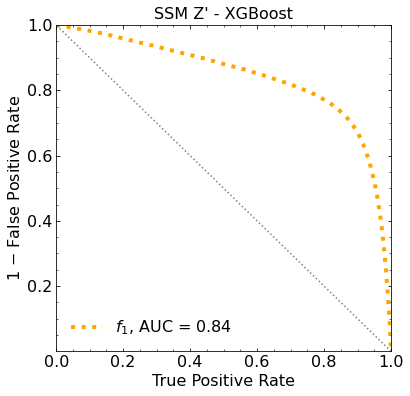


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68226	validation_1-logloss:0.68274
[1]	validation_0-logloss:0.67322	validation_1-logloss:0.67368
[2]	validation_0-logloss:0.66471	validation_1-logloss:0.66540
[3]	validation_0-logloss:0.65818	validation_1-logloss:0.65905
[4]	validation_0-logloss:0.65167	validation_1-logloss:0.65273
[5]	validation_0-logloss:0.64618	validation_1-logloss:0.64747
[6]	validation_0-logloss:0.64102	validation_1-logloss:0.64245
[7]	validation_0-logloss:0.63682	validation_1-logloss:0.63834
[8]	validation_0-logloss:0.63298	validation_1-logloss:0.63459
[9]	validation_0-logloss:0.62914	validation_1-logloss:0.63091
[10]	validation_0-logloss:0.62580	validation_1-logloss:0.62762
[11]	validation_0-logloss:0.62330	validation_1-logloss:0.62525
[12]	validation_0-logloss:0.62053	validation_1-logloss:0.62261
[13]	validation_0-logloss:0.61854	validation_1-logloss:0.62073
[14]	validation_0-logloss:0.61666	validation_1-logloss:0.61885
[15]	validation_0-logloss:0.61525	validation_1-logloss:0.61759
[1

[130]	validation_0-logloss:0.54159	validation_1-logloss:0.54949
[131]	validation_0-logloss:0.54137	validation_1-logloss:0.54931
[132]	validation_0-logloss:0.54120	validation_1-logloss:0.54918
[133]	validation_0-logloss:0.54077	validation_1-logloss:0.54878
[134]	validation_0-logloss:0.54047	validation_1-logloss:0.54851
[135]	validation_0-logloss:0.54034	validation_1-logloss:0.54841
[136]	validation_0-logloss:0.54000	validation_1-logloss:0.54810
[137]	validation_0-logloss:0.53895	validation_1-logloss:0.54707
[138]	validation_0-logloss:0.53865	validation_1-logloss:0.54680
[139]	validation_0-logloss:0.53854	validation_1-logloss:0.54670
[140]	validation_0-logloss:0.53819	validation_1-logloss:0.54637
[141]	validation_0-logloss:0.53792	validation_1-logloss:0.54614
[142]	validation_0-logloss:0.53773	validation_1-logloss:0.54598
[143]	validation_0-logloss:0.53737	validation_1-logloss:0.54565
[144]	validation_0-logloss:0.53722	validation_1-logloss:0.54554
[145]	validation_0-logloss:0.53693	valid

[259]	validation_0-logloss:0.51134	validation_1-logloss:0.52283
[260]	validation_0-logloss:0.51091	validation_1-logloss:0.52243
[261]	validation_0-logloss:0.51085	validation_1-logloss:0.52240
[262]	validation_0-logloss:0.51076	validation_1-logloss:0.52235
[263]	validation_0-logloss:0.51068	validation_1-logloss:0.52231
[264]	validation_0-logloss:0.51064	validation_1-logloss:0.52228
[265]	validation_0-logloss:0.51056	validation_1-logloss:0.52222
[266]	validation_0-logloss:0.51044	validation_1-logloss:0.52210
[267]	validation_0-logloss:0.51007	validation_1-logloss:0.52175
[268]	validation_0-logloss:0.51002	validation_1-logloss:0.52172
[269]	validation_0-logloss:0.50997	validation_1-logloss:0.52170
[270]	validation_0-logloss:0.50992	validation_1-logloss:0.52169
[271]	validation_0-logloss:0.50976	validation_1-logloss:0.52153
[272]	validation_0-logloss:0.50966	validation_1-logloss:0.52147
[273]	validation_0-logloss:0.50959	validation_1-logloss:0.52142
[274]	validation_0-logloss:0.50951	valid

[388]	validation_0-logloss:0.49806	validation_1-logloss:0.51269
[389]	validation_0-logloss:0.49800	validation_1-logloss:0.51264
[390]	validation_0-logloss:0.49795	validation_1-logloss:0.51262
[391]	validation_0-logloss:0.49788	validation_1-logloss:0.51258
[392]	validation_0-logloss:0.49787	validation_1-logloss:0.51258
[393]	validation_0-logloss:0.49784	validation_1-logloss:0.51257
[394]	validation_0-logloss:0.49772	validation_1-logloss:0.51248
[395]	validation_0-logloss:0.49754	validation_1-logloss:0.51233
[396]	validation_0-logloss:0.49747	validation_1-logloss:0.51230
[397]	validation_0-logloss:0.49742	validation_1-logloss:0.51227
[398]	validation_0-logloss:0.49720	validation_1-logloss:0.51210
[399]	validation_0-logloss:0.49696	validation_1-logloss:0.51191
[400]	validation_0-logloss:0.49684	validation_1-logloss:0.51180
[401]	validation_0-logloss:0.49677	validation_1-logloss:0.51176
[402]	validation_0-logloss:0.49673	validation_1-logloss:0.51175
[403]	validation_0-logloss:0.49669	valid

[517]	validation_0-logloss:0.48791	validation_1-logloss:0.50566
[518]	validation_0-logloss:0.48790	validation_1-logloss:0.50566
[519]	validation_0-logloss:0.48788	validation_1-logloss:0.50566
[520]	validation_0-logloss:0.48780	validation_1-logloss:0.50560
[521]	validation_0-logloss:0.48777	validation_1-logloss:0.50558
[522]	validation_0-logloss:0.48776	validation_1-logloss:0.50558
[523]	validation_0-logloss:0.48767	validation_1-logloss:0.50552
[524]	validation_0-logloss:0.48762	validation_1-logloss:0.50550
[525]	validation_0-logloss:0.48743	validation_1-logloss:0.50535
[526]	validation_0-logloss:0.48741	validation_1-logloss:0.50534
[527]	validation_0-logloss:0.48721	validation_1-logloss:0.50516
[528]	validation_0-logloss:0.48719	validation_1-logloss:0.50515
[529]	validation_0-logloss:0.48717	validation_1-logloss:0.50515
[530]	validation_0-logloss:0.48707	validation_1-logloss:0.50506
[531]	validation_0-logloss:0.48705	validation_1-logloss:0.50506
[532]	validation_0-logloss:0.48702	valid

[646]	validation_0-logloss:0.48023	validation_1-logloss:0.50096
[647]	validation_0-logloss:0.48012	validation_1-logloss:0.50089
[648]	validation_0-logloss:0.48007	validation_1-logloss:0.50087
[649]	validation_0-logloss:0.48005	validation_1-logloss:0.50087
[650]	validation_0-logloss:0.48005	validation_1-logloss:0.50087
[651]	validation_0-logloss:0.48002	validation_1-logloss:0.50088
[652]	validation_0-logloss:0.47998	validation_1-logloss:0.50089
[653]	validation_0-logloss:0.47992	validation_1-logloss:0.50087
[654]	validation_0-logloss:0.47986	validation_1-logloss:0.50083
[655]	validation_0-logloss:0.47983	validation_1-logloss:0.50081
[656]	validation_0-logloss:0.47978	validation_1-logloss:0.50080
[657]	validation_0-logloss:0.47975	validation_1-logloss:0.50079
[658]	validation_0-logloss:0.47972	validation_1-logloss:0.50078
[659]	validation_0-logloss:0.47969	validation_1-logloss:0.50076
[660]	validation_0-logloss:0.47966	validation_1-logloss:0.50075
[661]	validation_0-logloss:0.47963	valid

[775]	validation_0-logloss:0.47254	validation_1-logloss:0.49639
[776]	validation_0-logloss:0.47252	validation_1-logloss:0.49640
[777]	validation_0-logloss:0.47245	validation_1-logloss:0.49634
[778]	validation_0-logloss:0.47241	validation_1-logloss:0.49632
[779]	validation_0-logloss:0.47209	validation_1-logloss:0.49604
[780]	validation_0-logloss:0.47203	validation_1-logloss:0.49602
[781]	validation_0-logloss:0.47199	validation_1-logloss:0.49600
[782]	validation_0-logloss:0.47198	validation_1-logloss:0.49600
[783]	validation_0-logloss:0.47197	validation_1-logloss:0.49600
[784]	validation_0-logloss:0.47193	validation_1-logloss:0.49598
[785]	validation_0-logloss:0.47186	validation_1-logloss:0.49594
[786]	validation_0-logloss:0.47152	validation_1-logloss:0.49562
[787]	validation_0-logloss:0.47143	validation_1-logloss:0.49556
[788]	validation_0-logloss:0.47136	validation_1-logloss:0.49553
[789]	validation_0-logloss:0.47113	validation_1-logloss:0.49532
[790]	validation_0-logloss:0.47096	valid

[904]	validation_0-logloss:0.46584	validation_1-logloss:0.49291
[905]	validation_0-logloss:0.46581	validation_1-logloss:0.49291
[906]	validation_0-logloss:0.46580	validation_1-logloss:0.49292
[907]	validation_0-logloss:0.46575	validation_1-logloss:0.49290
[908]	validation_0-logloss:0.46574	validation_1-logloss:0.49290
[909]	validation_0-logloss:0.46572	validation_1-logloss:0.49290
[910]	validation_0-logloss:0.46568	validation_1-logloss:0.49289
[911]	validation_0-logloss:0.46545	validation_1-logloss:0.49267
[912]	validation_0-logloss:0.46523	validation_1-logloss:0.49245
[913]	validation_0-logloss:0.46521	validation_1-logloss:0.49244
[914]	validation_0-logloss:0.46517	validation_1-logloss:0.49245
[915]	validation_0-logloss:0.46509	validation_1-logloss:0.49239
[916]	validation_0-logloss:0.46508	validation_1-logloss:0.49239
[917]	validation_0-logloss:0.46487	validation_1-logloss:0.49220
[918]	validation_0-logloss:0.46484	validation_1-logloss:0.49218
[919]	validation_0-logloss:0.46482	valid

[1032]	validation_0-logloss:0.46074	validation_1-logloss:0.49057
[1033]	validation_0-logloss:0.46072	validation_1-logloss:0.49058
[1034]	validation_0-logloss:0.46069	validation_1-logloss:0.49057
[1035]	validation_0-logloss:0.46068	validation_1-logloss:0.49057
[1036]	validation_0-logloss:0.46066	validation_1-logloss:0.49057
[1037]	validation_0-logloss:0.46061	validation_1-logloss:0.49054
[1038]	validation_0-logloss:0.46059	validation_1-logloss:0.49054
[1039]	validation_0-logloss:0.46045	validation_1-logloss:0.49040
[1040]	validation_0-logloss:0.46043	validation_1-logloss:0.49041
[1041]	validation_0-logloss:0.46041	validation_1-logloss:0.49041
[1042]	validation_0-logloss:0.46036	validation_1-logloss:0.49039
[1043]	validation_0-logloss:0.46033	validation_1-logloss:0.49038
[1044]	validation_0-logloss:0.46032	validation_1-logloss:0.49038
[1045]	validation_0-logloss:0.46026	validation_1-logloss:0.49034
[1046]	validation_0-logloss:0.46015	validation_1-logloss:0.49026
[1047]	validation_0-loglo

[1285]	validation_0-logloss:0.45193	validation_1-logloss:0.48744
[1286]	validation_0-logloss:0.45190	validation_1-logloss:0.48744
[1287]	validation_0-logloss:0.45187	validation_1-logloss:0.48743
[1288]	validation_0-logloss:0.45184	validation_1-logloss:0.48742
[1289]	validation_0-logloss:0.45182	validation_1-logloss:0.48742
[1290]	validation_0-logloss:0.45181	validation_1-logloss:0.48742
[1291]	validation_0-logloss:0.45181	validation_1-logloss:0.48742
[1292]	validation_0-logloss:0.45179	validation_1-logloss:0.48742
[1293]	validation_0-logloss:0.45176	validation_1-logloss:0.48740
[1294]	validation_0-logloss:0.45173	validation_1-logloss:0.48739
[1295]	validation_0-logloss:0.45172	validation_1-logloss:0.48739
[1296]	validation_0-logloss:0.45169	validation_1-logloss:0.48738
[1297]	validation_0-logloss:0.45161	validation_1-logloss:0.48734
[1298]	validation_0-logloss:0.45160	validation_1-logloss:0.48735
[1299]	validation_0-logloss:0.45152	validation_1-logloss:0.48728
[1300]	validation_0-loglo

[1412]	validation_0-logloss:0.44751	validation_1-logloss:0.48589
[1413]	validation_0-logloss:0.44749	validation_1-logloss:0.48589
[1414]	validation_0-logloss:0.44749	validation_1-logloss:0.48589
[1415]	validation_0-logloss:0.44748	validation_1-logloss:0.48588
[1416]	validation_0-logloss:0.44747	validation_1-logloss:0.48589
[1417]	validation_0-logloss:0.44746	validation_1-logloss:0.48589
[1418]	validation_0-logloss:0.44742	validation_1-logloss:0.48589
[1419]	validation_0-logloss:0.44739	validation_1-logloss:0.48589
[1420]	validation_0-logloss:0.44735	validation_1-logloss:0.48587
[1421]	validation_0-logloss:0.44732	validation_1-logloss:0.48587
[1422]	validation_0-logloss:0.44729	validation_1-logloss:0.48586
[1423]	validation_0-logloss:0.44726	validation_1-logloss:0.48586
[1424]	validation_0-logloss:0.44722	validation_1-logloss:0.48585
[1425]	validation_0-logloss:0.44720	validation_1-logloss:0.48585
[1426]	validation_0-logloss:0.44717	validation_1-logloss:0.48585
[1427]	validation_0-loglo

[1539]	validation_0-logloss:0.44375	validation_1-logloss:0.48510
[1540]	validation_0-logloss:0.44369	validation_1-logloss:0.48506
[1541]	validation_0-logloss:0.44354	validation_1-logloss:0.48496
[1542]	validation_0-logloss:0.44352	validation_1-logloss:0.48496
[1543]	validation_0-logloss:0.44345	validation_1-logloss:0.48492
[1544]	validation_0-logloss:0.44339	validation_1-logloss:0.48488
[1545]	validation_0-logloss:0.44335	validation_1-logloss:0.48488
[1546]	validation_0-logloss:0.44333	validation_1-logloss:0.48489
[1547]	validation_0-logloss:0.44329	validation_1-logloss:0.48489
[1548]	validation_0-logloss:0.44327	validation_1-logloss:0.48488
[1549]	validation_0-logloss:0.44326	validation_1-logloss:0.48488
[1550]	validation_0-logloss:0.44323	validation_1-logloss:0.48488
[1551]	validation_0-logloss:0.44322	validation_1-logloss:0.48488
[1552]	validation_0-logloss:0.44319	validation_1-logloss:0.48486
[1553]	validation_0-logloss:0.44315	validation_1-logloss:0.48486
[1554]	validation_0-loglo

[1666]	validation_0-logloss:0.43982	validation_1-logloss:0.48402
[1667]	validation_0-logloss:0.43975	validation_1-logloss:0.48397
[1668]	validation_0-logloss:0.43972	validation_1-logloss:0.48398
[1669]	validation_0-logloss:0.43969	validation_1-logloss:0.48397
[1670]	validation_0-logloss:0.43967	validation_1-logloss:0.48397
[1671]	validation_0-logloss:0.43966	validation_1-logloss:0.48397
[1672]	validation_0-logloss:0.43964	validation_1-logloss:0.48397
[1673]	validation_0-logloss:0.43963	validation_1-logloss:0.48399
[1674]	validation_0-logloss:0.43959	validation_1-logloss:0.48398
[1675]	validation_0-logloss:0.43958	validation_1-logloss:0.48399
[1676]	validation_0-logloss:0.43953	validation_1-logloss:0.48395
[1677]	validation_0-logloss:0.43949	validation_1-logloss:0.48393
[1678]	validation_0-logloss:0.43946	validation_1-logloss:0.48394
[1679]	validation_0-logloss:0.43944	validation_1-logloss:0.48395
[1680]	validation_0-logloss:0.43941	validation_1-logloss:0.48394
[1681]	validation_0-loglo

[1793]	validation_0-logloss:0.43668	validation_1-logloss:0.48367
[1794]	validation_0-logloss:0.43666	validation_1-logloss:0.48368
[1795]	validation_0-logloss:0.43662	validation_1-logloss:0.48367
[1796]	validation_0-logloss:0.43660	validation_1-logloss:0.48367
[1797]	validation_0-logloss:0.43656	validation_1-logloss:0.48367
[1798]	validation_0-logloss:0.43655	validation_1-logloss:0.48368
[1799]	validation_0-logloss:0.43651	validation_1-logloss:0.48368
[1800]	validation_0-logloss:0.43649	validation_1-logloss:0.48368
[1801]	validation_0-logloss:0.43646	validation_1-logloss:0.48368
[1802]	validation_0-logloss:0.43643	validation_1-logloss:0.48369
[1803]	validation_0-logloss:0.43640	validation_1-logloss:0.48369
[1804]	validation_0-logloss:0.43637	validation_1-logloss:0.48367
[1805]	validation_0-logloss:0.43634	validation_1-logloss:0.48367
[1806]	validation_0-logloss:0.43631	validation_1-logloss:0.48367
[1807]	validation_0-logloss:0.43628	validation_1-logloss:0.48367
[1808]	validation_0-loglo

[1920]	validation_0-logloss:0.43346	validation_1-logloss:0.48314
[1921]	validation_0-logloss:0.43345	validation_1-logloss:0.48314
[1922]	validation_0-logloss:0.43343	validation_1-logloss:0.48314
[1923]	validation_0-logloss:0.43341	validation_1-logloss:0.48315
[1924]	validation_0-logloss:0.43338	validation_1-logloss:0.48315
[1925]	validation_0-logloss:0.43336	validation_1-logloss:0.48315
[1926]	validation_0-logloss:0.43334	validation_1-logloss:0.48316
[1927]	validation_0-logloss:0.43332	validation_1-logloss:0.48316
[1928]	validation_0-logloss:0.43332	validation_1-logloss:0.48316
[1929]	validation_0-logloss:0.43330	validation_1-logloss:0.48316
[1930]	validation_0-logloss:0.43324	validation_1-logloss:0.48313
[1931]	validation_0-logloss:0.43321	validation_1-logloss:0.48313
[1932]	validation_0-logloss:0.43319	validation_1-logloss:0.48312
[1933]	validation_0-logloss:0.43317	validation_1-logloss:0.48312
[1934]	validation_0-logloss:0.43315	validation_1-logloss:0.48312
[1935]	validation_0-loglo

[2047]	validation_0-logloss:0.43047	validation_1-logloss:0.48279
[2048]	validation_0-logloss:0.43044	validation_1-logloss:0.48278
[2049]	validation_0-logloss:0.43039	validation_1-logloss:0.48275
[2050]	validation_0-logloss:0.43038	validation_1-logloss:0.48275
[2051]	validation_0-logloss:0.43036	validation_1-logloss:0.48275
[2052]	validation_0-logloss:0.43033	validation_1-logloss:0.48273
[2053]	validation_0-logloss:0.43030	validation_1-logloss:0.48272
[2054]	validation_0-logloss:0.43029	validation_1-logloss:0.48272
[2055]	validation_0-logloss:0.43028	validation_1-logloss:0.48272
[2056]	validation_0-logloss:0.43026	validation_1-logloss:0.48272
[2057]	validation_0-logloss:0.43023	validation_1-logloss:0.48273
[2058]	validation_0-logloss:0.43021	validation_1-logloss:0.48273
[2059]	validation_0-logloss:0.43018	validation_1-logloss:0.48273
[2060]	validation_0-logloss:0.43015	validation_1-logloss:0.48273
[2061]	validation_0-logloss:0.43012	validation_1-logloss:0.48272
[2062]	validation_0-loglo

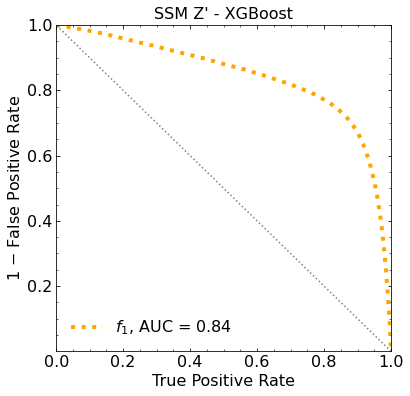


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68212	validation_1-logloss:0.68251
[1]	validation_0-logloss:0.67319	validation_1-logloss:0.67368
[2]	validation_0-logloss:0.66545	validation_1-logloss:0.66624
[3]	validation_0-logloss:0.65799	validation_1-logloss:0.65896
[4]	validation_0-logloss:0.65136	validation_1-logloss:0.65263
[5]	validation_0-logloss:0.64643	validation_1-logloss:0.64779
[6]	validation_0-logloss:0.64122	validation_1-logloss:0.64281
[7]	validation_0-logloss:0.63675	validation_1-logloss:0.63854
[8]	validation_0-logloss:0.63296	validation_1-logloss:0.63485
[9]	validation_0-logloss:0.62944	validation_1-logloss:0.63148
[10]	validation_0-logloss:0.62597	validation_1-logloss:0.62817
[11]	validation_0-logloss:0.62337	validation_1-logloss:0.62572
[12]	validation_0-logloss:0.62074	validation_1-logloss:0.62326
[13]	validation_0-logloss:0.61866	validation_1-logloss:0.62130
[14]	validation_0-logloss:0.61681	validation_1-logloss:0.61953
[15]	validation_0-logloss:0.61536	validation_1-logloss:0.61816
[1

[130]	validation_0-logloss:0.54140	validation_1-logloss:0.54949
[131]	validation_0-logloss:0.54120	validation_1-logloss:0.54933
[132]	validation_0-logloss:0.54101	validation_1-logloss:0.54915
[133]	validation_0-logloss:0.54083	validation_1-logloss:0.54899
[134]	validation_0-logloss:0.54045	validation_1-logloss:0.54863
[135]	validation_0-logloss:0.53997	validation_1-logloss:0.54819
[136]	validation_0-logloss:0.53955	validation_1-logloss:0.54779
[137]	validation_0-logloss:0.53917	validation_1-logloss:0.54745
[138]	validation_0-logloss:0.53877	validation_1-logloss:0.54705
[139]	validation_0-logloss:0.53799	validation_1-logloss:0.54631
[140]	validation_0-logloss:0.53703	validation_1-logloss:0.54536
[141]	validation_0-logloss:0.53650	validation_1-logloss:0.54487
[142]	validation_0-logloss:0.53610	validation_1-logloss:0.54449
[143]	validation_0-logloss:0.53593	validation_1-logloss:0.54435
[144]	validation_0-logloss:0.53578	validation_1-logloss:0.54422
[145]	validation_0-logloss:0.53519	valid

[259]	validation_0-logloss:0.51282	validation_1-logloss:0.52403
[260]	validation_0-logloss:0.51276	validation_1-logloss:0.52400
[261]	validation_0-logloss:0.51254	validation_1-logloss:0.52380
[262]	validation_0-logloss:0.51246	validation_1-logloss:0.52373
[263]	validation_0-logloss:0.51239	validation_1-logloss:0.52369
[264]	validation_0-logloss:0.51234	validation_1-logloss:0.52367
[265]	validation_0-logloss:0.51224	validation_1-logloss:0.52360
[266]	validation_0-logloss:0.51215	validation_1-logloss:0.52354
[267]	validation_0-logloss:0.51211	validation_1-logloss:0.52351
[268]	validation_0-logloss:0.51193	validation_1-logloss:0.52336
[269]	validation_0-logloss:0.51185	validation_1-logloss:0.52332
[270]	validation_0-logloss:0.51137	validation_1-logloss:0.52284
[271]	validation_0-logloss:0.51121	validation_1-logloss:0.52268
[272]	validation_0-logloss:0.51096	validation_1-logloss:0.52247
[273]	validation_0-logloss:0.51073	validation_1-logloss:0.52226
[274]	validation_0-logloss:0.51065	valid

[388]	validation_0-logloss:0.49456	validation_1-logloss:0.50895
[389]	validation_0-logloss:0.49424	validation_1-logloss:0.50865
[390]	validation_0-logloss:0.49420	validation_1-logloss:0.50863
[391]	validation_0-logloss:0.49415	validation_1-logloss:0.50860
[392]	validation_0-logloss:0.49413	validation_1-logloss:0.50859
[393]	validation_0-logloss:0.49409	validation_1-logloss:0.50860
[394]	validation_0-logloss:0.49403	validation_1-logloss:0.50856
[395]	validation_0-logloss:0.49393	validation_1-logloss:0.50848
[396]	validation_0-logloss:0.49371	validation_1-logloss:0.50831
[397]	validation_0-logloss:0.49359	validation_1-logloss:0.50821
[398]	validation_0-logloss:0.49346	validation_1-logloss:0.50811
[399]	validation_0-logloss:0.49339	validation_1-logloss:0.50808
[400]	validation_0-logloss:0.49335	validation_1-logloss:0.50807
[401]	validation_0-logloss:0.49332	validation_1-logloss:0.50806
[402]	validation_0-logloss:0.49324	validation_1-logloss:0.50801
[403]	validation_0-logloss:0.49310	valid

[517]	validation_0-logloss:0.48526	validation_1-logloss:0.50260
[518]	validation_0-logloss:0.48522	validation_1-logloss:0.50259
[519]	validation_0-logloss:0.48509	validation_1-logloss:0.50251
[520]	validation_0-logloss:0.48504	validation_1-logloss:0.50248
[521]	validation_0-logloss:0.48502	validation_1-logloss:0.50248
[522]	validation_0-logloss:0.48499	validation_1-logloss:0.50246
[523]	validation_0-logloss:0.48483	validation_1-logloss:0.50234
[524]	validation_0-logloss:0.48481	validation_1-logloss:0.50233
[525]	validation_0-logloss:0.48477	validation_1-logloss:0.50231
[526]	validation_0-logloss:0.48476	validation_1-logloss:0.50231
[527]	validation_0-logloss:0.48476	validation_1-logloss:0.50231
[528]	validation_0-logloss:0.48473	validation_1-logloss:0.50232
[529]	validation_0-logloss:0.48473	validation_1-logloss:0.50232
[530]	validation_0-logloss:0.48472	validation_1-logloss:0.50232
[531]	validation_0-logloss:0.48465	validation_1-logloss:0.50228
[532]	validation_0-logloss:0.48463	valid

[646]	validation_0-logloss:0.47895	validation_1-logloss:0.49943
[647]	validation_0-logloss:0.47891	validation_1-logloss:0.49943
[648]	validation_0-logloss:0.47889	validation_1-logloss:0.49944
[649]	validation_0-logloss:0.47886	validation_1-logloss:0.49943
[650]	validation_0-logloss:0.47883	validation_1-logloss:0.49943
[651]	validation_0-logloss:0.47882	validation_1-logloss:0.49943
[652]	validation_0-logloss:0.47878	validation_1-logloss:0.49943
[653]	validation_0-logloss:0.47878	validation_1-logloss:0.49943
[654]	validation_0-logloss:0.47869	validation_1-logloss:0.49937
[655]	validation_0-logloss:0.47864	validation_1-logloss:0.49934
[656]	validation_0-logloss:0.47857	validation_1-logloss:0.49929
[657]	validation_0-logloss:0.47855	validation_1-logloss:0.49930
[658]	validation_0-logloss:0.47853	validation_1-logloss:0.49929
[659]	validation_0-logloss:0.47852	validation_1-logloss:0.49928
[660]	validation_0-logloss:0.47851	validation_1-logloss:0.49929
[661]	validation_0-logloss:0.47850	valid

[775]	validation_0-logloss:0.47302	validation_1-logloss:0.49645
[776]	validation_0-logloss:0.47300	validation_1-logloss:0.49645
[777]	validation_0-logloss:0.47296	validation_1-logloss:0.49644
[778]	validation_0-logloss:0.47294	validation_1-logloss:0.49643
[779]	validation_0-logloss:0.47293	validation_1-logloss:0.49642
[780]	validation_0-logloss:0.47292	validation_1-logloss:0.49642
[781]	validation_0-logloss:0.47289	validation_1-logloss:0.49642
[782]	validation_0-logloss:0.47287	validation_1-logloss:0.49642
[783]	validation_0-logloss:0.47284	validation_1-logloss:0.49642
[784]	validation_0-logloss:0.47281	validation_1-logloss:0.49643
[785]	validation_0-logloss:0.47278	validation_1-logloss:0.49641
[786]	validation_0-logloss:0.47278	validation_1-logloss:0.49641
[787]	validation_0-logloss:0.47274	validation_1-logloss:0.49641
[788]	validation_0-logloss:0.47267	validation_1-logloss:0.49636
[789]	validation_0-logloss:0.47264	validation_1-logloss:0.49635
[790]	validation_0-logloss:0.47263	valid

[904]	validation_0-logloss:0.46665	validation_1-logloss:0.49309
[905]	validation_0-logloss:0.46658	validation_1-logloss:0.49305
[906]	validation_0-logloss:0.46654	validation_1-logloss:0.49302
[907]	validation_0-logloss:0.46650	validation_1-logloss:0.49300
[908]	validation_0-logloss:0.46646	validation_1-logloss:0.49298
[909]	validation_0-logloss:0.46644	validation_1-logloss:0.49298
[910]	validation_0-logloss:0.46641	validation_1-logloss:0.49298
[911]	validation_0-logloss:0.46640	validation_1-logloss:0.49298
[912]	validation_0-logloss:0.46638	validation_1-logloss:0.49297
[913]	validation_0-logloss:0.46634	validation_1-logloss:0.49295
[914]	validation_0-logloss:0.46632	validation_1-logloss:0.49295
[915]	validation_0-logloss:0.46616	validation_1-logloss:0.49281
[916]	validation_0-logloss:0.46611	validation_1-logloss:0.49280
[917]	validation_0-logloss:0.46610	validation_1-logloss:0.49280
[918]	validation_0-logloss:0.46604	validation_1-logloss:0.49278
[919]	validation_0-logloss:0.46603	valid

[1032]	validation_0-logloss:0.46005	validation_1-logloss:0.48956
[1033]	validation_0-logloss:0.46000	validation_1-logloss:0.48954
[1034]	validation_0-logloss:0.45996	validation_1-logloss:0.48954
[1035]	validation_0-logloss:0.45987	validation_1-logloss:0.48949
[1036]	validation_0-logloss:0.45984	validation_1-logloss:0.48949
[1037]	validation_0-logloss:0.45982	validation_1-logloss:0.48949
[1038]	validation_0-logloss:0.45972	validation_1-logloss:0.48942
[1039]	validation_0-logloss:0.45964	validation_1-logloss:0.48936
[1040]	validation_0-logloss:0.45963	validation_1-logloss:0.48937
[1041]	validation_0-logloss:0.45957	validation_1-logloss:0.48933
[1042]	validation_0-logloss:0.45954	validation_1-logloss:0.48933
[1043]	validation_0-logloss:0.45950	validation_1-logloss:0.48933
[1044]	validation_0-logloss:0.45948	validation_1-logloss:0.48933
[1045]	validation_0-logloss:0.45940	validation_1-logloss:0.48928
[1046]	validation_0-logloss:0.45929	validation_1-logloss:0.48920
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45584	validation_1-logloss:0.48813
[1160]	validation_0-logloss:0.45582	validation_1-logloss:0.48813
[1161]	validation_0-logloss:0.45579	validation_1-logloss:0.48813
[1162]	validation_0-logloss:0.45576	validation_1-logloss:0.48812
[1163]	validation_0-logloss:0.45570	validation_1-logloss:0.48808
[1164]	validation_0-logloss:0.45564	validation_1-logloss:0.48805
[1165]	validation_0-logloss:0.45562	validation_1-logloss:0.48804
[1166]	validation_0-logloss:0.45561	validation_1-logloss:0.48805
[1167]	validation_0-logloss:0.45558	validation_1-logloss:0.48805
[1168]	validation_0-logloss:0.45556	validation_1-logloss:0.48805
[1169]	validation_0-logloss:0.45553	validation_1-logloss:0.48804
[1170]	validation_0-logloss:0.45548	validation_1-logloss:0.48800
[1171]	validation_0-logloss:0.45547	validation_1-logloss:0.48800
[1172]	validation_0-logloss:0.45545	validation_1-logloss:0.48801
[1173]	validation_0-logloss:0.45544	validation_1-logloss:0.48801
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45207	validation_1-logloss:0.48718
[1287]	validation_0-logloss:0.45204	validation_1-logloss:0.48718
[1288]	validation_0-logloss:0.45200	validation_1-logloss:0.48718
[1289]	validation_0-logloss:0.45198	validation_1-logloss:0.48718
[1290]	validation_0-logloss:0.45195	validation_1-logloss:0.48717
[1291]	validation_0-logloss:0.45192	validation_1-logloss:0.48718
[1292]	validation_0-logloss:0.45191	validation_1-logloss:0.48718
[1293]	validation_0-logloss:0.45182	validation_1-logloss:0.48711
[1294]	validation_0-logloss:0.45180	validation_1-logloss:0.48711
[1295]	validation_0-logloss:0.45178	validation_1-logloss:0.48711
[1296]	validation_0-logloss:0.45177	validation_1-logloss:0.48711
[1297]	validation_0-logloss:0.45175	validation_1-logloss:0.48711
[1298]	validation_0-logloss:0.45172	validation_1-logloss:0.48712
[1299]	validation_0-logloss:0.45170	validation_1-logloss:0.48711
[1300]	validation_0-logloss:0.45168	validation_1-logloss:0.48711
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44805	validation_1-logloss:0.48611
[1414]	validation_0-logloss:0.44803	validation_1-logloss:0.48611
[1415]	validation_0-logloss:0.44801	validation_1-logloss:0.48612
[1416]	validation_0-logloss:0.44795	validation_1-logloss:0.48608
[1417]	validation_0-logloss:0.44793	validation_1-logloss:0.48608
[1418]	validation_0-logloss:0.44791	validation_1-logloss:0.48608
[1419]	validation_0-logloss:0.44789	validation_1-logloss:0.48608
[1420]	validation_0-logloss:0.44788	validation_1-logloss:0.48609
[1421]	validation_0-logloss:0.44784	validation_1-logloss:0.48609
[1422]	validation_0-logloss:0.44774	validation_1-logloss:0.48604
[1423]	validation_0-logloss:0.44770	validation_1-logloss:0.48604
[1424]	validation_0-logloss:0.44769	validation_1-logloss:0.48605
[1425]	validation_0-logloss:0.44767	validation_1-logloss:0.48604
[1426]	validation_0-logloss:0.44765	validation_1-logloss:0.48604
[1427]	validation_0-logloss:0.44762	validation_1-logloss:0.48604
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44378	validation_1-logloss:0.48491
[1541]	validation_0-logloss:0.44374	validation_1-logloss:0.48491
[1542]	validation_0-logloss:0.44370	validation_1-logloss:0.48489
[1543]	validation_0-logloss:0.44369	validation_1-logloss:0.48489
[1544]	validation_0-logloss:0.44364	validation_1-logloss:0.48488
[1545]	validation_0-logloss:0.44357	validation_1-logloss:0.48484
[1546]	validation_0-logloss:0.44355	validation_1-logloss:0.48484
[1547]	validation_0-logloss:0.44352	validation_1-logloss:0.48484
[1548]	validation_0-logloss:0.44347	validation_1-logloss:0.48482
[1549]	validation_0-logloss:0.44344	validation_1-logloss:0.48481
[1550]	validation_0-logloss:0.44341	validation_1-logloss:0.48482
[1551]	validation_0-logloss:0.44337	validation_1-logloss:0.48482
[1552]	validation_0-logloss:0.44334	validation_1-logloss:0.48482
[1553]	validation_0-logloss:0.44333	validation_1-logloss:0.48483
[1554]	validation_0-logloss:0.44328	validation_1-logloss:0.48483
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.43990	validation_1-logloss:0.48397
[1668]	validation_0-logloss:0.43986	validation_1-logloss:0.48396
[1669]	validation_0-logloss:0.43982	validation_1-logloss:0.48396
[1670]	validation_0-logloss:0.43980	validation_1-logloss:0.48395
[1671]	validation_0-logloss:0.43976	validation_1-logloss:0.48394
[1672]	validation_0-logloss:0.43974	validation_1-logloss:0.48394
[1673]	validation_0-logloss:0.43973	validation_1-logloss:0.48394
[1674]	validation_0-logloss:0.43970	validation_1-logloss:0.48394
[1675]	validation_0-logloss:0.43967	validation_1-logloss:0.48393
[1676]	validation_0-logloss:0.43960	validation_1-logloss:0.48389
[1677]	validation_0-logloss:0.43957	validation_1-logloss:0.48389
[1678]	validation_0-logloss:0.43955	validation_1-logloss:0.48389
[1679]	validation_0-logloss:0.43952	validation_1-logloss:0.48389
[1680]	validation_0-logloss:0.43950	validation_1-logloss:0.48389
[1681]	validation_0-logloss:0.43947	validation_1-logloss:0.48390
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43637	validation_1-logloss:0.48338
[1795]	validation_0-logloss:0.43632	validation_1-logloss:0.48336
[1796]	validation_0-logloss:0.43631	validation_1-logloss:0.48336
[1797]	validation_0-logloss:0.43627	validation_1-logloss:0.48335
[1798]	validation_0-logloss:0.43625	validation_1-logloss:0.48335
[1799]	validation_0-logloss:0.43622	validation_1-logloss:0.48335
[1800]	validation_0-logloss:0.43618	validation_1-logloss:0.48335
[1801]	validation_0-logloss:0.43613	validation_1-logloss:0.48333
[1802]	validation_0-logloss:0.43611	validation_1-logloss:0.48333
[1803]	validation_0-logloss:0.43597	validation_1-logloss:0.48323
[1804]	validation_0-logloss:0.43594	validation_1-logloss:0.48321
[1805]	validation_0-logloss:0.43589	validation_1-logloss:0.48319
[1806]	validation_0-logloss:0.43587	validation_1-logloss:0.48319
[1807]	validation_0-logloss:0.43584	validation_1-logloss:0.48318
[1808]	validation_0-logloss:0.43583	validation_1-logloss:0.48318
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43264	validation_1-logloss:0.48258
[1922]	validation_0-logloss:0.43252	validation_1-logloss:0.48250
[1923]	validation_0-logloss:0.43245	validation_1-logloss:0.48246
[1924]	validation_0-logloss:0.43240	validation_1-logloss:0.48242
[1925]	validation_0-logloss:0.43239	validation_1-logloss:0.48243
[1926]	validation_0-logloss:0.43237	validation_1-logloss:0.48243
[1927]	validation_0-logloss:0.43235	validation_1-logloss:0.48243
[1928]	validation_0-logloss:0.43233	validation_1-logloss:0.48244
[1929]	validation_0-logloss:0.43232	validation_1-logloss:0.48244
[1930]	validation_0-logloss:0.43228	validation_1-logloss:0.48243
[1931]	validation_0-logloss:0.43224	validation_1-logloss:0.48242
[1932]	validation_0-logloss:0.43219	validation_1-logloss:0.48239
[1933]	validation_0-logloss:0.43217	validation_1-logloss:0.48240
[1934]	validation_0-logloss:0.43215	validation_1-logloss:0.48240
[1935]	validation_0-logloss:0.43211	validation_1-logloss:0.48240
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.42908	validation_1-logloss:0.48186
[2049]	validation_0-logloss:0.42903	validation_1-logloss:0.48183
[2050]	validation_0-logloss:0.42899	validation_1-logloss:0.48182
[2051]	validation_0-logloss:0.42897	validation_1-logloss:0.48182
[2052]	validation_0-logloss:0.42895	validation_1-logloss:0.48180
[2053]	validation_0-logloss:0.42894	validation_1-logloss:0.48181
[2054]	validation_0-logloss:0.42891	validation_1-logloss:0.48182
[2055]	validation_0-logloss:0.42888	validation_1-logloss:0.48182
[2056]	validation_0-logloss:0.42883	validation_1-logloss:0.48180
[2057]	validation_0-logloss:0.42882	validation_1-logloss:0.48180
[2058]	validation_0-logloss:0.42880	validation_1-logloss:0.48181
[2059]	validation_0-logloss:0.42878	validation_1-logloss:0.48181
[2060]	validation_0-logloss:0.42877	validation_1-logloss:0.48181
[2061]	validation_0-logloss:0.42875	validation_1-logloss:0.48180
[2062]	validation_0-logloss:0.42870	validation_1-logloss:0.48178
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42590	validation_1-logloss:0.48138
[2176]	validation_0-logloss:0.42587	validation_1-logloss:0.48139
[2177]	validation_0-logloss:0.42584	validation_1-logloss:0.48139
[2178]	validation_0-logloss:0.42582	validation_1-logloss:0.48139
[2179]	validation_0-logloss:0.42581	validation_1-logloss:0.48140
[2180]	validation_0-logloss:0.42578	validation_1-logloss:0.48139
[2181]	validation_0-logloss:0.42577	validation_1-logloss:0.48139
[2182]	validation_0-logloss:0.42576	validation_1-logloss:0.48139
[2183]	validation_0-logloss:0.42573	validation_1-logloss:0.48138
[2184]	validation_0-logloss:0.42573	validation_1-logloss:0.48139
[2185]	validation_0-logloss:0.42571	validation_1-logloss:0.48139
[2186]	validation_0-logloss:0.42570	validation_1-logloss:0.48140
[2187]	validation_0-logloss:0.42568	validation_1-logloss:0.48141
[2188]	validation_0-logloss:0.42567	validation_1-logloss:0.48140
[2189]	validation_0-logloss:0.42566	validation_1-logloss:0.48140
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.42292	validation_1-logloss:0.48096
[2303]	validation_0-logloss:0.42289	validation_1-logloss:0.48096
[2304]	validation_0-logloss:0.42287	validation_1-logloss:0.48097
[2305]	validation_0-logloss:0.42285	validation_1-logloss:0.48097
[2306]	validation_0-logloss:0.42282	validation_1-logloss:0.48097
[2307]	validation_0-logloss:0.42281	validation_1-logloss:0.48097
[2308]	validation_0-logloss:0.42280	validation_1-logloss:0.48097
[2309]	validation_0-logloss:0.42279	validation_1-logloss:0.48097
[2310]	validation_0-logloss:0.42275	validation_1-logloss:0.48095
[2311]	validation_0-logloss:0.42272	validation_1-logloss:0.48095
[2312]	validation_0-logloss:0.42270	validation_1-logloss:0.48095
[2313]	validation_0-logloss:0.42268	validation_1-logloss:0.48096
[2314]	validation_0-logloss:0.42268	validation_1-logloss:0.48096
[2315]	validation_0-logloss:0.42265	validation_1-logloss:0.48095
[2316]	validation_0-logloss:0.42262	validation_1-logloss:0.48095
[2317]	validation_0-loglo

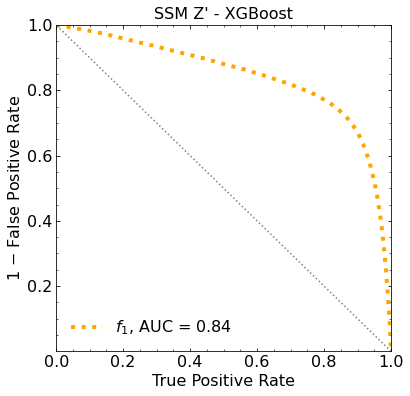


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68264	validation_1-logloss:0.68275
[1]	validation_0-logloss:0.67349	validation_1-logloss:0.67385
[2]	validation_0-logloss:0.66562	validation_1-logloss:0.66638
[3]	validation_0-logloss:0.65840	validation_1-logloss:0.65942
[4]	validation_0-logloss:0.65197	validation_1-logloss:0.65313
[5]	validation_0-logloss:0.64688	validation_1-logloss:0.64826
[6]	validation_0-logloss:0.64114	validation_1-logloss:0.64269
[7]	validation_0-logloss:0.63671	validation_1-logloss:0.63847
[8]	validation_0-logloss:0.63299	validation_1-logloss:0.63494
[9]	validation_0-logloss:0.62915	validation_1-logloss:0.63127
[10]	validation_0-logloss:0.62586	validation_1-logloss:0.62810
[11]	validation_0-logloss:0.62301	validation_1-logloss:0.62541
[12]	validation_0-logloss:0.62020	validation_1-logloss:0.62268
[13]	validation_0-logloss:0.61840	validation_1-logloss:0.62103
[14]	validation_0-logloss:0.61649	validation_1-logloss:0.61918
[15]	validation_0-logloss:0.61465	validation_1-logloss:0.61748
[1

[130]	validation_0-logloss:0.54283	validation_1-logloss:0.55097
[131]	validation_0-logloss:0.54259	validation_1-logloss:0.55076
[132]	validation_0-logloss:0.54247	validation_1-logloss:0.55067
[133]	validation_0-logloss:0.54233	validation_1-logloss:0.55055
[134]	validation_0-logloss:0.54214	validation_1-logloss:0.55039
[135]	validation_0-logloss:0.54197	validation_1-logloss:0.55027
[136]	validation_0-logloss:0.54178	validation_1-logloss:0.55011
[137]	validation_0-logloss:0.54162	validation_1-logloss:0.54997
[138]	validation_0-logloss:0.54150	validation_1-logloss:0.54989
[139]	validation_0-logloss:0.54126	validation_1-logloss:0.54968
[140]	validation_0-logloss:0.54088	validation_1-logloss:0.54934
[141]	validation_0-logloss:0.54025	validation_1-logloss:0.54873
[142]	validation_0-logloss:0.53980	validation_1-logloss:0.54830
[143]	validation_0-logloss:0.53963	validation_1-logloss:0.54815
[144]	validation_0-logloss:0.53940	validation_1-logloss:0.54795
[145]	validation_0-logloss:0.53927	valid

[259]	validation_0-logloss:0.51125	validation_1-logloss:0.52277
[260]	validation_0-logloss:0.51071	validation_1-logloss:0.52228
[261]	validation_0-logloss:0.51062	validation_1-logloss:0.52221
[262]	validation_0-logloss:0.51056	validation_1-logloss:0.52217
[263]	validation_0-logloss:0.51029	validation_1-logloss:0.52194
[264]	validation_0-logloss:0.51019	validation_1-logloss:0.52185
[265]	validation_0-logloss:0.50982	validation_1-logloss:0.52151
[266]	validation_0-logloss:0.50969	validation_1-logloss:0.52139
[267]	validation_0-logloss:0.50952	validation_1-logloss:0.52125
[268]	validation_0-logloss:0.50931	validation_1-logloss:0.52107
[269]	validation_0-logloss:0.50918	validation_1-logloss:0.52096
[270]	validation_0-logloss:0.50911	validation_1-logloss:0.52092
[271]	validation_0-logloss:0.50901	validation_1-logloss:0.52084
[272]	validation_0-logloss:0.50891	validation_1-logloss:0.52077
[273]	validation_0-logloss:0.50886	validation_1-logloss:0.52074
[274]	validation_0-logloss:0.50879	valid

[388]	validation_0-logloss:0.49723	validation_1-logloss:0.51196
[389]	validation_0-logloss:0.49714	validation_1-logloss:0.51190
[390]	validation_0-logloss:0.49709	validation_1-logloss:0.51188
[391]	validation_0-logloss:0.49705	validation_1-logloss:0.51186
[392]	validation_0-logloss:0.49700	validation_1-logloss:0.51184
[393]	validation_0-logloss:0.49688	validation_1-logloss:0.51172
[394]	validation_0-logloss:0.49682	validation_1-logloss:0.51168
[395]	validation_0-logloss:0.49662	validation_1-logloss:0.51151
[396]	validation_0-logloss:0.49656	validation_1-logloss:0.51148
[397]	validation_0-logloss:0.49646	validation_1-logloss:0.51139
[398]	validation_0-logloss:0.49629	validation_1-logloss:0.51124
[399]	validation_0-logloss:0.49622	validation_1-logloss:0.51119
[400]	validation_0-logloss:0.49618	validation_1-logloss:0.51117
[401]	validation_0-logloss:0.49616	validation_1-logloss:0.51118
[402]	validation_0-logloss:0.49613	validation_1-logloss:0.51117
[403]	validation_0-logloss:0.49609	valid

[517]	validation_0-logloss:0.48835	validation_1-logloss:0.50601
[518]	validation_0-logloss:0.48818	validation_1-logloss:0.50587
[519]	validation_0-logloss:0.48789	validation_1-logloss:0.50561
[520]	validation_0-logloss:0.48784	validation_1-logloss:0.50559
[521]	validation_0-logloss:0.48781	validation_1-logloss:0.50559
[522]	validation_0-logloss:0.48780	validation_1-logloss:0.50559
[523]	validation_0-logloss:0.48778	validation_1-logloss:0.50559
[524]	validation_0-logloss:0.48774	validation_1-logloss:0.50558
[525]	validation_0-logloss:0.48769	validation_1-logloss:0.50554
[526]	validation_0-logloss:0.48761	validation_1-logloss:0.50548
[527]	validation_0-logloss:0.48759	validation_1-logloss:0.50549
[528]	validation_0-logloss:0.48758	validation_1-logloss:0.50549
[529]	validation_0-logloss:0.48754	validation_1-logloss:0.50548
[530]	validation_0-logloss:0.48746	validation_1-logloss:0.50544
[531]	validation_0-logloss:0.48744	validation_1-logloss:0.50544
[532]	validation_0-logloss:0.48737	valid

[646]	validation_0-logloss:0.48001	validation_1-logloss:0.50083
[647]	validation_0-logloss:0.47999	validation_1-logloss:0.50083
[648]	validation_0-logloss:0.47992	validation_1-logloss:0.50079
[649]	validation_0-logloss:0.47989	validation_1-logloss:0.50077
[650]	validation_0-logloss:0.47985	validation_1-logloss:0.50076
[651]	validation_0-logloss:0.47980	validation_1-logloss:0.50074
[652]	validation_0-logloss:0.47976	validation_1-logloss:0.50073
[653]	validation_0-logloss:0.47974	validation_1-logloss:0.50072
[654]	validation_0-logloss:0.47968	validation_1-logloss:0.50070
[655]	validation_0-logloss:0.47966	validation_1-logloss:0.50069
[656]	validation_0-logloss:0.47963	validation_1-logloss:0.50069
[657]	validation_0-logloss:0.47956	validation_1-logloss:0.50064
[658]	validation_0-logloss:0.47953	validation_1-logloss:0.50064
[659]	validation_0-logloss:0.47950	validation_1-logloss:0.50062
[660]	validation_0-logloss:0.47947	validation_1-logloss:0.50062
[661]	validation_0-logloss:0.47943	valid

[775]	validation_0-logloss:0.47402	validation_1-logloss:0.49781
[776]	validation_0-logloss:0.47397	validation_1-logloss:0.49778
[777]	validation_0-logloss:0.47394	validation_1-logloss:0.49778
[778]	validation_0-logloss:0.47364	validation_1-logloss:0.49751
[779]	validation_0-logloss:0.47360	validation_1-logloss:0.49751
[780]	validation_0-logloss:0.47357	validation_1-logloss:0.49751
[781]	validation_0-logloss:0.47355	validation_1-logloss:0.49750
[782]	validation_0-logloss:0.47343	validation_1-logloss:0.49740
[783]	validation_0-logloss:0.47340	validation_1-logloss:0.49739
[784]	validation_0-logloss:0.47339	validation_1-logloss:0.49739
[785]	validation_0-logloss:0.47335	validation_1-logloss:0.49739
[786]	validation_0-logloss:0.47333	validation_1-logloss:0.49739
[787]	validation_0-logloss:0.47331	validation_1-logloss:0.49738
[788]	validation_0-logloss:0.47330	validation_1-logloss:0.49738
[789]	validation_0-logloss:0.47325	validation_1-logloss:0.49735
[790]	validation_0-logloss:0.47317	valid

[904]	validation_0-logloss:0.46752	validation_1-logloss:0.49430
[905]	validation_0-logloss:0.46749	validation_1-logloss:0.49429
[906]	validation_0-logloss:0.46747	validation_1-logloss:0.49429
[907]	validation_0-logloss:0.46744	validation_1-logloss:0.49429
[908]	validation_0-logloss:0.46739	validation_1-logloss:0.49426
[909]	validation_0-logloss:0.46736	validation_1-logloss:0.49427
[910]	validation_0-logloss:0.46720	validation_1-logloss:0.49413
[911]	validation_0-logloss:0.46718	validation_1-logloss:0.49413
[912]	validation_0-logloss:0.46715	validation_1-logloss:0.49413
[913]	validation_0-logloss:0.46714	validation_1-logloss:0.49413
[914]	validation_0-logloss:0.46712	validation_1-logloss:0.49413
[915]	validation_0-logloss:0.46710	validation_1-logloss:0.49413
[916]	validation_0-logloss:0.46708	validation_1-logloss:0.49413
[917]	validation_0-logloss:0.46706	validation_1-logloss:0.49413
[918]	validation_0-logloss:0.46701	validation_1-logloss:0.49410
[919]	validation_0-logloss:0.46677	valid

[1032]	validation_0-logloss:0.46090	validation_1-logloss:0.49069
[1033]	validation_0-logloss:0.46075	validation_1-logloss:0.49057
[1034]	validation_0-logloss:0.46073	validation_1-logloss:0.49057
[1035]	validation_0-logloss:0.46067	validation_1-logloss:0.49054
[1036]	validation_0-logloss:0.46058	validation_1-logloss:0.49045
[1037]	validation_0-logloss:0.46057	validation_1-logloss:0.49045
[1038]	validation_0-logloss:0.46050	validation_1-logloss:0.49041
[1039]	validation_0-logloss:0.46049	validation_1-logloss:0.49041
[1040]	validation_0-logloss:0.46047	validation_1-logloss:0.49041
[1041]	validation_0-logloss:0.46044	validation_1-logloss:0.49040
[1042]	validation_0-logloss:0.46042	validation_1-logloss:0.49040
[1043]	validation_0-logloss:0.46030	validation_1-logloss:0.49030
[1044]	validation_0-logloss:0.46023	validation_1-logloss:0.49025
[1045]	validation_0-logloss:0.46021	validation_1-logloss:0.49026
[1046]	validation_0-logloss:0.46019	validation_1-logloss:0.49026
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45608	validation_1-logloss:0.48866
[1160]	validation_0-logloss:0.45599	validation_1-logloss:0.48860
[1161]	validation_0-logloss:0.45594	validation_1-logloss:0.48857
[1162]	validation_0-logloss:0.45591	validation_1-logloss:0.48856
[1163]	validation_0-logloss:0.45588	validation_1-logloss:0.48856
[1164]	validation_0-logloss:0.45587	validation_1-logloss:0.48855
[1165]	validation_0-logloss:0.45586	validation_1-logloss:0.48855
[1166]	validation_0-logloss:0.45584	validation_1-logloss:0.48855
[1167]	validation_0-logloss:0.45582	validation_1-logloss:0.48855
[1168]	validation_0-logloss:0.45581	validation_1-logloss:0.48855
[1169]	validation_0-logloss:0.45579	validation_1-logloss:0.48855
[1170]	validation_0-logloss:0.45576	validation_1-logloss:0.48854
[1171]	validation_0-logloss:0.45573	validation_1-logloss:0.48854
[1172]	validation_0-logloss:0.45571	validation_1-logloss:0.48854
[1173]	validation_0-logloss:0.45569	validation_1-logloss:0.48853
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45260	validation_1-logloss:0.48785
[1287]	validation_0-logloss:0.45256	validation_1-logloss:0.48783
[1288]	validation_0-logloss:0.45255	validation_1-logloss:0.48783
[1289]	validation_0-logloss:0.45249	validation_1-logloss:0.48781
[1290]	validation_0-logloss:0.45243	validation_1-logloss:0.48778
[1291]	validation_0-logloss:0.45242	validation_1-logloss:0.48778
[1292]	validation_0-logloss:0.45240	validation_1-logloss:0.48778
[1293]	validation_0-logloss:0.45236	validation_1-logloss:0.48776
[1294]	validation_0-logloss:0.45232	validation_1-logloss:0.48776
[1295]	validation_0-logloss:0.45230	validation_1-logloss:0.48776
[1296]	validation_0-logloss:0.45227	validation_1-logloss:0.48777
[1297]	validation_0-logloss:0.45224	validation_1-logloss:0.48777
[1298]	validation_0-logloss:0.45222	validation_1-logloss:0.48778
[1299]	validation_0-logloss:0.45218	validation_1-logloss:0.48776
[1300]	validation_0-logloss:0.45217	validation_1-logloss:0.48777
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44845	validation_1-logloss:0.48675
[1414]	validation_0-logloss:0.44842	validation_1-logloss:0.48675
[1415]	validation_0-logloss:0.44840	validation_1-logloss:0.48675
[1416]	validation_0-logloss:0.44837	validation_1-logloss:0.48675
[1417]	validation_0-logloss:0.44834	validation_1-logloss:0.48676
[1418]	validation_0-logloss:0.44831	validation_1-logloss:0.48675
[1419]	validation_0-logloss:0.44828	validation_1-logloss:0.48676
[1420]	validation_0-logloss:0.44825	validation_1-logloss:0.48676
[1421]	validation_0-logloss:0.44823	validation_1-logloss:0.48675
[1422]	validation_0-logloss:0.44822	validation_1-logloss:0.48676
[1423]	validation_0-logloss:0.44820	validation_1-logloss:0.48676
[1424]	validation_0-logloss:0.44819	validation_1-logloss:0.48676
[1425]	validation_0-logloss:0.44816	validation_1-logloss:0.48677
[1426]	validation_0-logloss:0.44813	validation_1-logloss:0.48675
[1427]	validation_0-logloss:0.44812	validation_1-logloss:0.48675
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44481	validation_1-logloss:0.48581
[1541]	validation_0-logloss:0.44479	validation_1-logloss:0.48581
[1542]	validation_0-logloss:0.44478	validation_1-logloss:0.48580
[1543]	validation_0-logloss:0.44476	validation_1-logloss:0.48580
[1544]	validation_0-logloss:0.44473	validation_1-logloss:0.48580
[1545]	validation_0-logloss:0.44470	validation_1-logloss:0.48579
[1546]	validation_0-logloss:0.44467	validation_1-logloss:0.48576
[1547]	validation_0-logloss:0.44461	validation_1-logloss:0.48572
[1548]	validation_0-logloss:0.44459	validation_1-logloss:0.48572
[1549]	validation_0-logloss:0.44452	validation_1-logloss:0.48567
[1550]	validation_0-logloss:0.44450	validation_1-logloss:0.48566
[1551]	validation_0-logloss:0.44448	validation_1-logloss:0.48567
[1552]	validation_0-logloss:0.44446	validation_1-logloss:0.48567
[1553]	validation_0-logloss:0.44439	validation_1-logloss:0.48564
[1554]	validation_0-logloss:0.44438	validation_1-logloss:0.48564
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44138	validation_1-logloss:0.48516
[1668]	validation_0-logloss:0.44136	validation_1-logloss:0.48517
[1669]	validation_0-logloss:0.44133	validation_1-logloss:0.48517
[1670]	validation_0-logloss:0.44131	validation_1-logloss:0.48517
[1671]	validation_0-logloss:0.44130	validation_1-logloss:0.48517
[1672]	validation_0-logloss:0.44128	validation_1-logloss:0.48517
[1673]	validation_0-logloss:0.44123	validation_1-logloss:0.48516
[1674]	validation_0-logloss:0.44118	validation_1-logloss:0.48515
[1675]	validation_0-logloss:0.44114	validation_1-logloss:0.48513
[1676]	validation_0-logloss:0.44112	validation_1-logloss:0.48513
[1677]	validation_0-logloss:0.44110	validation_1-logloss:0.48513
[1678]	validation_0-logloss:0.44108	validation_1-logloss:0.48513
[1679]	validation_0-logloss:0.44106	validation_1-logloss:0.48513
[1680]	validation_0-logloss:0.44105	validation_1-logloss:0.48513
[1681]	validation_0-logloss:0.44101	validation_1-logloss:0.48512
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43831	validation_1-logloss:0.48477
[1795]	validation_0-logloss:0.43829	validation_1-logloss:0.48477
[1796]	validation_0-logloss:0.43827	validation_1-logloss:0.48477
[1797]	validation_0-logloss:0.43826	validation_1-logloss:0.48477
[1798]	validation_0-logloss:0.43821	validation_1-logloss:0.48474
[1799]	validation_0-logloss:0.43820	validation_1-logloss:0.48475
[1800]	validation_0-logloss:0.43818	validation_1-logloss:0.48475
[1801]	validation_0-logloss:0.43817	validation_1-logloss:0.48475
[1802]	validation_0-logloss:0.43816	validation_1-logloss:0.48476
[1803]	validation_0-logloss:0.43813	validation_1-logloss:0.48474
[1804]	validation_0-logloss:0.43811	validation_1-logloss:0.48475
[1805]	validation_0-logloss:0.43810	validation_1-logloss:0.48475
[1806]	validation_0-logloss:0.43806	validation_1-logloss:0.48474
[1807]	validation_0-logloss:0.43805	validation_1-logloss:0.48475
[1808]	validation_0-logloss:0.43803	validation_1-logloss:0.48475
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43531	validation_1-logloss:0.48453
[1922]	validation_0-logloss:0.43529	validation_1-logloss:0.48454
[1923]	validation_0-logloss:0.43528	validation_1-logloss:0.48454
[1924]	validation_0-logloss:0.43528	validation_1-logloss:0.48454
[1925]	validation_0-logloss:0.43525	validation_1-logloss:0.48454
[1926]	validation_0-logloss:0.43523	validation_1-logloss:0.48455
[1927]	validation_0-logloss:0.43522	validation_1-logloss:0.48455
[1928]	validation_0-logloss:0.43520	validation_1-logloss:0.48456
[1929]	validation_0-logloss:0.43519	validation_1-logloss:0.48456
[1930]	validation_0-logloss:0.43516	validation_1-logloss:0.48457
[1931]	validation_0-logloss:0.43515	validation_1-logloss:0.48457
[1932]	validation_0-logloss:0.43511	validation_1-logloss:0.48457
[1933]	validation_0-logloss:0.43507	validation_1-logloss:0.48455
[1934]	validation_0-logloss:0.43503	validation_1-logloss:0.48454
[1935]	validation_0-logloss:0.43499	validation_1-logloss:0.48453
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43195	validation_1-logloss:0.48403
[2049]	validation_0-logloss:0.43193	validation_1-logloss:0.48404
[2050]	validation_0-logloss:0.43190	validation_1-logloss:0.48404
[2051]	validation_0-logloss:0.43190	validation_1-logloss:0.48404
[2052]	validation_0-logloss:0.43186	validation_1-logloss:0.48403
[2053]	validation_0-logloss:0.43183	validation_1-logloss:0.48402
[2054]	validation_0-logloss:0.43180	validation_1-logloss:0.48401
[2055]	validation_0-logloss:0.43178	validation_1-logloss:0.48401
[2056]	validation_0-logloss:0.43175	validation_1-logloss:0.48399
[2057]	validation_0-logloss:0.43170	validation_1-logloss:0.48397
[2058]	validation_0-logloss:0.43170	validation_1-logloss:0.48397
[2059]	validation_0-logloss:0.43168	validation_1-logloss:0.48397
[2060]	validation_0-logloss:0.43163	validation_1-logloss:0.48395
[2061]	validation_0-logloss:0.43160	validation_1-logloss:0.48394
[2062]	validation_0-logloss:0.43156	validation_1-logloss:0.48393
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42876	validation_1-logloss:0.48353
[2176]	validation_0-logloss:0.42872	validation_1-logloss:0.48352
[2177]	validation_0-logloss:0.42868	validation_1-logloss:0.48352
[2178]	validation_0-logloss:0.42864	validation_1-logloss:0.48352
[2179]	validation_0-logloss:0.42863	validation_1-logloss:0.48352
[2180]	validation_0-logloss:0.42861	validation_1-logloss:0.48353
[2181]	validation_0-logloss:0.42858	validation_1-logloss:0.48353
[2182]	validation_0-logloss:0.42857	validation_1-logloss:0.48353
[2183]	validation_0-logloss:0.42854	validation_1-logloss:0.48353
[2184]	validation_0-logloss:0.42852	validation_1-logloss:0.48354
[2185]	validation_0-logloss:0.42849	validation_1-logloss:0.48355
[2186]	validation_0-logloss:0.42842	validation_1-logloss:0.48351
[2187]	validation_0-logloss:0.42840	validation_1-logloss:0.48352
[2188]	validation_0-logloss:0.42836	validation_1-logloss:0.48352
[2189]	validation_0-logloss:0.42833	validation_1-logloss:0.48352
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.42547	validation_1-logloss:0.48313
[2303]	validation_0-logloss:0.42543	validation_1-logloss:0.48310
[2304]	validation_0-logloss:0.42541	validation_1-logloss:0.48311
[2305]	validation_0-logloss:0.42540	validation_1-logloss:0.48310
[2306]	validation_0-logloss:0.42537	validation_1-logloss:0.48310
[2307]	validation_0-logloss:0.42536	validation_1-logloss:0.48310
[2308]	validation_0-logloss:0.42533	validation_1-logloss:0.48308
[2309]	validation_0-logloss:0.42531	validation_1-logloss:0.48308
[2310]	validation_0-logloss:0.42530	validation_1-logloss:0.48308
[2311]	validation_0-logloss:0.42529	validation_1-logloss:0.48309
[2312]	validation_0-logloss:0.42526	validation_1-logloss:0.48307
[2313]	validation_0-logloss:0.42524	validation_1-logloss:0.48307
[2314]	validation_0-logloss:0.42523	validation_1-logloss:0.48307
[2315]	validation_0-logloss:0.42522	validation_1-logloss:0.48308
[2316]	validation_0-logloss:0.42520	validation_1-logloss:0.48308
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.42262	validation_1-logloss:0.48281


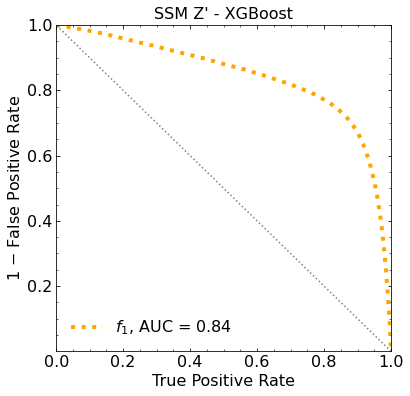


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68251	validation_1-logloss:0.68288
[1]	validation_0-logloss:0.67356	validation_1-logloss:0.67400
[2]	validation_0-logloss:0.66596	validation_1-logloss:0.66659
[3]	validation_0-logloss:0.65965	validation_1-logloss:0.66041
[4]	validation_0-logloss:0.65361	validation_1-logloss:0.65454
[5]	validation_0-logloss:0.64719	validation_1-logloss:0.64840
[6]	validation_0-logloss:0.64242	validation_1-logloss:0.64377
[7]	validation_0-logloss:0.63818	validation_1-logloss:0.63965
[8]	validation_0-logloss:0.63384	validation_1-logloss:0.63553
[9]	validation_0-logloss:0.63046	validation_1-logloss:0.63223
[10]	validation_0-logloss:0.62755	validation_1-logloss:0.62945
[11]	validation_0-logloss:0.62499	validation_1-logloss:0.62701
[12]	validation_0-logloss:0.62228	validation_1-logloss:0.62441
[13]	validation_0-logloss:0.62027	validation_1-logloss:0.62251
[14]	validation_0-logloss:0.61809	validation_1-logloss:0.62037
[15]	validation_0-logloss:0.61618	validation_1-logloss:0.61859
[1

[130]	validation_0-logloss:0.54011	validation_1-logloss:0.54795
[131]	validation_0-logloss:0.53956	validation_1-logloss:0.54744
[132]	validation_0-logloss:0.53870	validation_1-logloss:0.54665
[133]	validation_0-logloss:0.53827	validation_1-logloss:0.54622
[134]	validation_0-logloss:0.53784	validation_1-logloss:0.54582
[135]	validation_0-logloss:0.53751	validation_1-logloss:0.54551
[136]	validation_0-logloss:0.53738	validation_1-logloss:0.54540
[137]	validation_0-logloss:0.53721	validation_1-logloss:0.54526
[138]	validation_0-logloss:0.53674	validation_1-logloss:0.54482
[139]	validation_0-logloss:0.53641	validation_1-logloss:0.54451
[140]	validation_0-logloss:0.53619	validation_1-logloss:0.54432
[141]	validation_0-logloss:0.53581	validation_1-logloss:0.54397
[142]	validation_0-logloss:0.53490	validation_1-logloss:0.54309
[143]	validation_0-logloss:0.53421	validation_1-logloss:0.54243
[144]	validation_0-logloss:0.53384	validation_1-logloss:0.54210
[145]	validation_0-logloss:0.53370	valid

[259]	validation_0-logloss:0.51106	validation_1-logloss:0.52223
[260]	validation_0-logloss:0.51099	validation_1-logloss:0.52219
[261]	validation_0-logloss:0.51092	validation_1-logloss:0.52215
[262]	validation_0-logloss:0.51087	validation_1-logloss:0.52212
[263]	validation_0-logloss:0.51079	validation_1-logloss:0.52206
[264]	validation_0-logloss:0.51071	validation_1-logloss:0.52201
[265]	validation_0-logloss:0.51055	validation_1-logloss:0.52187
[266]	validation_0-logloss:0.51047	validation_1-logloss:0.52180
[267]	validation_0-logloss:0.51043	validation_1-logloss:0.52178
[268]	validation_0-logloss:0.51034	validation_1-logloss:0.52170
[269]	validation_0-logloss:0.51028	validation_1-logloss:0.52167
[270]	validation_0-logloss:0.51023	validation_1-logloss:0.52163
[271]	validation_0-logloss:0.50993	validation_1-logloss:0.52138
[272]	validation_0-logloss:0.50972	validation_1-logloss:0.52121
[273]	validation_0-logloss:0.50956	validation_1-logloss:0.52107
[274]	validation_0-logloss:0.50952	valid

[388]	validation_0-logloss:0.49772	validation_1-logloss:0.51192
[389]	validation_0-logloss:0.49765	validation_1-logloss:0.51186
[390]	validation_0-logloss:0.49761	validation_1-logloss:0.51183
[391]	validation_0-logloss:0.49757	validation_1-logloss:0.51181
[392]	validation_0-logloss:0.49739	validation_1-logloss:0.51167
[393]	validation_0-logloss:0.49734	validation_1-logloss:0.51164
[394]	validation_0-logloss:0.49723	validation_1-logloss:0.51156
[395]	validation_0-logloss:0.49717	validation_1-logloss:0.51154
[396]	validation_0-logloss:0.49708	validation_1-logloss:0.51146
[397]	validation_0-logloss:0.49702	validation_1-logloss:0.51144
[398]	validation_0-logloss:0.49699	validation_1-logloss:0.51142
[399]	validation_0-logloss:0.49697	validation_1-logloss:0.51142
[400]	validation_0-logloss:0.49696	validation_1-logloss:0.51142
[401]	validation_0-logloss:0.49692	validation_1-logloss:0.51139
[402]	validation_0-logloss:0.49675	validation_1-logloss:0.51126
[403]	validation_0-logloss:0.49669	valid

[517]	validation_0-logloss:0.48726	validation_1-logloss:0.50455
[518]	validation_0-logloss:0.48724	validation_1-logloss:0.50454
[519]	validation_0-logloss:0.48719	validation_1-logloss:0.50454
[520]	validation_0-logloss:0.48712	validation_1-logloss:0.50450
[521]	validation_0-logloss:0.48709	validation_1-logloss:0.50450
[522]	validation_0-logloss:0.48706	validation_1-logloss:0.50449
[523]	validation_0-logloss:0.48703	validation_1-logloss:0.50448
[524]	validation_0-logloss:0.48699	validation_1-logloss:0.50448
[525]	validation_0-logloss:0.48697	validation_1-logloss:0.50447
[526]	validation_0-logloss:0.48693	validation_1-logloss:0.50446
[527]	validation_0-logloss:0.48690	validation_1-logloss:0.50445
[528]	validation_0-logloss:0.48680	validation_1-logloss:0.50438
[529]	validation_0-logloss:0.48671	validation_1-logloss:0.50431
[530]	validation_0-logloss:0.48660	validation_1-logloss:0.50422
[531]	validation_0-logloss:0.48653	validation_1-logloss:0.50417
[532]	validation_0-logloss:0.48652	valid

[646]	validation_0-logloss:0.48124	validation_1-logloss:0.50126
[647]	validation_0-logloss:0.48112	validation_1-logloss:0.50114
[648]	validation_0-logloss:0.48111	validation_1-logloss:0.50115
[649]	validation_0-logloss:0.48109	validation_1-logloss:0.50115
[650]	validation_0-logloss:0.48106	validation_1-logloss:0.50115
[651]	validation_0-logloss:0.48101	validation_1-logloss:0.50111
[652]	validation_0-logloss:0.48099	validation_1-logloss:0.50111
[653]	validation_0-logloss:0.48097	validation_1-logloss:0.50112
[654]	validation_0-logloss:0.48094	validation_1-logloss:0.50112
[655]	validation_0-logloss:0.48091	validation_1-logloss:0.50112
[656]	validation_0-logloss:0.48089	validation_1-logloss:0.50112
[657]	validation_0-logloss:0.48085	validation_1-logloss:0.50109
[658]	validation_0-logloss:0.48081	validation_1-logloss:0.50106
[659]	validation_0-logloss:0.48078	validation_1-logloss:0.50105
[660]	validation_0-logloss:0.48075	validation_1-logloss:0.50105
[661]	validation_0-logloss:0.48071	valid

[775]	validation_0-logloss:0.47542	validation_1-logloss:0.49825
[776]	validation_0-logloss:0.47535	validation_1-logloss:0.49820
[777]	validation_0-logloss:0.47498	validation_1-logloss:0.49783
[778]	validation_0-logloss:0.47496	validation_1-logloss:0.49783
[779]	validation_0-logloss:0.47462	validation_1-logloss:0.49751
[780]	validation_0-logloss:0.47457	validation_1-logloss:0.49752
[781]	validation_0-logloss:0.47454	validation_1-logloss:0.49751
[782]	validation_0-logloss:0.47437	validation_1-logloss:0.49741
[783]	validation_0-logloss:0.47408	validation_1-logloss:0.49715
[784]	validation_0-logloss:0.47403	validation_1-logloss:0.49713
[785]	validation_0-logloss:0.47401	validation_1-logloss:0.49713
[786]	validation_0-logloss:0.47398	validation_1-logloss:0.49713
[787]	validation_0-logloss:0.47397	validation_1-logloss:0.49714
[788]	validation_0-logloss:0.47388	validation_1-logloss:0.49706
[789]	validation_0-logloss:0.47385	validation_1-logloss:0.49707
[790]	validation_0-logloss:0.47380	valid

[904]	validation_0-logloss:0.46837	validation_1-logloss:0.49429
[905]	validation_0-logloss:0.46831	validation_1-logloss:0.49425
[906]	validation_0-logloss:0.46827	validation_1-logloss:0.49425
[907]	validation_0-logloss:0.46825	validation_1-logloss:0.49424
[908]	validation_0-logloss:0.46824	validation_1-logloss:0.49425
[909]	validation_0-logloss:0.46814	validation_1-logloss:0.49416
[910]	validation_0-logloss:0.46806	validation_1-logloss:0.49409
[911]	validation_0-logloss:0.46804	validation_1-logloss:0.49409
[912]	validation_0-logloss:0.46802	validation_1-logloss:0.49410
[913]	validation_0-logloss:0.46797	validation_1-logloss:0.49408
[914]	validation_0-logloss:0.46795	validation_1-logloss:0.49407
[915]	validation_0-logloss:0.46794	validation_1-logloss:0.49408
[916]	validation_0-logloss:0.46791	validation_1-logloss:0.49407
[917]	validation_0-logloss:0.46788	validation_1-logloss:0.49406
[918]	validation_0-logloss:0.46769	validation_1-logloss:0.49390
[919]	validation_0-logloss:0.46765	valid

[1032]	validation_0-logloss:0.46291	validation_1-logloss:0.49169
[1033]	validation_0-logloss:0.46287	validation_1-logloss:0.49168
[1034]	validation_0-logloss:0.46285	validation_1-logloss:0.49169
[1035]	validation_0-logloss:0.46282	validation_1-logloss:0.49169
[1036]	validation_0-logloss:0.46277	validation_1-logloss:0.49164
[1037]	validation_0-logloss:0.46274	validation_1-logloss:0.49164
[1038]	validation_0-logloss:0.46270	validation_1-logloss:0.49163
[1039]	validation_0-logloss:0.46266	validation_1-logloss:0.49161
[1040]	validation_0-logloss:0.46263	validation_1-logloss:0.49160
[1041]	validation_0-logloss:0.46260	validation_1-logloss:0.49159
[1042]	validation_0-logloss:0.46258	validation_1-logloss:0.49158
[1043]	validation_0-logloss:0.46255	validation_1-logloss:0.49158
[1044]	validation_0-logloss:0.46242	validation_1-logloss:0.49148
[1045]	validation_0-logloss:0.46239	validation_1-logloss:0.49147
[1046]	validation_0-logloss:0.46233	validation_1-logloss:0.49143
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.45838	validation_1-logloss:0.48994
[1160]	validation_0-logloss:0.45836	validation_1-logloss:0.48994
[1161]	validation_0-logloss:0.45833	validation_1-logloss:0.48995
[1162]	validation_0-logloss:0.45832	validation_1-logloss:0.48994
[1163]	validation_0-logloss:0.45830	validation_1-logloss:0.48994
[1164]	validation_0-logloss:0.45827	validation_1-logloss:0.48994
[1165]	validation_0-logloss:0.45826	validation_1-logloss:0.48994
[1166]	validation_0-logloss:0.45824	validation_1-logloss:0.48994
[1167]	validation_0-logloss:0.45820	validation_1-logloss:0.48993
[1168]	validation_0-logloss:0.45817	validation_1-logloss:0.48993
[1169]	validation_0-logloss:0.45813	validation_1-logloss:0.48993
[1170]	validation_0-logloss:0.45808	validation_1-logloss:0.48991
[1171]	validation_0-logloss:0.45805	validation_1-logloss:0.48991
[1172]	validation_0-logloss:0.45805	validation_1-logloss:0.48991
[1173]	validation_0-logloss:0.45802	validation_1-logloss:0.48992
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.45350	validation_1-logloss:0.48786
[1287]	validation_0-logloss:0.45342	validation_1-logloss:0.48780
[1288]	validation_0-logloss:0.45338	validation_1-logloss:0.48780
[1289]	validation_0-logloss:0.45328	validation_1-logloss:0.48774
[1290]	validation_0-logloss:0.45327	validation_1-logloss:0.48774
[1291]	validation_0-logloss:0.45323	validation_1-logloss:0.48772
[1292]	validation_0-logloss:0.45321	validation_1-logloss:0.48773
[1293]	validation_0-logloss:0.45319	validation_1-logloss:0.48773
[1294]	validation_0-logloss:0.45318	validation_1-logloss:0.48773
[1295]	validation_0-logloss:0.45310	validation_1-logloss:0.48767
[1296]	validation_0-logloss:0.45303	validation_1-logloss:0.48763
[1297]	validation_0-logloss:0.45298	validation_1-logloss:0.48759
[1298]	validation_0-logloss:0.45297	validation_1-logloss:0.48760
[1299]	validation_0-logloss:0.45288	validation_1-logloss:0.48756
[1300]	validation_0-logloss:0.45285	validation_1-logloss:0.48755
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.44930	validation_1-logloss:0.48642
[1414]	validation_0-logloss:0.44928	validation_1-logloss:0.48642
[1415]	validation_0-logloss:0.44927	validation_1-logloss:0.48643
[1416]	validation_0-logloss:0.44925	validation_1-logloss:0.48642
[1417]	validation_0-logloss:0.44923	validation_1-logloss:0.48642
[1418]	validation_0-logloss:0.44921	validation_1-logloss:0.48643
[1419]	validation_0-logloss:0.44920	validation_1-logloss:0.48643
[1420]	validation_0-logloss:0.44915	validation_1-logloss:0.48640
[1421]	validation_0-logloss:0.44910	validation_1-logloss:0.48639
[1422]	validation_0-logloss:0.44909	validation_1-logloss:0.48639
[1423]	validation_0-logloss:0.44906	validation_1-logloss:0.48639
[1424]	validation_0-logloss:0.44899	validation_1-logloss:0.48636
[1425]	validation_0-logloss:0.44898	validation_1-logloss:0.48636
[1426]	validation_0-logloss:0.44894	validation_1-logloss:0.48635
[1427]	validation_0-logloss:0.44893	validation_1-logloss:0.48635
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.44563	validation_1-logloss:0.48553
[1541]	validation_0-logloss:0.44561	validation_1-logloss:0.48554
[1542]	validation_0-logloss:0.44559	validation_1-logloss:0.48555
[1543]	validation_0-logloss:0.44558	validation_1-logloss:0.48555
[1544]	validation_0-logloss:0.44556	validation_1-logloss:0.48555
[1545]	validation_0-logloss:0.44553	validation_1-logloss:0.48554
[1546]	validation_0-logloss:0.44550	validation_1-logloss:0.48554
[1547]	validation_0-logloss:0.44548	validation_1-logloss:0.48554
[1548]	validation_0-logloss:0.44545	validation_1-logloss:0.48554
[1549]	validation_0-logloss:0.44538	validation_1-logloss:0.48550
[1550]	validation_0-logloss:0.44536	validation_1-logloss:0.48550
[1551]	validation_0-logloss:0.44533	validation_1-logloss:0.48550
[1552]	validation_0-logloss:0.44532	validation_1-logloss:0.48550
[1553]	validation_0-logloss:0.44525	validation_1-logloss:0.48547
[1554]	validation_0-logloss:0.44523	validation_1-logloss:0.48546
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.44152	validation_1-logloss:0.48437
[1668]	validation_0-logloss:0.44150	validation_1-logloss:0.48437
[1669]	validation_0-logloss:0.44147	validation_1-logloss:0.48437
[1670]	validation_0-logloss:0.44145	validation_1-logloss:0.48437
[1671]	validation_0-logloss:0.44140	validation_1-logloss:0.48435
[1672]	validation_0-logloss:0.44139	validation_1-logloss:0.48436
[1673]	validation_0-logloss:0.44137	validation_1-logloss:0.48436
[1674]	validation_0-logloss:0.44134	validation_1-logloss:0.48437
[1675]	validation_0-logloss:0.44132	validation_1-logloss:0.48437
[1676]	validation_0-logloss:0.44129	validation_1-logloss:0.48437
[1677]	validation_0-logloss:0.44126	validation_1-logloss:0.48436
[1678]	validation_0-logloss:0.44126	validation_1-logloss:0.48436
[1679]	validation_0-logloss:0.44124	validation_1-logloss:0.48436
[1680]	validation_0-logloss:0.44123	validation_1-logloss:0.48436
[1681]	validation_0-logloss:0.44121	validation_1-logloss:0.48436
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.43835	validation_1-logloss:0.48393
[1795]	validation_0-logloss:0.43834	validation_1-logloss:0.48393
[1796]	validation_0-logloss:0.43831	validation_1-logloss:0.48394
[1797]	validation_0-logloss:0.43830	validation_1-logloss:0.48394
[1798]	validation_0-logloss:0.43828	validation_1-logloss:0.48394
[1799]	validation_0-logloss:0.43827	validation_1-logloss:0.48395
[1800]	validation_0-logloss:0.43826	validation_1-logloss:0.48395
[1801]	validation_0-logloss:0.43825	validation_1-logloss:0.48395
[1802]	validation_0-logloss:0.43822	validation_1-logloss:0.48394
[1803]	validation_0-logloss:0.43815	validation_1-logloss:0.48392
[1804]	validation_0-logloss:0.43814	validation_1-logloss:0.48392
[1805]	validation_0-logloss:0.43812	validation_1-logloss:0.48392
[1806]	validation_0-logloss:0.43809	validation_1-logloss:0.48391
[1807]	validation_0-logloss:0.43807	validation_1-logloss:0.48390
[1808]	validation_0-logloss:0.43804	validation_1-logloss:0.48391
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.43498	validation_1-logloss:0.48335
[1922]	validation_0-logloss:0.43496	validation_1-logloss:0.48335
[1923]	validation_0-logloss:0.43493	validation_1-logloss:0.48335
[1924]	validation_0-logloss:0.43491	validation_1-logloss:0.48336
[1925]	validation_0-logloss:0.43489	validation_1-logloss:0.48337
[1926]	validation_0-logloss:0.43487	validation_1-logloss:0.48337
[1927]	validation_0-logloss:0.43483	validation_1-logloss:0.48336
[1928]	validation_0-logloss:0.43480	validation_1-logloss:0.48336
[1929]	validation_0-logloss:0.43477	validation_1-logloss:0.48337
[1930]	validation_0-logloss:0.43472	validation_1-logloss:0.48334
[1931]	validation_0-logloss:0.43471	validation_1-logloss:0.48334
[1932]	validation_0-logloss:0.43466	validation_1-logloss:0.48331
[1933]	validation_0-logloss:0.43462	validation_1-logloss:0.48328
[1934]	validation_0-logloss:0.43460	validation_1-logloss:0.48329
[1935]	validation_0-logloss:0.43458	validation_1-logloss:0.48328
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.43144	validation_1-logloss:0.48252
[2049]	validation_0-logloss:0.43143	validation_1-logloss:0.48252
[2050]	validation_0-logloss:0.43142	validation_1-logloss:0.48252
[2051]	validation_0-logloss:0.43140	validation_1-logloss:0.48251
[2052]	validation_0-logloss:0.43139	validation_1-logloss:0.48251
[2053]	validation_0-logloss:0.43136	validation_1-logloss:0.48252
[2054]	validation_0-logloss:0.43135	validation_1-logloss:0.48252
[2055]	validation_0-logloss:0.43131	validation_1-logloss:0.48249
[2056]	validation_0-logloss:0.43129	validation_1-logloss:0.48249
[2057]	validation_0-logloss:0.43126	validation_1-logloss:0.48250
[2058]	validation_0-logloss:0.43124	validation_1-logloss:0.48250
[2059]	validation_0-logloss:0.43122	validation_1-logloss:0.48250
[2060]	validation_0-logloss:0.43119	validation_1-logloss:0.48250
[2061]	validation_0-logloss:0.43118	validation_1-logloss:0.48250
[2062]	validation_0-logloss:0.43115	validation_1-logloss:0.48249
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.42880	validation_1-logloss:0.48245
[2176]	validation_0-logloss:0.42877	validation_1-logloss:0.48243
[2177]	validation_0-logloss:0.42876	validation_1-logloss:0.48243
[2178]	validation_0-logloss:0.42876	validation_1-logloss:0.48243
[2179]	validation_0-logloss:0.42873	validation_1-logloss:0.48242
[2180]	validation_0-logloss:0.42871	validation_1-logloss:0.48242
[2181]	validation_0-logloss:0.42869	validation_1-logloss:0.48241
[2182]	validation_0-logloss:0.42866	validation_1-logloss:0.48241
[2183]	validation_0-logloss:0.42863	validation_1-logloss:0.48240
[2184]	validation_0-logloss:0.42863	validation_1-logloss:0.48240
[2185]	validation_0-logloss:0.42862	validation_1-logloss:0.48241
[2186]	validation_0-logloss:0.42860	validation_1-logloss:0.48241
[2187]	validation_0-logloss:0.42857	validation_1-logloss:0.48240
[2188]	validation_0-logloss:0.42854	validation_1-logloss:0.48240
[2189]	validation_0-logloss:0.42853	validation_1-logloss:0.48240
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.42584	validation_1-logloss:0.48194
[2303]	validation_0-logloss:0.42579	validation_1-logloss:0.48191
[2304]	validation_0-logloss:0.42578	validation_1-logloss:0.48191
[2305]	validation_0-logloss:0.42576	validation_1-logloss:0.48192
[2306]	validation_0-logloss:0.42575	validation_1-logloss:0.48193
[2307]	validation_0-logloss:0.42573	validation_1-logloss:0.48193
[2308]	validation_0-logloss:0.42571	validation_1-logloss:0.48192
[2309]	validation_0-logloss:0.42568	validation_1-logloss:0.48191
[2310]	validation_0-logloss:0.42567	validation_1-logloss:0.48192
[2311]	validation_0-logloss:0.42566	validation_1-logloss:0.48192
[2312]	validation_0-logloss:0.42564	validation_1-logloss:0.48192
[2313]	validation_0-logloss:0.42561	validation_1-logloss:0.48192
[2314]	validation_0-logloss:0.42559	validation_1-logloss:0.48192
[2315]	validation_0-logloss:0.42557	validation_1-logloss:0.48192
[2316]	validation_0-logloss:0.42553	validation_1-logloss:0.48191
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.42273	validation_1-logloss:0.48153
[2430]	validation_0-logloss:0.42269	validation_1-logloss:0.48152
[2431]	validation_0-logloss:0.42266	validation_1-logloss:0.48151
[2432]	validation_0-logloss:0.42265	validation_1-logloss:0.48152
[2433]	validation_0-logloss:0.42262	validation_1-logloss:0.48152
[2434]	validation_0-logloss:0.42261	validation_1-logloss:0.48152
[2435]	validation_0-logloss:0.42259	validation_1-logloss:0.48152
[2436]	validation_0-logloss:0.42258	validation_1-logloss:0.48152
[2437]	validation_0-logloss:0.42255	validation_1-logloss:0.48153
[2438]	validation_0-logloss:0.42253	validation_1-logloss:0.48153
[2439]	validation_0-logloss:0.42252	validation_1-logloss:0.48153
[2440]	validation_0-logloss:0.42250	validation_1-logloss:0.48153
[2441]	validation_0-logloss:0.42249	validation_1-logloss:0.48153
[2442]	validation_0-logloss:0.42245	validation_1-logloss:0.48150
[2443]	validation_0-logloss:0.42245	validation_1-logloss:0.48150
[2444]	validation_0-loglo

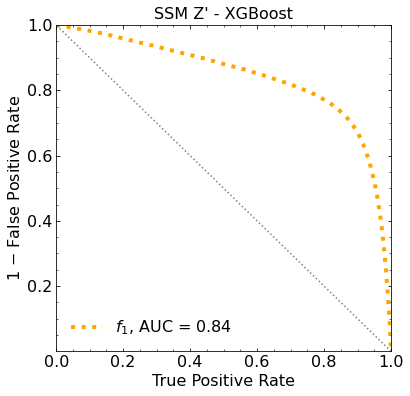


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


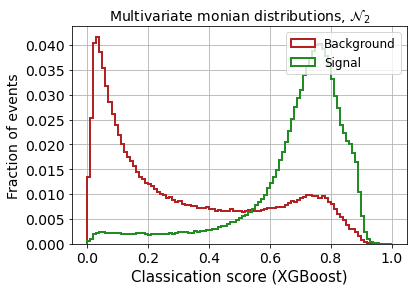

Classification score (10ML):


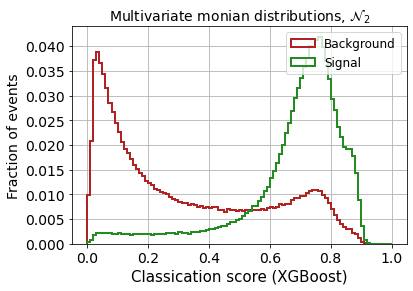

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [4]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


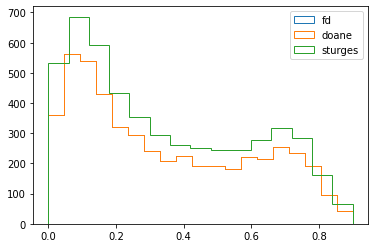

fd 19
doane 19
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
ok j_it= 0
ok j_it= 1
ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
[0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
[0.04941849566844292, 0.12344913599261406, 0.197363776099598, 0.2957371932430202, 0.6140501674426879, 0.9060062356731521, 1.220306004968806, 2.995274123746635]
[0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
[0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
[0.04941849566844292, 0.12344913599261406, 0.197363776099598, 0.2957371932430202, 0.6140501674426879, 0.9060062356731521, 1.220306004968806, 2.995274123746635]


In [5]:
Z_bins_XG_CV0 = [0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
Z_bins_XG_CV1 = [0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
Z_bins_XG_CV2 = [0.04941849566844292, 0.12344913599261406, 0.197363776099598, 0.2957371932430202, 0.6140501674426879, 0.9060062356731521, 1.220306004968806, 2.995274123746635]

Z_bins_XG_CV0_zeros = [0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
Z_bins_XG_CV1_zeros = [0.049468848367875906, 0.12357478286390243, 0.19756443448663705, 0.29603742590352095, 0.6146705174823712, 0.9069173053103068, 1.221526834604851, 2.998177877630096]
Z_bins_XG_CV2_zeros = [0.04941849566844292, 0.12344913599261406, 0.197363776099598, 0.2957371932430202, 0.6140501674426879, 0.9060062356731521, 1.220306004968806, 2.995274123746635]

<ipython-input-6-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-6-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-6-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-6-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument 

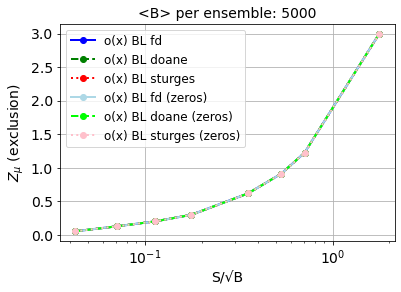

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [26]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  19


<ipython-input-26-f14e15c3e3ec>:196: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-26-f14e15c3e3ec>:197: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
<ipython-input-26-f14e15c3e3ec>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-26-f14e15c3e3ec>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  19
doing Nbin:  19
doing Nbin:  15


In [37]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0.04883965951047451, 0.12210261873521133, 0.1953108153029625, 0.2948461716165604, 0.6052603060086824, 0.8977954463469123, 1.2128507880021293, 2.96747963244581]
[0.0489682591732584, 0.12155844306564591, 0.1956432668739258, 0.29304602416435344, 0.6059515078508296, 0.9010850508629252, 1.2129740897354035, 2.9719691913233293]
[0.04793580181608212, 0.12137169879830159, 0.196285646529442, 0.29396037666717995, 0.6044734180464394, 0.8396898152820423, 1.188704415952259, 2.977184689292266]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.0489682591732584, 0.12155844306564591, 0.1956432668739258, 0.29304602416435344, 0.6059515078508296, 0.9010850508629252, 1.2129740897354035, 2.9719691913233293]
[0.04793580181608212, 0.12137169879830159, 0.196285646529442, 0.29396037666717995, 0.6044734180464394, 0.8396898152820423, 1.188704415952259, 2.977184689292266]
[0.04932776611921988, 0.12322391883360394, 0.1970059744478998, 0.29520552505239406, 0.6129756969066, 0.9044595761074964, 1.2182772521588867, 2.9909789650926846]
[0, 0

In [7]:
Z_bins_XG_CV0_chi2 = [0.04883965951047451, 0.12210261873521133, 0.1953108153029625, 0.2948461716165604, 0.6052603060086824, 0.8977954463469123, 1.2128507880021293, 2.96747963244581]
Z_bins_XG_CV1_chi2 = [0.0489682591732584, 0.12155844306564591, 0.1956432668739258, 0.29304602416435344, 0.6059515078508296, 0.9010850508629252, 1.2129740897354035, 2.9719691913233293]
Z_bins_XG_CV2_chi2 = [0.04793580181608212, 0.12137169879830159, 0.196285646529442, 0.29396037666717995, 0.6044734180464394, 0.8396898152820423, 1.188704415952259, 2.977184689292266]

Z_bins_XG_CV0_chi2_N = [0, 0, 0, 0, 0, 0, 0, 0]
Z_bins_XG_CV1_chi2_N = [0.0489682591732584, 0.12155844306564591, 0.1956432668739258, 0.29304602416435344, 0.6059515078508296, 0.9010850508629252, 1.2129740897354035, 2.9719691913233293]
Z_bins_XG_CV2_chi2_N = [0.04793580181608212, 0.12137169879830159, 0.196285646529442, 0.29396037666717995, 0.6044734180464394, 0.8396898152820423, 1.188704415952259, 2.977184689292266]

Z_bins_XG_CV0_MSE = [0.04932776611921988, 0.12322391883360394, 0.1970059744478998, 0.29520552505239406, 0.6129756969066, 0.9044595761074964, 1.2182772521588867, 2.9909789650926846]
Z_bins_XG_CV1_MSE = [0, 0.12312864403543868, 0, 0.2946561149562468, 0, 0.902401473195061, 0, 0]
Z_bins_XG_CV2_MSE = [0.04920685379133255, 0.12070980413834874, 0.19384127022612352, 0.29396037666717995, 0, 0, 0, 2.95940430015926]

Z_bins_XG_CV0_poiss = [0.04883965951047451, 0.12210261873521133, 0.1953108153029625, 0.2948461716165604, 0.6052603060086824, 0.8977954463469123, 1.2128507880021293, 2.96747963244581]
Z_bins_XG_CV1_poiss = [0.0489682591732584, 0.12155844306564591, 0.1956432668739258, 0.29304602416435344, 0.6059515078508296, 0.9010850508629252, 1.2129740897354035, 2.9719691913233293]
Z_bins_XG_CV2_poiss = [0.04793580181608212, 0.12137169879830159, 0.196285646529442, 0.29396037666717995, 0.6044734180464394, 0.8396898152820423, 1.188704415952259, 2.977184689292266]



Z_bins_XG_CV0_chi2_zeros = [0.04922359703367839, 0.12210261873521133, 0.1953108153029625, 0.29361989308902675, 0.6052603060086824, 0.901023059540958, 1.2128507880021293, 2.932669986866938]
Z_bins_XG_CV1_chi2_zeros = [0.0489682591732584, 0.12155844306564591, 0.19431188099349309, 0.2934641731734844, 0.6104401107330665, 0.9010850508629252, 1.2120411786970624, 2.9719691913233293]
Z_bins_XG_CV2_chi2_zeros = [0.04793580181608212, 0.122439752656559, 0.196285646529442, 0.29396037666717995, 0.6050663839491693, 0.8898035425664033, 1.210948031304326, 2.981507962352653]

Z_bins_XG_CV0_chi2_N_zeros = [0.04932776611921988, 0.12322391883360394, 0.1970059744478998, 0.29520552505239406, 0.6129756969066, 0.9044595761074964, 1.2182772521588867, 2.9909789650926846]
Z_bins_XG_CV1_chi2_N_zeros = [0.0489682591732584, 0.12155844306564591, 0.19431188099349309, 0.2934641731734844, 0.6104401107330665, 0.9010850508629252, 1.2120411786970624, 2.9719691913233293]
Z_bins_XG_CV2_chi2_N_zeros = [0.04793580181608212, 0.122439752656559, 0.196285646529442, 0.29396037666717995, 0.6050663839491693, 0.8898035425664033, 1.210948031304326, 2.981507962352653]

Z_bins_XG_CV0_MSE_zeros = [0.04932776611921988, 0.12322391883360394, 0.1970059744478998, 0.29520552505239406, 0.6129756969066, 0.9044595761074964, 1.2182772521588867, 2.9909789650926846]
Z_bins_XG_CV1_MSE_zeros = [0.04909121880833711, 0.12289270089828962, 0.1933328665815144, 0.29532704476181104, 0.6051633666814854, 0.902401473195061, 1.1837900164670254, 2.984294956943238]
Z_bins_XG_CV2_MSE_zeros = [0.04804304440562221, 0.12070980413834874, 0.1960475267261714, 0.29396037666717995, 0.6091217852718492, 0.8996402060639317, 1.2000445231993802, 2.9618171229704515]

Z_bins_XG_CV0_poiss_zeros = [0.049274418804357255, 0.12210261873521133, 0.1953108153029625, 0.29361989308902675, 0.6052603060086824, 0.901023059540958, 1.2128507880021293, 2.932669986866938]
Z_bins_XG_CV1_poiss_zeros = [0.0489682591732584, 0.12155844306564591, 0.19431188099349309, 0.2934641731734844, 0.6104401107330665, 0.9025370492648971, 1.2120411786970624, 2.9719691913233293]
Z_bins_XG_CV2_poiss_zeros = [0.04793580181608212, 0.122439752656559, 0.196285646529442, 0.29396037666717995, 0.6050663839491693, 0.8898035425664033, 1.210948031304326, 2.981507962352653]

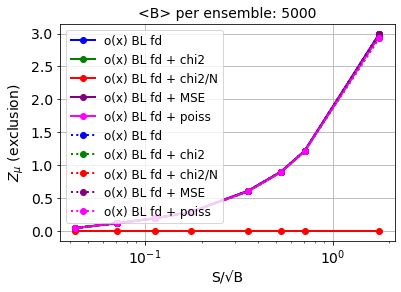

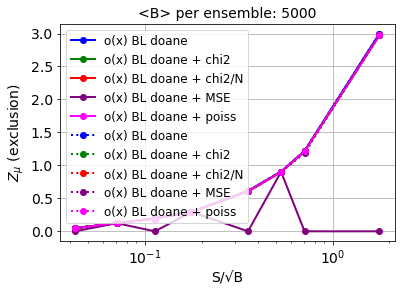

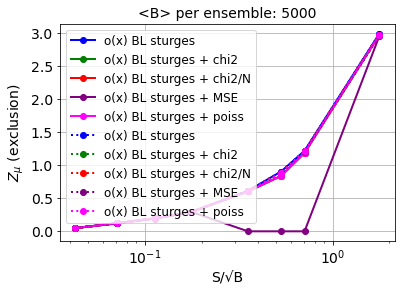

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [46]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.05413367695349285
Z_bins_logbins :  0.04018250246258782

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.13521343375738884
Z_bins_logbins :  0.1004123249545341

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.21614891578029533
Z_bins_logbins :  0.16058947711851873

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  0.3238396457031737
Z_bins_logbins :  0.24074412402750991

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  0.6720934502335372
Z_bins_logbins :  0.5006057861743495

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  0.9912275291868262
Z_bins_logbins :  0.73961491

In [47]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.05413367695349285, 0.13521343375738884, 0.21614891578029533, 0.3238396457031737, 0.6720934502335372, 0.9912275291868262, 1.3344887924586932, 3.267163238158343]
[0.04018250246258782, 0.1004123249545341, 0.16058947711851873, 0.24074412402750991, 0.5006057861743495, 0.7396149172934998, 0.9976148610370309, 2.4677575415777233]


In [9]:
store_Z_bins = [0.05413367695349285, 0.13521343375738884, 0.21614891578029533, 0.3238396457031737, 0.6720934502335372, 0.9912275291868262, 1.3344887924586932, 3.267163238158343]

store_Z_bins_logbins = [0.04018250246258782, 0.1004123249545341, 0.16058947711851873, 0.24074412402750991, 0.5006057861743495, 0.7396149172934998, 0.9976148610370309, 2.4677575415777233]

<ipython-input-20-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-20-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


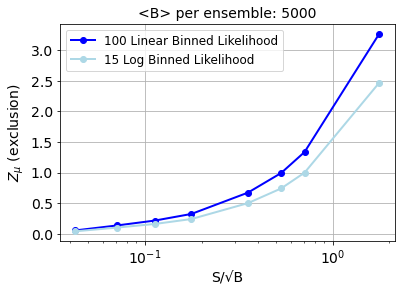

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.05172838969831222
Z_bins_XG_15bins :  0.05147907319720177
Z_bins_XG_15bins_1ML :  0.05063499960801958
Z_bins_XG_15bins_eq :  0.05086378983069425
Z_bins_XG_15bins_eq_1ML :  0.05095465146128197

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.12920999980098619
Z_bins_XG_15bins :  0.1285892112213744
Z_bins_XG_15bins_1ML :  0.12648983732600727
Z_bins_XG_15bins_eq :  0.12705902970020458
Z_bins_XG_15bins_eq_1ML :  0.12728588457114048

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.20655906766320387
Z_bins_XG_15bins :  0.2055697787619278
Z_bins_XG_15bins_1ML :  0.2022279342624834
Z_bins_XG_15bins_eq :  0.20313421634754195
Z_bins_XG_15bins_eq_1ML :  0.20349670399717246

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.05172838969831222, 0.12920999980098619, 0.20655906766320387, 0.30948618903501207, 0.642400262798068, 0.9475708172245497, 1.2759090043189254, 3.126635548294239]
[0.05147907319720177, 0.1285892112213744, 0.2055697787619278, 0.3080101289263377, 0.6393772861366454, 0.9431658104950068, 1.270054174859545, 3.113269504588849]
[0.05063499960801958, 0.12648983732600727, 0.2022279342624834, 0.30303134173359597, 0.629229628785531, 0.9284442412968883, 1.2505807208335566, 3.070013297855254]
[0.05086378983069425, 0.12705902970020458, 0.20313421634754195, 0.30438197675223727, 0.6319849719239916, 0.9324442604281026, 1.255874963515581, 3.081777576351326]
[0.05095465146128197, 0.12728588457114048, 0.20349670399717246, 0.3049247447336031, 0.6331091654899972, 0.9340989972948143, 1.2580977024324118, 3.0871374023068645]


In [10]:
store_Z_bins_XG = [0.05172838969831222, 0.12920999980098619, 0.20655906766320387, 0.30948618903501207, 0.642400262798068, 0.9475708172245497, 1.2759090043189254, 3.126635548294239]

store_Z_bins_XG_15bins = [0.05147907319720177, 0.1285892112213744, 0.2055697787619278, 0.3080101289263377, 0.6393772861366454, 0.9431658104950068, 1.270054174859545, 3.113269504588849]
store_Z_bins_XG_15bins_1ML = [0.05063499960801958, 0.12648983732600727, 0.2022279342624834, 0.30303134173359597, 0.629229628785531, 0.9284442412968883, 1.2505807208335566, 3.070013297855254]

store_Z_bins_XG_15bins_eq = [0.05086378983069425, 0.12705902970020458, 0.20313421634754195, 0.30438197675223727, 0.6319849719239916, 0.9324442604281026, 1.255874963515581, 3.081777576351326]
store_Z_bins_XG_15bins_eq_1ML = [0.05095465146128197, 0.12728588457114048, 0.20349670399717246, 0.3049247447336031, 0.6331091654899972, 0.9340989972948143, 1.2580977024324118, 3.0871374023068645]

<ipython-input-9-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-9-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-9-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-9-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

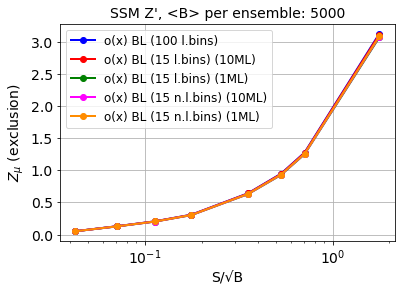

In [9]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
           -inf  2916.99270437  2832.59989295  2676.48613825
  2419.39674861  2022.82689311  1429.58010312   591.17027669
  -520.06865272 -1820.17272771 -3076.08619109 -5222.4208825 ]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.02784433448152421, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  6428.59997931
  6425.65250567  6414.52320788  6384.03992268  6319.98792898
  6206.99528356  5998.23388971  5531.67761797  4560.23056748
  2957.63389211   874.57084582 -1513.76921731 -4539.98245207]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


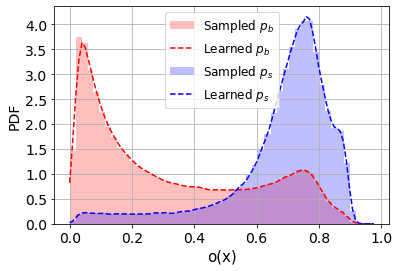


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



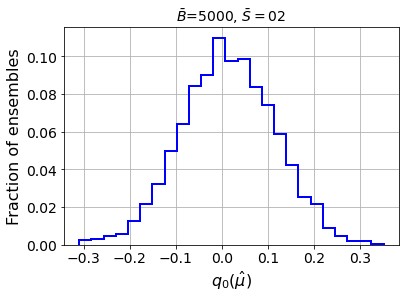

muhat mean:  0.020823702458499686
median q_muhat:  0.012686384799024175
Z_KDE:  0.11263385281088531
Z_KDE mu=0:  0.11263385281088531

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



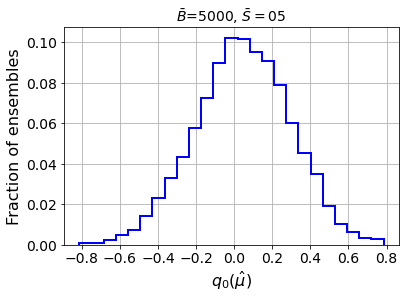

muhat mean:  0.05396258145890268
median q_muhat:  0.04781317173234534
Z_KDE:  0.21866223206659474
Z_KDE mu=0:  0.21866223206659474

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



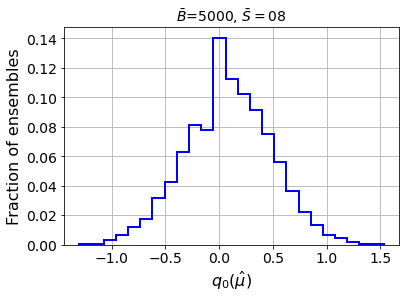

muhat mean:  0.09142316586083665
median q_muhat:  0.08363858503687815
Z_KDE:  0.289203362768966
Z_KDE mu=0:  0.289203362768966

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



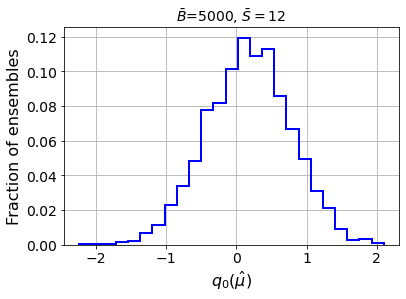

muhat mean:  0.12383855371032164
median q_muhat:  0.17968557257627182
Z_KDE:  0.42389335047423404
Z_KDE mu=0:  0.42389335047423404

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



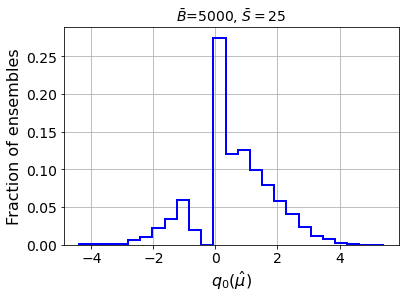

muhat mean:  0.20197769829581316
median q_muhat:  0.5590808008080188
Z_KDE:  0.7477170593266004
Z_KDE mu=0:  0.7477170593266004

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



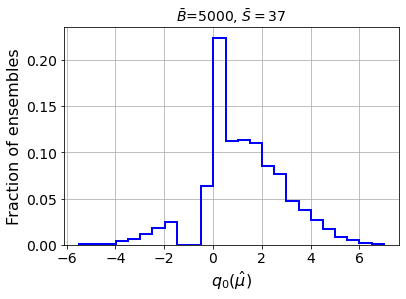

muhat mean:  0.2376973268785519
median q_muhat:  1.14660042759499
Z_KDE:  1.0707942975170301
Z_KDE mu=0:  1.0707942975170301

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



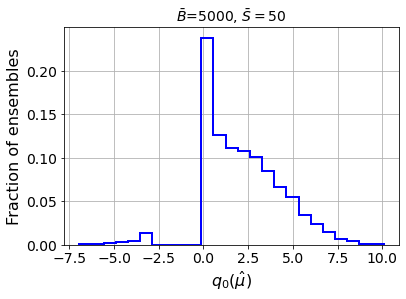

muhat mean:  0.24354228018510732
median q_muhat:  1.916546746833454
Z_KDE:  1.3843939998546129
Z_KDE mu=0:  1.3843939998546129

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



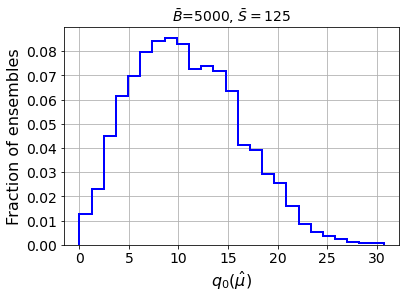

muhat mean:  0.12542158516020235
median q_muhat:  10.402778718746788
Z_KDE:  3.22533389259884
Z_KDE mu=0:  3.22533389259884

 ----------------------------------------- 



In [25]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [26]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.11263385281088531, 0.21866223206659474, 0.289203362768966, 0.42389335047423404, 0.7477170593266004, 1.0707942975170301, 1.3843939998546129, 3.22533389259884]
[0.11263385281088531, 0.21866223206659474, 0.289203362768966, 0.42389335047423404, 0.7477170593266004, 1.0707942975170301, 1.3843939998546129, 3.22533389259884]
[0.020823702458499686, 0.05396258145890268, 0.09142316586083665, 0.12383855371032164, 0.20197769829581316, 0.2376973268785519, 0.24354228018510732, 0.12542158516020235]


In [11]:
store_Z_MLL_KDE = [0.11263385281088531, 0.21866223206659474, 0.289203362768966, 0.42389335047423404, 0.7477170593266004, 1.0707942975170301, 1.3843939998546129, 3.22533389259884]
store_Z_MLL_KDE_mu0 = [0.11263385281088531, 0.21866223206659474, 0.289203362768966, 0.42389335047423404, 0.7477170593266004, 1.0707942975170301, 1.3843939998546129, 3.22533389259884]

store_muhat_mean_MLL = [0.020823702458499686, 0.05396258145890268, 0.09142316586083665, 0.12383855371032164, 0.20197769829581316, 0.2376973268785519, 0.24354228018510732, 0.12542158516020235]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
           -inf           -inf           -inf  2694.8663746
  2418.96453663  1998.7691517   1384.91150323   528.32366375
  -599.08965511 -1913.96950714 -3175.18354813 -5262.80185107]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.05831623450243209, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf  6208.3097847   6210.90305563  6212.40959915
  6211.0170407   6203.52510003  6180.54377561  6127.51146173
  6023.17741667  5812.68940031  5344.83111319  4389.99826705
  2820.67729495   767.6256088  -1582.28941744 -4567.59272121]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


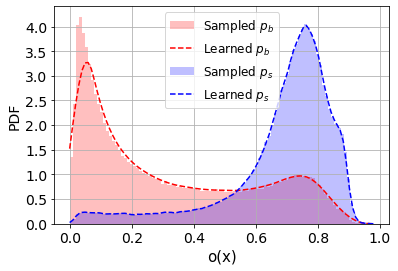


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.05104863354583901

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



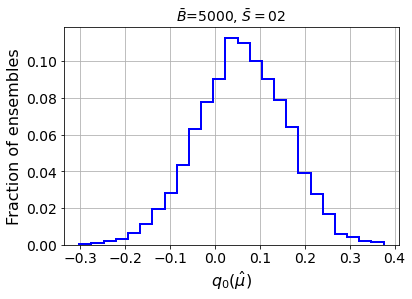

muhat mean:  0.017524690060937174
median q_muhat:  0.06022924034288879
Z_KDE:  0.2454164630640919
Z_KDE mu=0:  0.2454164630640919

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.1275179993996487

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



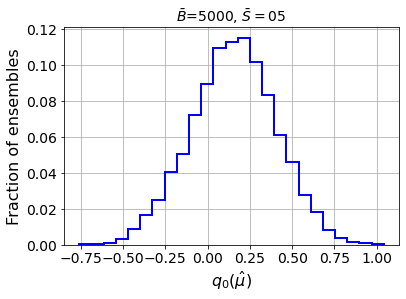

muhat mean:  0.04509144418751314
median q_muhat:  0.15817751125428536
Z_KDE:  0.39771536461932844
Z_KDE mu=0:  0.39771536461932844

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.20386358764472104

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



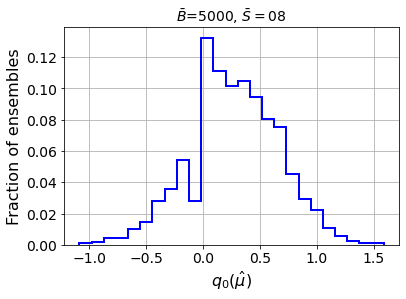

muhat mean:  0.06319108681942401
median q_muhat:  0.27429878413604136
Z_KDE:  0.5237354142465844
Z_KDE mu=0:  0.5237354142465844

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  0.30546617252272407

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



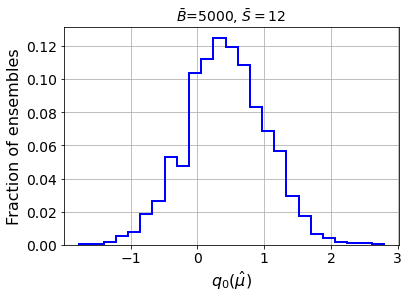

muhat mean:  0.08927895732604584
median q_muhat:  0.4173814761723804
Z_KDE:  0.6460506761643241
Z_KDE mu=0:  0.6460506761643241

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  0.6341785342328515

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



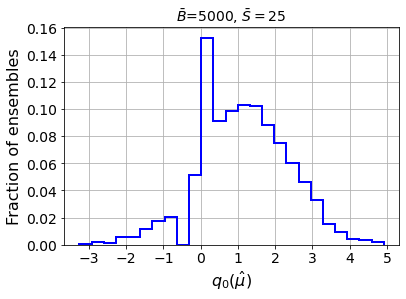

muhat mean:  0.14254155270355567
median q_muhat:  1.1360511972217253
Z_KDE:  1.065857024756006
Z_KDE mu=0:  1.065857024756006

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  0.9356047621378604

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



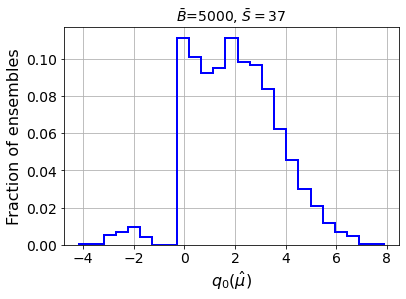

muhat mean:  0.14758998105661966
median q_muhat:  1.942516729152004
Z_KDE:  1.3937419880135649
Z_KDE mu=0:  1.3937419880135649

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  1.2600243367544584

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



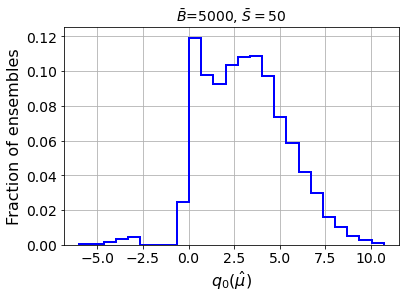

muhat mean:  0.13281447202355912
median q_muhat:  3.0354180708905503
Z_KDE:  1.7422451236523953
Z_KDE mu=0:  1.7422451236523953

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  3.090589645620522

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



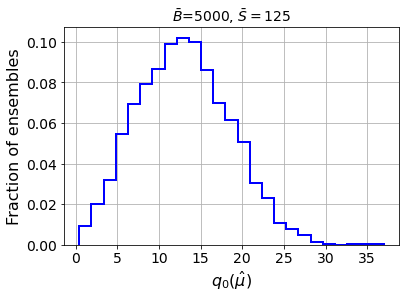

muhat mean:  0.06909780775716695
median q_muhat:  12.842239970084037
Z_KDE:  3.5836071171494286
Z_KDE mu=0:  3.5836071171494286

 ----------------------------------------- 



In [36]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [37]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.05104863354583901, 0.1275179993996487, 0.20386358764472104, 0.30546617252272407, 0.6341785342328515, 0.9356047621378604, 1.2600243367544584, 3.090589645620522]
[0.2454164630640919, 0.39771536461932844, 0.5237354142465844, 0.6460506761643241, 1.065857024756006, 1.3937419880135649, 1.7422451236523953, 3.5836071171494286]
[0.2454164630640919, 0.39771536461932844, 0.5237354142465844, 0.6460506761643241, 1.065857024756006, 1.3937419880135649, 1.7422451236523953, 3.5836071171494286]
[0.017524690060937174, 0.04509144418751314, 0.06319108681942401, 0.08927895732604584, 0.14254155270355567, 0.14758998105661966, 0.13281447202355912, 0.06909780775716695]


In [12]:
store_Z_KDE_bins = [0.05104863354583901, 0.1275179993996487, 0.20386358764472104, 0.30546617252272407, 0.6341785342328515, 0.9356047621378604, 1.2600243367544584, 3.090589645620522]

store_Z_MLL_KDE_1ML = [0.2454164630640919, 0.39771536461932844, 0.5237354142465844, 0.6460506761643241, 1.065857024756006, 1.3937419880135649, 1.7422451236523953, 3.5836071171494286]
store_Z_MLL_KDE_mu0_1ML = [0.2454164630640919, 0.39771536461932844, 0.5237354142465844, 0.6460506761643241, 1.065857024756006, 1.3937419880135649, 1.7422451236523953, 3.5836071171494286]

store_muhat_mean_MLL_1ML = [0.017524690060937174, 0.04509144418751314, 0.06319108681942401, 0.08927895732604584, 0.14254155270355567, 0.14758998105661966, 0.13281447202355912, 0.06909780775716695]

<ipython-input-12-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-12-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


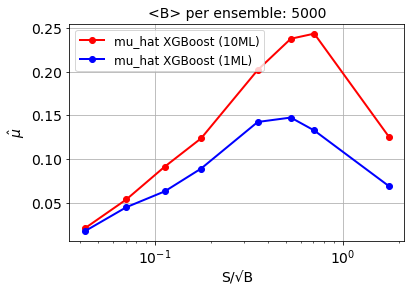

<ipython-input-12-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-12-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-12-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-12-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

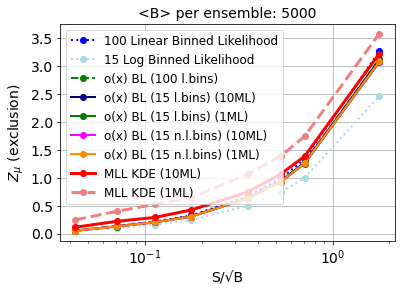

In [12]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [13]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [40]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.03871206356560094
WP:  0.5     S/B**0.5=  0.046404515289977986
WP:  0.75     S/B**0.5=  0.03832588084031742
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.09678013963989458
WP:  0.5     S/B**0.5=  0.11601122562731625
WP:  0.75     S/B**0.5=  0.09581412374695067
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.15484813090663568
WP:  0.5     S/B**0.5=  0.1856176605302867
WP:  0.75     S/B**0.5=  0.1532998218523131
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.23227298552583564
WP:  0.5     S/B**0.5=  0.27842715240826255
WP:  0.75     S/B**0.5=  0.22995340744700246
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.48390128220853856
WP:  0.5     S/B**0.5=  0.580054

In [14]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.03871206356560094, 0.09678013963989458, 0.15484813090663568, 0.23227298552583564, 0.48390128220853856, 0.7161746108246986, 0.9678025644170771, 2.419533064264289]
SrootB_WP1_XG = [0.046404515289977986, 0.11601122562731625, 0.1856176605302867, 0.27842715240826255, 0.5800540634660507, 0.8584823302048418, 1.1601081269321014, 2.9003104415734913]
SrootB_WP2_XG = [0.03832588084031742, 0.09581412374695067, 0.1532998218523131, 0.22995340744700246, 0.47906088100207217, 0.7090243915547922, 0.9581217620041443, 2.3952061593107956]

<ipython-input-15-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-15-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-15-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-15-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

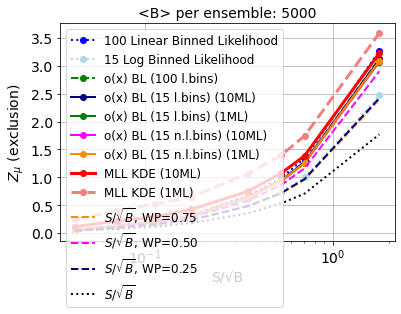

In [15]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-16-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


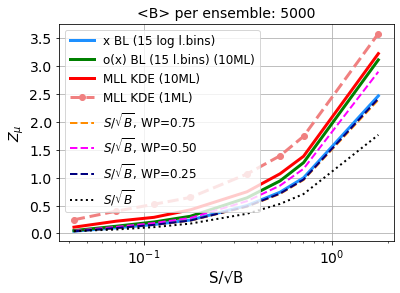

In [16]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

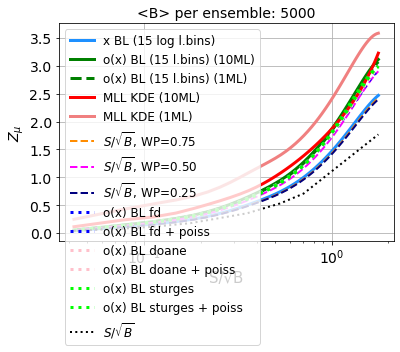

In [15]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [16]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [17]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
#bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = bins_XG_CV0_chi2_95CL*1.5
bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)

bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
#bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_MSE_95CL = bins_XG_CV1_chi2_95CL*1.5
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
#bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
bins_XG_CV2_MSE_95CL = bins_XG_CV2_chi2_95CL*1.5
bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.40439*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results2500GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
1.1052787173905962 50.57897049558725 1.6859656831862418e-05
0.890735110617375 40.76118011723073 1.358706003907691e-05
0.859440914869544 39.32911761705928 1.3109705872353094e-05
0.9029026971789905 41.31798447075649 1.3772661490252164e-05
0.65830511437334 30.12488563571671 1.0041628545238903e-05

0.9221294078900233 42.1978233914555 1.4065941130485167e-05
0.9285848372820945 42.49323211291244 1.4164410704304145e-05
1.3928772559231417 63.73984816936865 2.1246616056456218e-05
0.9242836425855939 42.29640393172418 1.4098801310574726e-05
0.9285848372820945 42.49323211291244 1.4164410704304145e-05

0.9221294078900233 42.1978233914555 1.4065941130485167e-05
0.933030214070672 42.696658251399974 1.4232219417133324e-05
0.933030214070672 42.696658251399974 1.4232219417133324e-05
1.399545321106008 64.04498737709996 2.1348329125699987e-05
0.933030214070672 42.6966